In [181]:
import cobra
from cobra import Reaction, Metabolite
from matplotlib import pyplot as plt, patches
import pandas as pd
import numpy as np
import re
import random
from cobra.flux_analysis import flux_variability_analysis

plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_19200/2423951844.py:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [182]:
# Marchantia model created from core metabolism model by Naomi Cannell
# cobra_model = cobra.io.read_sbml_model("Corinna_Marchantia modelling/PlantCoreMetabolism_v1_3_4_march_biomass_v2.xml")

model_var = ("PlantCoreMetabolism_v2_1_0.xml")


# I removed PALMITATE_b as a boundary metabolite, which allowed it to be taken up 

In [183]:
# set solver for optimisation
solver = 'glpk'
cobra.core.Configuration.solver = solver


cobra_model = cobra.io.read_sbml_model(model_var)
cobra_model.solver


In [184]:
%run FBA_model_functions.ipynb

In [185]:
dataset_dict = {
"Arabidopsis_1": [("Arabi._1", "Arabi._1_ub"), 4.08, [3.37,4.74], 0.393, [0.393,0.596]],
"Arabidopsis_2": [("Arabi._2", "Arabi._2_ub"), 3.37, [3.37,4.74], 0.409, [0.393,0.596]],
"Arabidopsis_3": [("Arabi._3", "Arabi._3_ub"), 3.8, [3.37,4.74], 0.596, [0.393,0.596]],
"Arabidopsis_4": [("Arabi._4", "Arabi._4_ub"), 4.74, [3.37,4.74], 0.587, [0.393,0.596]],
"Marchantia_1": [("March_1", "March_1_ub_stdev"), 1.16, [0.794,1.86], 0.238, [0.0998,0.291]],
"Marchantia_2": [("March_2", "March_2_ub_stdev"), 0.794, [0.794,1.86], 0.0998, [0.0998,0.291]],
"Marchantia_3": [("March_3", "March_3_ub_stdev"), 1.86, [0.794,1.86], 0.208957005, [0.12, 0.291]],
"Marchantia_Naomi_1": [("Naomis_modelling_setup_1", ""), 1.16, [], 0.238, []],
"Marchantia_Naomi_2": [("Naomis_modelling_setup_2", ""), 0.794, [], 0.0998, []]}

In [186]:
# adding 57 metabolites
met_list = ['9Z12Z15Z_HEXADECATRIENOATE_p',
 '9Z12Z15Z_HEXADECATRIENOATE_c',
 '9Z12Z15Z_HEXADECATRIENOATE_x',
 'UDP_D_GALACTURONATE_c',
 '1_4_ALPHA_D_GALACTURONOSYL_c',
 'METHYL_ESTERIFIED_HOMOGALACTURONAN_c',
 'HOMOGALACTURONAN_b',
 'OLEOYL_COA_p',
 'A_GLYCEROLIPID_p',
 'A_GLYCEROLIPID_OLEATE_p',
 'A_GLYCEROLIPID_LINOLEATE_p',
 'CPD_18_p',
 'A_GLYCEROLIPID_GAMMA_LINOLENATE_p',
 'GAMMA_LINOLENOYL_COA_p',
 'GAMMA_LINOLENATE_p',
 'CPD_14404_p',
 'CPD_14405_p',
 'CPD_14406_p',
 'CPD_14407_p',
 'CPD_8120_p',
 'CPD_8120_c',
 'CPD_8120_b',
 'CPD_17283_p',
 'CPD_17284_p',
 'ARACHIDONYL_COA_p',
 'ARACHIDONIC_ACID_p',
 'ARACHIDONIC_ACID_c',
 'ARACHIDONIC_ACID_b',
 'A_GLYCEROLIPID_ALPHA_LINOLENATE_p',
 'CPD_17278_p',
 'CPD_14392_p',
 'CPD_17262_p',
 'CPD_17263_p',
 'CPD_17264_p',
 'CPD_14394_p',
 'CPD_17281_p',
 'CPD_17282_p',
 'CPD_14018_p',
 '5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p',
 '5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c',
 '5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_b',
 'A_GLYCEROLIPID_PALMITATE_p',
 'CPD_17294_p',
 'CPD_17293_p',
 'CPD_17292_p',
 'HEXADECATRIENOYL_COA_p',
 'HEXADECADIENOYL_COA_p',
 'CPD_17291_b',
 'CPD_17290_p',
 'CPD_17290_c',
 'CPD_17290_b',
 'PALMITATE_b',
 'CPD_9245_b',
 'STEARIC_ACID_b',
 'OLEATE_CPD_b',
 'Octadecadienoate_b',
 'LINOLENIC_ACID_b']

M_9Z12Z15Z_HEXADECATRIENOATE_p = Metabolite("9Z12Z15Z_HEXADECATRIENOATE_p", name = "9Z12Z15Z_HEXADECATRIENOATE_p", compartment ="p", charge = None)
cobra_model.add_metabolites(M_9Z12Z15Z_HEXADECATRIENOATE_p)

M_9Z12Z15Z_HEXADECATRIENOATE_c = Metabolite("9Z12Z15Z_HEXADECATRIENOATE_c", name = "9Z12Z15Z_HEXADECATRIENOATE_c", compartment ="c", charge = -1)
cobra_model.add_metabolites(M_9Z12Z15Z_HEXADECATRIENOATE_c)

M_9Z12Z15Z_HEXADECATRIENOATE_x = Metabolite("9Z12Z15Z_HEXADECATRIENOATE_x", name = "9Z12Z15Z_HEXADECATRIENOATE_x", compartment ="x", charge = -1)
cobra_model.add_metabolites(M_9Z12Z15Z_HEXADECATRIENOATE_x)

M_UDP_D_GALACTURONATE_c = Metabolite("UDP_D_GALACTURONATE_c", name = "UDP_D_GALACTURONATE_c", compartment ="c", charge = 0)
cobra_model.add_metabolites(M_UDP_D_GALACTURONATE_c)

M_1_4_ALPHA_D_GALACTURONOSYL_c = Metabolite("1_4_ALPHA_D_GALACTURONOSYL_c", name = "1_4_ALPHA_D_GALACTURONOSYL_c", compartment ="c", charge = 0)
cobra_model.add_metabolites(M_1_4_ALPHA_D_GALACTURONOSYL_c)

M_METHYL_ESTERIFIED_HOMOGALACTURONAN_c = Metabolite("METHYL_ESTERIFIED_HOMOGALACTURONAN_c", name = "METHYL_ESTERIFIED_HOMOGALACTURONAN_c", compartment ="c", charge = 0)
cobra_model.add_metabolites(M_METHYL_ESTERIFIED_HOMOGALACTURONAN_c)

M_HOMOGALACTURONAN_b = Metabolite("HOMOGALACTURONAN_b", name = "HOMOGALACTURONAN_b", compartment ="b", charge = 0)
cobra_model.add_metabolites(M_HOMOGALACTURONAN_b)

M_OLEOYL_COA_p = Metabolite("OLEOYL_COA_p", name = "OLEOYL_COA_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_OLEOYL_COA_p)

M_A_GLYCEROLIPID_p = Metabolite("A_GLYCEROLIPID_p", name = "A_GLYCEROLIPID_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_A_GLYCEROLIPID_p)

M_A_GLYCEROLIPID_OLEATE_p = Metabolite("A_GLYCEROLIPID_OLEATE_p", name = "A_GLYCEROLIPID_OLEATE_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_A_GLYCEROLIPID_OLEATE_p)

M_A_GLYCEROLIPID_LINOLEATE_p = Metabolite("A_GLYCEROLIPID_LINOLEATE_p", name = "A_GLYCEROLIPID_LINOLEATE_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_A_GLYCEROLIPID_LINOLEATE_p)

M_CPD_18_p = Metabolite("CPD_18_p", name = "CPD_18_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_18_p)

M_A_GLYCEROLIPID_GAMMA_LINOLENATE_p = Metabolite("A_GLYCEROLIPID_GAMMA_LINOLENATE_p", name = "A_GLYCEROLIPID_GAMMA_LINOLENATE_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_A_GLYCEROLIPID_GAMMA_LINOLENATE_p)

M_GAMMA_LINOLENOYL_COA_p = Metabolite("GAMMA_LINOLENOYL_COA_p", name = "GAMMA_LINOLENOYL_COA_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_GAMMA_LINOLENOYL_COA_p)

M_GAMMA_LINOLENATE_p = Metabolite("GAMMA_LINOLENATE_p", name = "GAMMA_LINOLENATE_p", compartment ="p", charge = -1)
cobra_model.add_metabolites(M_GAMMA_LINOLENATE_p)

M_CPD_14404_p = Metabolite("CPD_14404_p", name = "CPD_14404_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14404_p)

M_CPD_14405_p = Metabolite("CPD_14405_p", name = "CPD_14405_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14405_p)

M_CPD_14406_p = Metabolite("CPD_14406_p", name = "CPD_14406_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14406_p)

M_CPD_14407_p = Metabolite("CPD_14407_p", name = "CPD_14407_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14407_p)

M_CPD_8120_p = Metabolite("CPD_8120_p", name = "CPD_8120_p", compartment ="p", charge = -1)
cobra_model.add_metabolites(M_CPD_8120_p)

M_CPD_8120_c = Metabolite("CPD_8120_c", name = "CPD_8120_c", compartment ="c", charge = -1)
cobra_model.add_metabolites(M_CPD_8120_c)

M_CPD_8120_b = Metabolite("CPD_8120_b", name = "CPD_8120_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_CPD_8120_b)

M_CPD_17283_p = Metabolite("CPD_17283_p", name = "CPD_17283_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17283_p)

M_CPD_17284_p = Metabolite("CPD_17284_p", name = "CPD_17284_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17284_p)

M_ARACHIDONYL_COA_p = Metabolite("ARACHIDONYL_COA_p", name = "ARACHIDONYL_COA_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_ARACHIDONYL_COA_p)

M_ARACHIDONIC_ACID_p = Metabolite("ARACHIDONIC_ACID_p", name = "ARACHIDONIC_ACID_p", compartment ="p", charge = -1)
cobra_model.add_metabolites(M_ARACHIDONIC_ACID_p)

M_ARACHIDONIC_ACID_c = Metabolite("ARACHIDONIC_ACID_c", name = "ARACHIDONIC_ACID_c", compartment ="c", charge = -1)
cobra_model.add_metabolites(M_ARACHIDONIC_ACID_c)

M_ARACHIDONIC_ACID_b = Metabolite("ARACHIDONIC_ACID_b", name = "ARACHIDONIC_ACID_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_ARACHIDONIC_ACID_b)

M_A_GLYCEROLIPID_ALPHA_LINOLENATE_p = Metabolite("A_GLYCEROLIPID_ALPHA_LINOLENATE_p", name = "A_GLYCEROLIPID_ALPHA_LINOLENATE_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_A_GLYCEROLIPID_ALPHA_LINOLENATE_p)

M_CPD_17278_p = Metabolite("CPD_17278_p", name = "CPD_17278_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17278_p)

M_CPD_14392_p = Metabolite("CPD_14392_p", name = "CPD_14392_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14392_p)

M_CPD_17262_p = Metabolite("CPD_17262_p", name = "CPD_17262_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_17262_p)

M_CPD_17263_p = Metabolite("CPD_17263_p", name = "CPD_17263_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_17263_p)

M_CPD_17264_p = Metabolite("CPD_17264_p", name = "CPD_17264_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_17264_p)

M_CPD_14394_p = Metabolite("CPD_14394_p", name = "CPD_14394_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14394_p)

M_CPD_17281_p = Metabolite("CPD_17281_p", name = "CPD_17281_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17281_p)

M_CPD_17282_p = Metabolite("CPD_17282_p", name = "CPD_17282_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17282_p)

M_CPD_14018_p = Metabolite("CPD_14018_p", name = "CPD_14018_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_CPD_14018_p)

M_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p = Metabolite("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p", name = "5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p", compartment ="p", charge = -1)
cobra_model.add_metabolites(M_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p)

M_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c = Metabolite("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c", name = "5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c", compartment ="c", charge = -1)
cobra_model.add_metabolites(M_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c)

M_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_b = Metabolite("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_b", name = "5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_b)

M_A_GLYCEROLIPID_PALMITATE_p = Metabolite("A_GLYCEROLIPID_PALMITATE_p", name = "A_GLYCEROLIPID_PALMITATE_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_A_GLYCEROLIPID_PALMITATE_p)

M_CPD_17294_p = Metabolite("CPD_17294_p", name = "CPD_17294_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17294_p)

M_CPD_17293_p = Metabolite("CPD_17293_p", name = "CPD_17293_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17293_p)

M_CPD_17292_p = Metabolite("CPD_17292_p", name = "CPD_17292_p", compartment ="p", charge = 0)
cobra_model.add_metabolites(M_CPD_17292_p)

M_HEXADECATRIENOYL_COA_p = Metabolite("HEXADECATRIENOYL_COA_p", name = "HEXADECATRIENOYL_COA_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_HEXADECATRIENOYL_COA_p)

M_HEXADECADIENOYL_COA_p = Metabolite("HEXADECADIENOYL_COA_p", name = "HEXADECADIENOYL_COA_p", compartment ="p", charge = -4)
cobra_model.add_metabolites(M_HEXADECADIENOYL_COA_p)

M_CPD_17291_b = Metabolite("CPD_17291_b", name = "CPD_17291_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_CPD_17291_b)

M_CPD_17290_p = Metabolite("CPD_17290_p", name = "CPD_17290_p", compartment ="p", charge = -1)
cobra_model.add_metabolites(M_CPD_17290_p)

M_CPD_17290_c = Metabolite("CPD_17290_c", name = "CPD_17290_c", compartment ="c", charge = -1)
cobra_model.add_metabolites(M_CPD_17290_c)

M_CPD_17290_b = Metabolite("CPD_17290_b", name = "CPD_17290_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_CPD_17290_b)

M_PALMITATE_b = Metabolite("PALMITATE_b", name = "PALMITATE_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_PALMITATE_b)

M_CPD_9245_b = Metabolite("CPD_9245_b", name = "CPD_9245_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_CPD_9245_b)

M_STEARIC_ACID_b = Metabolite("STEARIC_ACID_b", name = "STEARIC_ACID_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_STEARIC_ACID_b)

M_OLEATE_CPD_b = Metabolite("OLEATE_CPD_b", name = "OLEATE_CPD_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_OLEATE_CPD_b)

M_Octadecadienoate_b = Metabolite("Octadecadienoate_b", name = "Octadecadienoate_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_Octadecadienoate_b)

M_LINOLENIC_ACID_b = Metabolite("LINOLENIC_ACID_b", name = "LINOLENIC_ACID_b", compartment ="b", charge = -1)
cobra_model.add_metabolites(M_LINOLENIC_ACID_b)

In [187]:
# adding 60 reactions
rxn_list = ['palmitoyl_ACP_desaturase_p',
 '9Z12Z15Z_HEXADECATRIENOATE_pc',
 '9Z12Z15Z_HEXADECATRIENOATE_xc',
 'Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x',
 'UDP_GLUCURONATE_4_EPIMERASE_RXN_c',
 '2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c',
 'RXN_2081_c',
 'HOMOGALACTURONAN_BIOMASS_c',
 'RXN_9644_p',
 'RXN_9670_p',
 'M_RXN_16036_p',
 'M_RXN_16045_p',
 'M_LINOLEOYL_RXN_p',
 'RXN_8343_p',
 'RXN_16043_p',
 'GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p',
 'RXN_12777_p',
 'RXN_12968_p',
 'RXN_12969_p',
 'RXN_12971_p',
 'di_homo_gamma_linolenate_biosynthesis_p',
 'RXN_16044_p',
 'RXN_8346_p',
 'arachidonate_transfer_rxn_p',
 'arachidonate_biosynthesis_p',
 'RXN_9667_p',
 'RXN_8347_p',
 'RXN_16041_p',
 'RXN_16019_p',
 'RXN_16020_p',
 'RXN_16021_p',
 'RXN_16022_p',
 'RXN_16042_p',
 'RXN_8350_p',
 'RXN_17688_p',
 'icosapentaenate_biosynthesis_p',
 'RXN_9623_SP_p',
 'palmitate_transfer_rxn_p',
 'RXN_16048_p',
 'RXN_16047_p',
 'RXN_16049_p',
 'hexadecadienoate_transfer_rxn_p',
 '7Z10Z_hexadecadienoate_biosynthesis_p',
 'hexadecatrienoate_transfer_rxn_p',
 '7Z10Z13Z_hexadecatrienoate_biosynthesis_p',
 'palmitate_biomass_2',
 'palmitoleate_biomass',
 '7Z10Z13Z_hexadecatrienoate_biomass',
 'CPD_17290_pc',
 '7Z10Z_hexadecadienoate_biomass',
 'stearate_biomass',
 'oleate_biomass',
 'alpha_linolenate_biomass',
 'CPD_8120_pc',
 'dihomo_gamma_linolenate_biomass',
 'octadecadienoate_biomass',
 'ARACHIDONIC_ACID_pc',
 'arachidonate_biomass',
 '5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc',
 'eicosapentaenoate_biomass']

R_palmitoyl_ACP_desaturase_p = Reaction("palmitoyl_ACP_desaturase_p")
R_palmitoyl_ACP_desaturase_p.upper_bound = 1000.0
R_palmitoyl_ACP_desaturase_p.lower_bound = 0.0
R_palmitoyl_ACP_desaturase_p.add_metabolites({
cobra_model.metabolites.get_by_id("Palmitoyl_ACPs_p"):-1.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0,
cobra_model.metabolites.get_by_id("Palmitoleoyl_ACP_p"):1.0})
cobra_model.add_reactions([R_palmitoyl_ACP_desaturase_p])


R_9Z12Z15Z_HEXADECATRIENOATE_pc = Reaction("9Z12Z15Z_HEXADECATRIENOATE_pc")
R_9Z12Z15Z_HEXADECATRIENOATE_pc.upper_bound = 1000.0
R_9Z12Z15Z_HEXADECATRIENOATE_pc.lower_bound = -1000.0
R_9Z12Z15Z_HEXADECATRIENOATE_pc.add_metabolites({
cobra_model.metabolites.get_by_id("9Z12Z15Z_HEXADECATRIENOATE_p"):-1.0,
cobra_model.metabolites.get_by_id("9Z12Z15Z_HEXADECATRIENOATE_c"):1.0})
cobra_model.add_reactions([R_9Z12Z15Z_HEXADECATRIENOATE_pc])


R_9Z12Z15Z_HEXADECATRIENOATE_xc = Reaction("9Z12Z15Z_HEXADECATRIENOATE_xc")
R_9Z12Z15Z_HEXADECATRIENOATE_xc.upper_bound = 1000.0
R_9Z12Z15Z_HEXADECATRIENOATE_xc.lower_bound = -1000.0
R_9Z12Z15Z_HEXADECATRIENOATE_xc.add_metabolites({
cobra_model.metabolites.get_by_id("9Z12Z15Z_HEXADECATRIENOATE_x"):-1.0,
cobra_model.metabolites.get_by_id("9Z12Z15Z_HEXADECATRIENOATE_c"):1.0})
cobra_model.add_reactions([R_9Z12Z15Z_HEXADECATRIENOATE_xc])


R_Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x = Reaction("Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x")
R_Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x.upper_bound = 1000.0
R_Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x.lower_bound = 0.0
R_Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x.add_metabolites({
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_x"):-4.0,
cobra_model.metabolites.get_by_id("NAD_x"):-7.0,
cobra_model.metabolites.get_by_id("aATP_x"):-0.35,
cobra_model.metabolites.get_by_id("ATP_x"):-0.65,
cobra_model.metabolites.get_by_id("9Z12Z15Z_HEXADECATRIENOATE_x"):-1.0,
cobra_model.metabolites.get_by_id("WATER_x"):-7.0,
cobra_model.metabolites.get_by_id("CO_A_x"):-8.0,
cobra_model.metabolites.get_by_id("AMP_x"):1.0,
cobra_model.metabolites.get_by_id("aPPI_x"):0.35,
cobra_model.metabolites.get_by_id("PPI_x"):0.65,
cobra_model.metabolites.get_by_id("HYDROGEN_PEROXIDE_x"):4.0,
cobra_model.metabolites.get_by_id("PROTON_x"):7.0,
cobra_model.metabolites.get_by_id("NADH_x"):7.0,
cobra_model.metabolites.get_by_id("ACETYL_COA_x"):8.0})
cobra_model.add_reactions([R_Beta_Oxidation_9Z12Z15Z_HEXADECATRIENOATE_x])


R_UDP_GLUCURONATE_4_EPIMERASE_RXN_c = Reaction("UDP_GLUCURONATE_4_EPIMERASE_RXN_c")
R_UDP_GLUCURONATE_4_EPIMERASE_RXN_c.upper_bound = 1000.0
R_UDP_GLUCURONATE_4_EPIMERASE_RXN_c.lower_bound = 0.0
R_UDP_GLUCURONATE_4_EPIMERASE_RXN_c.add_metabolites({
cobra_model.metabolites.get_by_id("UDP_GLUCURONATE_c"):-1.0,
cobra_model.metabolites.get_by_id("UDP_D_GALACTURONATE_c"):1.0})
cobra_model.add_reactions([R_UDP_GLUCURONATE_4_EPIMERASE_RXN_c])


R_2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c = Reaction("2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c")
R_2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c.upper_bound = 1000.0
R_2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c.lower_bound = 0.0
R_2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c.add_metabolites({
cobra_model.metabolites.get_by_id("UDP_D_GALACTURONATE_c"):-1.0,
cobra_model.metabolites.get_by_id("1_4_ALPHA_D_GALACTURONOSYL_c"):1.0,
cobra_model.metabolites.get_by_id("UDP_c"):0.5,
cobra_model.metabolites.get_by_id("aUDP_c"):0.5})
cobra_model.add_reactions([R_2_PERIOD_4_PERIOD_1_PERIOD_43_RXN_c])


R_RXN_2081_c = Reaction("RXN_2081_c")
R_RXN_2081_c.upper_bound = 1000.0
R_RXN_2081_c.lower_bound = 0.0
R_RXN_2081_c.add_metabolites({
cobra_model.metabolites.get_by_id("1_4_ALPHA_D_GALACTURONOSYL_c"):-1.0,
cobra_model.metabolites.get_by_id("S_ADENOSYLMETHIONINE_c"):-1.0,
cobra_model.metabolites.get_by_id("METHYL_ESTERIFIED_HOMOGALACTURONAN_c"):1.0,
cobra_model.metabolites.get_by_id("ADENOSYL_HOMO_CYS_c"):1.0,
cobra_model.metabolites.get_by_id("PROTON_c"):1.0})
cobra_model.add_reactions([R_RXN_2081_c])


R_HOMOGALACTURONAN_BIOMASS_c = Reaction("HOMOGALACTURONAN_BIOMASS_c")
R_HOMOGALACTURONAN_BIOMASS_c.upper_bound = 1000.0
R_HOMOGALACTURONAN_BIOMASS_c.lower_bound = 0.0
R_HOMOGALACTURONAN_BIOMASS_c.add_metabolites({
cobra_model.metabolites.get_by_id("1_4_ALPHA_D_GALACTURONOSYL_c"):-0.2,
cobra_model.metabolites.get_by_id("METHYL_ESTERIFIED_HOMOGALACTURONAN_c"):-0.8,
cobra_model.metabolites.get_by_id("HOMOGALACTURONAN_b"):1.0})
cobra_model.add_reactions([R_HOMOGALACTURONAN_BIOMASS_c])


R_RXN_9644_p = Reaction("RXN_9644_p")
R_RXN_9644_p.upper_bound = 1000.0
R_RXN_9644_p.lower_bound = 0.0
R_RXN_9644_p.add_metabolites({
cobra_model.metabolites.get_by_id("OLEATE_CPD_p"):-1.0,
cobra_model.metabolites.get_by_id("ATP_p"):-0.9,
cobra_model.metabolites.get_by_id("aATP_p"):-0.1,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("AMP_p"):1.0,
cobra_model.metabolites.get_by_id("PPI_p"):0.55,
cobra_model.metabolites.get_by_id("bPPI_p"):0.45,
cobra_model.metabolites.get_by_id("OLEOYL_COA_p"):1.0})
cobra_model.add_reactions([R_RXN_9644_p])


R_RXN_9670_p = Reaction("RXN_9670_p")
R_RXN_9670_p.upper_bound = 1000.0
R_RXN_9670_p.lower_bound = 0.0
R_RXN_9670_p.add_metabolites({
cobra_model.metabolites.get_by_id("OLEOYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):-1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_OLEATE_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0})
cobra_model.add_reactions([R_RXN_9670_p])


R_M_RXN_16036_p = Reaction("M_RXN_16036_p")
R_M_RXN_16036_p.upper_bound = 1000.0
R_M_RXN_16036_p.lower_bound = 0.0
R_M_RXN_16036_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_OLEATE_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_LINOLEATE_p"):1.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0})
cobra_model.add_reactions([R_M_RXN_16036_p])


R_M_RXN_16045_p = Reaction("M_RXN_16045_p")
R_M_RXN_16045_p.upper_bound = 1000.0
R_M_RXN_16045_p.lower_bound = 0.0
R_M_RXN_16045_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_LINOLEATE_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_18_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_M_RXN_16045_p])


R_M_LINOLEOYL_RXN_p = Reaction("M_LINOLEOYL_RXN_p")
R_M_LINOLEOYL_RXN_p.upper_bound = 1000.0
R_M_LINOLEOYL_RXN_p.lower_bound = 0.0
R_M_LINOLEOYL_RXN_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_18_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("Octadecadienoate_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_M_LINOLEOYL_RXN_p])


R_RXN_8343_p = Reaction("RXN_8343_p")
R_RXN_8343_p.upper_bound = 1000.0
R_RXN_8343_p.lower_bound = 0.0
R_RXN_8343_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_LINOLEATE_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_GAMMA_LINOLENATE_p"):1.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0})
cobra_model.add_reactions([R_RXN_8343_p])


R_RXN_16043_p = Reaction("RXN_16043_p")
R_RXN_16043_p.upper_bound = 1000.0
R_RXN_16043_p.lower_bound = 0.0
R_RXN_16043_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_GAMMA_LINOLENATE_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("GAMMA_LINOLENOYL_COA_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_RXN_16043_p])


R_GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p = Reaction("GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p")
R_GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p.upper_bound = 1000.0
R_GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p.lower_bound = 0.0
R_GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p.add_metabolites({
cobra_model.metabolites.get_by_id("GAMMA_LINOLENOYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("GAMMA_LINOLENATE_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_GAMMA_LINOLENIC_ACID_BIOSYNTHESIS_p])


R_RXN_12777_p = Reaction("RXN_12777_p")
R_RXN_12777_p.upper_bound = 1000.0
R_RXN_12777_p.lower_bound = 0.0
R_RXN_12777_p.add_metabolites({
cobra_model.metabolites.get_by_id("GAMMA_LINOLENOYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-1.0,
cobra_model.metabolites.get_by_id("MALONYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14404_p"):1.0,
cobra_model.metabolites.get_by_id("CARBON_DIOXIDE_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0})
cobra_model.add_reactions([R_RXN_12777_p])


R_RXN_12968_p = Reaction("RXN_12968_p")
R_RXN_12968_p.upper_bound = 1000.0
R_RXN_12968_p.lower_bound = 0.0
R_RXN_12968_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14404_p"):-1.0,
cobra_model.metabolites.get_by_id("NADPH_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14405_p"):1.0,
cobra_model.metabolites.get_by_id("NADP_p"):1.0})
cobra_model.add_reactions([R_RXN_12968_p])


R_RXN_12969_p = Reaction("RXN_12969_p")
R_RXN_12969_p.upper_bound = 1000.0
R_RXN_12969_p.lower_bound = 0.0
R_RXN_12969_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14405_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14406_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):1.0})
cobra_model.add_reactions([R_RXN_12969_p])


R_RXN_12971_p = Reaction("RXN_12971_p")
R_RXN_12971_p.upper_bound = 1000.0
R_RXN_12971_p.lower_bound = 0.0
R_RXN_12971_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14406_p"):-1.0,
cobra_model.metabolites.get_by_id("NADH_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14407_p"):1.0,
cobra_model.metabolites.get_by_id("NAD_p"):1.0})
cobra_model.add_reactions([R_RXN_12971_p])


R_di_homo_gamma_linolenate_biosynthesis_p = Reaction("di_homo_gamma_linolenate_biosynthesis_p")
R_di_homo_gamma_linolenate_biosynthesis_p.upper_bound = 1000.0
R_di_homo_gamma_linolenate_biosynthesis_p.lower_bound = 0.0
R_di_homo_gamma_linolenate_biosynthesis_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14407_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_8120_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_di_homo_gamma_linolenate_biosynthesis_p])


R_RXN_16044_p = Reaction("RXN_16044_p")
R_RXN_16044_p.upper_bound = 1000.0
R_RXN_16044_p.lower_bound = 0.0
R_RXN_16044_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14407_p"):-1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17283_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0})
cobra_model.add_reactions([R_RXN_16044_p])


R_RXN_8346_p = Reaction("RXN_8346_p")
R_RXN_8346_p.upper_bound = 1000.0
R_RXN_8346_p.lower_bound = 0.0
R_RXN_8346_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17283_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17284_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_8346_p])


R_arachidonate_transfer_rxn_p = Reaction("arachidonate_transfer_rxn_p")
R_arachidonate_transfer_rxn_p.upper_bound = 1000.0
R_arachidonate_transfer_rxn_p.lower_bound = 0.0
R_arachidonate_transfer_rxn_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17284_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("ARACHIDONYL_COA_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_arachidonate_transfer_rxn_p])


R_arachidonate_biosynthesis_p = Reaction("arachidonate_biosynthesis_p")
R_arachidonate_biosynthesis_p.upper_bound = 1000.0
R_arachidonate_biosynthesis_p.lower_bound = 0.0
R_arachidonate_biosynthesis_p.add_metabolites({
cobra_model.metabolites.get_by_id("ARACHIDONYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("ARACHIDONIC_ACID_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_arachidonate_biosynthesis_p])


R_RXN_9667_p = Reaction("RXN_9667_p")
R_RXN_9667_p.upper_bound = 1000.0
R_RXN_9667_p.lower_bound = 0.0
R_RXN_9667_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_LINOLEATE_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_ALPHA_LINOLENATE_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_9667_p])


R_RXN_8347_p = Reaction("RXN_8347_p")
R_RXN_8347_p.upper_bound = 1000.0
R_RXN_8347_p.lower_bound = 0.0
R_RXN_8347_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_ALPHA_LINOLENATE_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("CPD_17278_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_8347_p])


R_RXN_16041_p = Reaction("RXN_16041_p")
R_RXN_16041_p.upper_bound = 1000.0
R_RXN_16041_p.lower_bound = 0.0
R_RXN_16041_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17278_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14392_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_RXN_16041_p])


R_RXN_16019_p = Reaction("RXN_16019_p")
R_RXN_16019_p.upper_bound = 1000.0
R_RXN_16019_p.lower_bound = 0.0
R_RXN_16019_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14392_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-1.0,
cobra_model.metabolites.get_by_id("MALONYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17262_p"):1.0,
cobra_model.metabolites.get_by_id("CARBON_DIOXIDE_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0})
cobra_model.add_reactions([R_RXN_16019_p])


R_RXN_16020_p = Reaction("RXN_16020_p")
R_RXN_16020_p.upper_bound = 1000.0
R_RXN_16020_p.lower_bound = 0.0
R_RXN_16020_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17262_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-1.0,
cobra_model.metabolites.get_by_id("NADH_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17263_p"):1.0,
cobra_model.metabolites.get_by_id("NAD_p"):1.0})
cobra_model.add_reactions([R_RXN_16020_p])


R_RXN_16021_p = Reaction("RXN_16021_p")
R_RXN_16021_p.upper_bound = 1000.0
R_RXN_16021_p.lower_bound = 0.0
R_RXN_16021_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17263_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17264_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):1.0})
cobra_model.add_reactions([R_RXN_16021_p])


R_RXN_16022_p = Reaction("RXN_16022_p")
R_RXN_16022_p.upper_bound = 1000.0
R_RXN_16022_p.lower_bound = 0.0
R_RXN_16022_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17264_p"):-1.0,
cobra_model.metabolites.get_by_id("NADPH_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14394_p"):1.0,
cobra_model.metabolites.get_by_id("NADP_p"):1.0})
cobra_model.add_reactions([R_RXN_16022_p])


R_RXN_16042_p = Reaction("RXN_16042_p")
R_RXN_16042_p.upper_bound = 1000.0
R_RXN_16042_p.lower_bound = 0.0
R_RXN_16042_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14394_p"):-1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17281_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0})
cobra_model.add_reactions([R_RXN_16042_p])


R_RXN_8350_p = Reaction("RXN_8350_p")
R_RXN_8350_p.upper_bound = 1000.0
R_RXN_8350_p.lower_bound = 0.0
R_RXN_8350_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17281_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("CPD_17282_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_8350_p])


R_RXN_17688_p = Reaction("RXN_17688_p")
R_RXN_17688_p.upper_bound = 1000.0
R_RXN_17688_p.lower_bound = 0.0
R_RXN_17688_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17282_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_14018_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_RXN_17688_p])


R_icosapentaenate_biosynthesis_p = Reaction("icosapentaenate_biosynthesis_p")
R_icosapentaenate_biosynthesis_p.upper_bound = 1000.0
R_icosapentaenate_biosynthesis_p.lower_bound = 0.0
R_icosapentaenate_biosynthesis_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_14018_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_icosapentaenate_biosynthesis_p])


R_RXN_9623_SP_p = Reaction("RXN_9623_SP_p")
R_RXN_9623_SP_p.upper_bound = 1000.0
R_RXN_9623_SP_p.lower_bound = 0.0
R_RXN_9623_SP_p.add_metabolites({
cobra_model.metabolites.get_by_id("PALMITATE_p"):-1.0,
cobra_model.metabolites.get_by_id("ATP_p"):-0.9,
cobra_model.metabolites.get_by_id("aATP_p"):-0.1,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("PALMITYL_COA_p"):1.0,
cobra_model.metabolites.get_by_id("AMP_p"):1.0,
cobra_model.metabolites.get_by_id("PPI_p"):0.55,
cobra_model.metabolites.get_by_id("bPPI_p"):0.45})
cobra_model.add_reactions([R_RXN_9623_SP_p])


R_palmitate_transfer_rxn_p = Reaction("palmitate_transfer_rxn_p")
R_palmitate_transfer_rxn_p.upper_bound = 1000.0
R_palmitate_transfer_rxn_p.lower_bound = -1000.0
R_palmitate_transfer_rxn_p.add_metabolites({
cobra_model.metabolites.get_by_id("PALMITYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):-1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_PALMITATE_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0})
cobra_model.add_reactions([R_palmitate_transfer_rxn_p])


R_RXN_16048_p = Reaction("RXN_16048_p")
R_RXN_16048_p.upper_bound = 1000.0
R_RXN_16048_p.lower_bound = 0.0
R_RXN_16048_p.add_metabolites({
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_PALMITATE_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17294_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_16048_p])


R_RXN_16047_p = Reaction("RXN_16047_p")
R_RXN_16047_p.upper_bound = 1000.0
R_RXN_16047_p.lower_bound = 0.0
R_RXN_16047_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17294_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17293_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_16047_p])


R_RXN_16049_p = Reaction("RXN_16049_p")
R_RXN_16049_p.upper_bound = 1000.0
R_RXN_16049_p.lower_bound = 0.0
R_RXN_16049_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17293_p"):-1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):-2.0,
cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):-2.0,
cobra_model.metabolites.get_by_id("OXYGEN_MOLECULE_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17292_p"):1.0,
cobra_model.metabolites.get_by_id("WATER_p"):2.0,
cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):2.0})
cobra_model.add_reactions([R_RXN_16049_p])


R_hexadecadienoate_transfer_rxn_p = Reaction("hexadecadienoate_transfer_rxn_p")
R_hexadecadienoate_transfer_rxn_p.upper_bound = 1000.0
R_hexadecadienoate_transfer_rxn_p.lower_bound = 0.0
R_hexadecadienoate_transfer_rxn_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17293_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("HEXADECADIENOYL_COA_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_hexadecadienoate_transfer_rxn_p])


R_7Z10Z_hexadecadienoate_biosynthesis_p = Reaction("7Z10Z_hexadecadienoate_biosynthesis_p")
R_7Z10Z_hexadecadienoate_biosynthesis_p.upper_bound = 1000.0
R_7Z10Z_hexadecadienoate_biosynthesis_p.lower_bound = 0.0
R_7Z10Z_hexadecadienoate_biosynthesis_p.add_metabolites({
cobra_model.metabolites.get_by_id("HEXADECADIENOYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17290_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_7Z10Z_hexadecadienoate_biosynthesis_p])


R_hexadecatrienoate_transfer_rxn_p = Reaction("hexadecatrienoate_transfer_rxn_p")
R_hexadecatrienoate_transfer_rxn_p.upper_bound = 1000.0
R_hexadecatrienoate_transfer_rxn_p.lower_bound = 0.0
R_hexadecatrienoate_transfer_rxn_p.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17292_p"):-1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):-1.0,
cobra_model.metabolites.get_by_id("HEXADECATRIENOYL_COA_p"):1.0,
cobra_model.metabolites.get_by_id("A_GLYCEROLIPID_p"):1.0})
cobra_model.add_reactions([R_hexadecatrienoate_transfer_rxn_p])


R_7Z10Z13Z_hexadecatrienoate_biosynthesis_p = Reaction("7Z10Z13Z_hexadecatrienoate_biosynthesis_p")
R_7Z10Z13Z_hexadecatrienoate_biosynthesis_p.upper_bound = 1000.0
R_7Z10Z13Z_hexadecatrienoate_biosynthesis_p.lower_bound = 0.0
R_7Z10Z13Z_hexadecatrienoate_biosynthesis_p.add_metabolites({
cobra_model.metabolites.get_by_id("HEXADECATRIENOYL_COA_p"):-1.0,
cobra_model.metabolites.get_by_id("WATER_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17291_p"):1.0,
cobra_model.metabolites.get_by_id("CO_A_p"):1.0,
cobra_model.metabolites.get_by_id("PROTON_p"):1.0})
cobra_model.add_reactions([R_7Z10Z13Z_hexadecatrienoate_biosynthesis_p])


R_palmitate_biomass_2 = Reaction("palmitate_biomass_2")
R_palmitate_biomass_2.upper_bound = 1000.0
R_palmitate_biomass_2.lower_bound = 0.0
R_palmitate_biomass_2.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("PALMITATE_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("PALMITATE_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_palmitate_biomass_2])


R_palmitoleate_biomass = Reaction("palmitoleate_biomass")
R_palmitoleate_biomass.upper_bound = 1000.0
R_palmitoleate_biomass.lower_bound = 0.0
R_palmitoleate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("CPD_9245_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("CPD_9245_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_palmitoleate_biomass])


R_7Z10Z13Z_hexadecatrienoate_biomass = Reaction("7Z10Z13Z_hexadecatrienoate_biomass")
R_7Z10Z13Z_hexadecatrienoate_biomass.upper_bound = 1000.0
R_7Z10Z13Z_hexadecatrienoate_biomass.lower_bound = 0.0
R_7Z10Z13Z_hexadecatrienoate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("CPD_17291_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("CPD_17291_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_7Z10Z13Z_hexadecatrienoate_biomass])


R_CPD_17290_pc = Reaction("CPD_17290_pc")
R_CPD_17290_pc.upper_bound = 1000.0
R_CPD_17290_pc.lower_bound = -1000.0
R_CPD_17290_pc.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_17290_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_17290_c"):1.0})
cobra_model.add_reactions([R_CPD_17290_pc])


R_7Z10Z_hexadecadienoate_biomass = Reaction("7Z10Z_hexadecadienoate_biomass")
R_7Z10Z_hexadecadienoate_biomass.upper_bound = 1000.0
R_7Z10Z_hexadecadienoate_biomass.lower_bound = 0.0
R_7Z10Z_hexadecadienoate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("CPD_17290_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("CPD_17290_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_7Z10Z_hexadecadienoate_biomass])


R_stearate_biomass = Reaction("stearate_biomass")
R_stearate_biomass.upper_bound = 1000.0
R_stearate_biomass.lower_bound = 0.0
R_stearate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("STEARIC_ACID_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("STEARIC_ACID_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_stearate_biomass])


R_oleate_biomass = Reaction("oleate_biomass")
R_oleate_biomass.upper_bound = 1000.0
R_oleate_biomass.lower_bound = 0.0
R_oleate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("OLEATE_CPD_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("OLEATE_CPD_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_oleate_biomass])


R_alpha_linolenate_biomass = Reaction("alpha_linolenate_biomass")
R_alpha_linolenate_biomass.upper_bound = 1000.0
R_alpha_linolenate_biomass.lower_bound = 0.0
R_alpha_linolenate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("LINOLENIC_ACID_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("LINOLENIC_ACID_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_alpha_linolenate_biomass])


R_CPD_8120_pc = Reaction("CPD_8120_pc")
R_CPD_8120_pc.upper_bound = 1000.0
R_CPD_8120_pc.lower_bound = -1000.0
R_CPD_8120_pc.add_metabolites({
cobra_model.metabolites.get_by_id("CPD_8120_p"):-1.0,
cobra_model.metabolites.get_by_id("CPD_8120_c"):1.0})
cobra_model.add_reactions([R_CPD_8120_pc])


R_dihomo_gamma_linolenate_biomass = Reaction("dihomo_gamma_linolenate_biomass")
R_dihomo_gamma_linolenate_biomass.upper_bound = 1000.0
R_dihomo_gamma_linolenate_biomass.lower_bound = 0.0
R_dihomo_gamma_linolenate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("CPD_8120_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("CPD_8120_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_dihomo_gamma_linolenate_biomass])


R_octadecadienoate_biomass = Reaction("octadecadienoate_biomass")
R_octadecadienoate_biomass.upper_bound = 1000.0
R_octadecadienoate_biomass.lower_bound = 0.0
R_octadecadienoate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("Octadecadienoate_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("Octadecadienoate_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_octadecadienoate_biomass])


R_ARACHIDONIC_ACID_pc = Reaction("ARACHIDONIC_ACID_pc")
R_ARACHIDONIC_ACID_pc.upper_bound = 1000.0
R_ARACHIDONIC_ACID_pc.lower_bound = -1000.0
R_ARACHIDONIC_ACID_pc.add_metabolites({
cobra_model.metabolites.get_by_id("ARACHIDONIC_ACID_p"):-1.0,
cobra_model.metabolites.get_by_id("ARACHIDONIC_ACID_c"):1.0})
cobra_model.add_reactions([R_ARACHIDONIC_ACID_pc])


R_arachidonate_biomass = Reaction("arachidonate_biomass")
R_arachidonate_biomass.upper_bound = 1000.0
R_arachidonate_biomass.lower_bound = 0.0
R_arachidonate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("ARACHIDONIC_ACID_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("ARACHIDONIC_ACID_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_arachidonate_biomass])


R_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc = Reaction("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc")
R_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc.upper_bound = 1000.0
R_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc.lower_bound = -1000.0
R_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc.add_metabolites({
cobra_model.metabolites.get_by_id("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_p"):-1.0,
cobra_model.metabolites.get_by_id("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c"):1.0})
cobra_model.add_reactions([R_5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_pc])


R_eicosapentaenoate_biomass = Reaction("eicosapentaenoate_biomass")
R_eicosapentaenoate_biomass.upper_bound = 1000.0
R_eicosapentaenoate_biomass.lower_bound = 0.0
R_eicosapentaenoate_biomass.add_metabolites({
cobra_model.metabolites.get_by_id("WATER_c"):-1.0,
cobra_model.metabolites.get_by_id("aATP_c"):-0.35,
cobra_model.metabolites.get_by_id("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_c"):-1.0,
cobra_model.metabolites.get_by_id("ATP_c"):-0.65,
cobra_model.metabolites.get_by_id("AMP_c"):1.0,
cobra_model.metabolites.get_by_id("aPPI_c"):0.35,
cobra_model.metabolites.get_by_id("5Z8Z11Z14Z17Z_EICOSAPENTAENOATE_b"):1.0,
cobra_model.metabolites.get_by_id("PPI_c"):0.65})
cobra_model.add_reactions([R_eicosapentaenoate_biomass])

In [188]:
# biomass composition
udef_biomass_file = "biomass_modelling.xlsx"
udef_biomass_sheet = "Sheet1"
 
udef_biomass_composition =  "Marchantia_Naomi_minus_starch"


# flux constraints data
udef_constraint_data_file = "Marchantia_project_constraints.xlsx"


# objective
objective_reaction = udef_biomass_composition+"_tx_total" #biomass reaction created from biomass composition speficied above

# nocturnal amino acid accumulation
allow_amino_acid_accum = False

# parsimonious FBA or not
pFBA_or_not = True

# hours represented by each phase of the model
udef_time_interval = 12 #number of hours between each time phase to be modelled within a day (eg 12 -> creates 2 models, 12h each)

#setting a constraint on total amino acid accumulation from day to night
total_aa_constraint_day = False #True means there is a constraint on total aa accumulation day to night
aa_constraint_night = False #False means aa accumulation is allowed



dataset = "Marchantia_Naomi_1"
use_bounds = False


# light, maintenance, CO2 and accumulation constraints
if use_bounds:
    udef_constraint_sheet = dataset_dict[dataset][0][1]
else:
    udef_constraint_sheet = dataset_dict[dataset][0][0]
    
# mean experimental daytime CO2 uptake rate (range)
expt_CO2_assim = dataset_dict[dataset][1]
# range
expt_CO2_assim_range = dataset_dict[dataset][2]

# experimental growth rate
expt_growth_rate = dataset_dict[dataset][3]
# range
expt_growth_rate_range = dataset_dict[dataset][4]

In [189]:
%run setup.ipynb

Time phases:
	 ['t00', 't01', 't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23']
Columns for 24 time phases exist in the spreadsheet (Marchantia_project_constraints.xlsx, Naomis_modelling_setup_1).

Chosen time interval is: 12 hours.
The selected time phases are:
	 ['t00', 't12'] 

Processes found in the spreadsheet: 
	 temp_vacuole_pH
	 Photon_tx
	 CO2_tx
	 O2_tx
	 Phloem_output_tx
	 growth_rate
	 biomass_day-night_ratio
	 ATP_to_NADPH_maintenance
	 ATP-NADPH-maintenance_day_to_night
	 Nitrate_tx
	 Rubisco_C-O
	 GLN_v_linker
	 VAL_v_linker
	 PHE_v_linker
	 TYR_v_linker
	 L_ALPHA_ALANINE_v_linker
	 SER_v_linker
	 TRP_v_linker
	 GLT_v_linker
	 ILE_v_linker
	 L_ASPARTATE_v_linker
	 CYS_v_linker
	 MET_v_linker
	 bHIS_v_linker
	 ARG_v_linker
	 THR_v_linker
	 LEU_v_linker
	 PRO_v_linker
	 LYS_v_linker
	 ASN_v_linker
	 GLY_v_linker
	 FUM_v_linker
	 SUC_v_linker
	 MAL_v_linker
	 CIT_v_linker

Model created for time phase: 0
Model created for time phase: 12
2 models have been created for each phase of the day with intervals of 12 hours.
Metabolites for which charge states are specified:  ['MAL_v', 'FUM_v', 'CIT_v'] 

---- MAL_v_00 ---
pH = 5.5
0.7
0.3
MAL_PROTON_vc_00: MAL_c_00 --> 0.7 MAL_v_00 + 0.3 PROTON_v_00 + 0.3 aMAL_v_00


pH = 5.5
0.7
0.3
MAL_PROTON_rev_vc_00: 0.7 MAL_v_00 + 1.7 PROTON_v_00 + 0.3 aMAL_v_00 --> MAL_c_00 + 2.0 PROTON_c_00


pH = 5.5
pH = 5.5
---- MAL_v_12 ---
pH = 5.5
0.7
0.3
MAL_PROTON_vc_12: MAL_c_12 --> 0.7 MAL_v_12 + 0.3 PROTON_v_12 + 0.3 aMAL_v_12


pH = 5.5
0.7
0.3
MAL_PROTON_rev_vc_12: 0.7 MAL_v_12 + 1.7 PROTON_v_12 + 0.3 aMAL_v_12 --> MAL_c_12 + 2.0 PROTON_c_12


pH = 5.5
pH = 5.5
---- FUM_v_00 ---
pH = 5.5
0.92
0.08
FUM_PROTON_vc_00: FUM_c_00 --> 0.92 FUM_v_00 + 0.08 PROTON_v_00 + 0.08 aFUM_v_00


pH = 5.5
0.92
0.08
FUM_PROTON_rev_vc_00: 0.92 FUM_v_00 + 1.92 PROTON_v_00 + 0.08 aFUM_v_00 --> FUM_c_00 + 2 PROTON_c_00


---- FUM_v_12 ---
pH = 5.5

In [190]:
model1 = phased_model.copy()

In [191]:
# turn off Rubisco at night

model1.reactions.get_by_id('RIBULOSE_BISPHOSPHATE_CARBOXYLASE_RXN_p_12').upper_bound = 0
model1.reactions.get_by_id('RIBULOSE_BISPHOSPHATE_CARBOXYLASE_RXN_p_12').lower_bound = 0

#turn off 5 reactions not present in Marchantia (Naomi Cannell PhD thesis, 2021)

# ferulic acid to 5-hydroferulic acid
model1.reactions.get_by_id('RXN_1121_c_00').upper_bound = 0
model1.reactions.get_by_id('RXN_1121_c_12').upper_bound = 0
model1.reactions.get_by_id('RXN_1121_c_00').lower_bound = 0
model1.reactions.get_by_id('RXN_1121_c_12').lower_bound = 0

# cellulose + water to glucose
model1.reactions.get_by_id('RXN_10773_c_00').upper_bound = 0
model1.reactions.get_by_id('RXN_10773_c_12').upper_bound = 0
model1.reactions.get_by_id('RXN_10773_c_00').lower_bound = 0
model1.reactions.get_by_id('RXN_10773_c_12').lower_bound = 0

# myo-inositol to glucuronate
model1.reactions.get_by_id('MYO_INOSITOL_OXYGENASE_RXN_c_00').upper_bound = 0
model1.reactions.get_by_id('MYO_INOSITOL_OXYGENASE_RXN_c_12').upper_bound = 0
model1.reactions.get_by_id('MYO_INOSITOL_OXYGENASE_RXN_c_00').lower_bound = 0
model1.reactions.get_by_id('MYO_INOSITOL_OXYGENASE_RXN_c_12').lower_bound = 0

# coniferin β-glucosidase (coniferin to  coniferyl alcohol and glucose)
model1.reactions.get_by_id('CONIFERIN_BETA_GLUCOSIDASE_RXN_c_00').upper_bound = 0
model1.reactions.get_by_id('CONIFERIN_BETA_GLUCOSIDASE_RXN_c_12').upper_bound = 0
model1.reactions.get_by_id('CONIFERIN_BETA_GLUCOSIDASE_RXN_c_00').lower_bound = 0
model1.reactions.get_by_id('CONIFERIN_BETA_GLUCOSIDASE_RXN_c_12').lower_bound = 0

# coniferyl alcohol and UDP-glucose to coniferin and UDP
model1.reactions.get_by_id('2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c_00').upper_bound = 0
model1.reactions.get_by_id('2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c_12').upper_bound = 0
model1.reactions.get_by_id('2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c_00').lower_bound = 0
model1.reactions.get_by_id('2_PERIOD_4_PERIOD_1_PERIOD_111_RXN_c_12').lower_bound = 0

# turn off Calvin cycle reactions at night

# model1.reactions.get_by_id('PHOSGLYPHOS_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('PHOSGLYPHOS_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('1_PERIOD_2_PERIOD_1_PERIOD_13_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('1_PERIOD_2_PERIOD_1_PERIOD_13_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('TRIOSEPISOMERIZATION_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('TRIOSEPISOMERIZATION_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('F16ALDOLASE_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('F16ALDOLASE_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('F16BDEPHOS_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('F16BDEPHOS_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('2TRANSKETO_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('2TRANSKETO_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('RIBULP3EPIM_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('RIBULP3EPIM_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('PHOSPHORIBULOKINASE_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('PHOSPHORIBULOKINASE_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('RIB5PISOM_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('RIB5PISOM_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('1TRANSKETO_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('1TRANSKETO_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('SEDOHEPTULOSE_BISPHOSPHATASE_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('SEDOHEPTULOSE_BISPHOSPHATASE_RXN_p_12').lower_bound = 0

# model1.reactions.get_by_id('SEDOBISALDOL_RXN_p_12').upper_bound = 0
# model1.reactions.get_by_id('SEDOBISALDOL_RXN_p_12').lower_bound = 0


In [192]:
marchantia_model = model1.copy()

In [193]:
problem = {
    'parameter_names': ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n'],
    'parameter_functions': [set_NGAM_value, 
                            set_CO2_tx_day, 
                            set_nitrate_uptake_day_night_ratio,
                            set_Rubisco_C_to_O_ratio,
                            set_NGAM_ATP_NADPH_ratio,
                            set_NGAM_day_night_ratio,
                            set_biomass_day_night_ratio
                           ],
    'l_bounds': [0, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
    'u_bounds':[3.5,2, 10, 5, 10, 10, 10]
}

In [194]:
def set_CO2_tx_night(model, lower_bound=None, upper_bound=None, dark_tag="_12"):
    """
    sets the bounds of CO2_tx in the dark phase
    """
    #assert that specified lower bound has smaller value than upper bound
    if upper_bound != None:
        assert lower_bound < upper_bound, "The 1st value (lower bound) must be smaller than the 2nd value (upper_bound).\n Fix this and try again!"

    #if only one value is specified, set values of both lower bound and upper bound to be the same    
    if upper_bound == None:
        upper_bound = lower_bound
    

    model.reactions.get_by_id("CO2_tx"+dark_tag).bounds = (lower_bound, upper_bound)    

    return lower_bound, upper_bound

In [309]:
def set_objective_flux(model, lower_bound=None, upper_bound=None, objective_string = objective_reaction):
    """
    fix value of objective flux
    """
    #assert that specified lower bound has smaller value than upper bound
    if upper_bound != None:
        assert lower_bound < upper_bound, "The 1st value (lower bound) must be smaller than the 2nd value (upper_bound).\n Fix this and try again!"

    #if only one value is specified, set values of both lower bound and upper bound to be the same    
    if upper_bound == None:
        upper_bound = lower_bound
    

    # model.reactions.get_by_id(objective_string).bounds = (lower_bound, upper_bound)
    lower_bound = 0    
    model.reactions.get_by_id(objective_string).bounds = (lower_bound, upper_bound)
            
    return lower_bound, upper_bound

In [310]:
problem = {
    'parameter_names': ['CO2_uptake', 'CO2_loss','NGAM_costs', 'Rubisco_C-O'],
    'parameter_functions': [set_CO2_tx_day,
                            set_CO2_tx_night,
                            set_NGAM_value, 
                            set_Rubisco_C_to_O_ratio
                           ],
    'l_bounds': [0.5, -1, 0, 0.1],
    'u_bounds':[2, 0, 3.5 , 5]
}

In [311]:
problem = {
    'parameter_names': ['CO2_uptake', 'NGAM_costs'],
    'parameter_functions': [set_CO2_tx_day,
                            set_NGAM_value
                           ],
    'l_bounds': [0.5,  0],
    'u_bounds':[2,  3.5 ]
}

In [312]:
objective_reaction

'Marchantia_Naomi_minus_starch_tx_total'

In [313]:
problem = {
    'parameter_names': ['CO2_uptake',  'fixed biomass output'],
    'parameter_functions': [set_CO2_tx_day,

                            set_objective_flux
                           ],
    'l_bounds': [0.5,  expt_growth_rate*0.9],
    'u_bounds':[2,  expt_growth_rate*1.1]
}

In [314]:
iterations = 200

In [315]:
problem = generate_sobol_sequences(problem, iterations)


[[8.92990246e-01 9.86510535e-01]
 [3.95735461e-01 2.48930410e-01]
 [1.68964824e-01 5.18733478e-01]
 [6.66331189e-01 2.81152995e-01]
 [5.71184560e-01 6.89136329e-01]
 [7.78322024e-02 4.50579530e-01]
 [3.66750934e-01 7.81913684e-01]
 [8.60207242e-01 4.33567651e-02]
 [8.12344988e-01 6.14094503e-01]
 [3.05179493e-01 3.67299986e-01]
 [7.25883059e-04 8.96317476e-01]
 [5.07728300e-01 1.49522602e-01]
 [7.23998288e-01 8.19664327e-01]
 [2.20735235e-01 7.38462461e-02]
 [4.63099878e-01 6.62441652e-01]
 [9.66192223e-01 4.16623452e-01]
 [9.82674015e-01 6.55711737e-01]
 [4.77621981e-01 3.94266747e-01]
 [2.04265784e-01 8.73489066e-01]
 [7.09459915e-01 1.12043956e-01]
 [5.51553892e-01 9.18890963e-01]
 [5.04043009e-02 1.56469537e-01]
 [2.61366356e-01 5.76113933e-01]
 [7.62650415e-01 3.13692149e-01]
 [8.16380687e-01 7.74932921e-01]
 [3.17073476e-01 2.07530307e-02]
 [1.21644391e-01 7.42710279e-01]
 [6.20880077e-01 4.88530270e-01]
 [6.49848453e-01 5.41058084e-01]
 [1.54443669e-01 2.87854868e-01]
 [4.122039

In [316]:
# add lower and upper bounds as two sequences at the start of the sobol sequences

problem["sobol_sequences"].insert(0,[0]*len(problem["parameter_functions"]))
problem["sobol_sequences"].insert(1,problem["l_bounds"])
problem["sobol_sequences"].insert(2,problem["u_bounds"])

In [317]:
problem

{'parameter_names': ['CO2_uptake', 'fixed biomass output'],
 'parameter_functions': [<function __main__.set_CO2_tx_day(model, lower_bound=None, upper_bound=None, light_tag='_00')>,
  <function __main__.set_objective_flux(model, lower_bound=None, upper_bound=None, objective_string='Marchantia_Naomi_minus_starch_tx_total')>],
 'l_bounds': [0.5, 0.2142],
 'u_bounds': [2, 0.26180000000000003],
 'sobol_sequences': [[0, 0],
  [0.5, 0.2142],
  [2, 0.26180000000000003],
  [1.8394853696227074, 0.2611579014550895],
  [1.093603191897273, 0.22604908749461175],
  [0.7534472355619073, 0.23889171356000008],
  [1.499496783129871, 0.2275828825764358],
  [1.3567768395878375, 0.24700288926549258],
  [0.6167483036406338, 0.2356475856103003],
  [1.0501264012418687, 0.25141909134648743],
  [1.7903108629398048, 0.21626378201693297],
  [1.71851748181507, 0.24343089835345746],
  [0.9577692388556898, 0.2316834793370217],
  [0.5010888245888054, 0.25686471187695864],
  [1.2615924500860274, 0.22131727583743632],
 

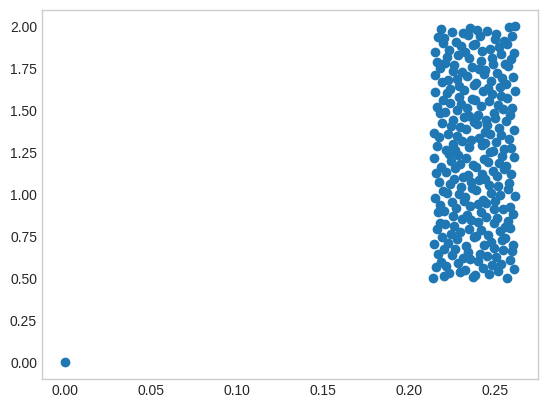

In [318]:
# Data for plotting
t = np.transpose(problem["sobol_sequences"])[1]
s = np.transpose(problem["sobol_sequences"])[0]
fig, ax = plt.subplots()
ax.scatter(t, s)

ax.grid()

# fig.savefig("test.png")
plt.show()

In [319]:
model1.reactions.get_by_id(objective_reaction)

Reaction identifier,Marchantia_Naomi_minus_starch_tx_total
Name,
Memory address,0x7f13ae91a5f0
Stoichiometry,Biomass_output_total <=> Biomass_output_total <=>
GPR,
Lower bound,-1000
Upper bound,1000


In [320]:

df_no_eO, df_no_eO_constraints =  apply_sets_of_constraints2(model1, problem, mode="variation", unbound_objective=False, 
                                                             verbose=True, iterations=iterations)

len(metrics_list) =  10
Creating 201 models...


201 models created.
{'Constraint': ['CO2_uptake', 'fixed biomass output', 'feasibility', 'nCO2RC']}
---- 1 ----
Objective: Marchantia_Naomi_minus_starch_tx_total
Model iteration feasible. Objective flux: 0.2497486
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.783744
consuming CO2:	RXN0_5224_c_12	0.783744
producing CO2:	CO2_pc_12	0.139167
consuming CO2:	ISOCITDEH_RXN_c_12	-0.081982
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010813
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000294
producing CO2:	CO2_mc_12	0.571604
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.143848
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.783744
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000861
producing CO2:	RXN_9652_p_12	0.002471
producing CO2:	RXN_9650_p_12	0.002471
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002471
producing CO2:	RXN_9654_p_12	0.002471
producing HCO3-:	RXN0_5224_p_12	0.019305
consuming CO2:	RXN0_5224_p_12	0.019305
consuming CO2:	CO2_pc_12	0.139167
consumin

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2157523
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.626446
consuming CO2:	RXN0_5224_c_12	0.626446
producing CO2:	CO2_pc_12	0.134244
consuming CO2:	ISOCITDEH_RXN_c_12	-0.081926
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009341
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000254
producing CO2:	CO2_mc_12	0.542765
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.143839
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.626446
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000744
producing CO2:	RXN_9652_p_12	0.002135
producing CO2:	RXN_9650_p_12	0.002135
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002135
producing CO2:	RXN_9654_p_12	0.002135
producing HCO3-:	RXN0_5224_p_12	0.016677
consuming CO2:	RXN0_5224_p_12	0.016677
consuming CO2:	CO2_pc_12	0.134244
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016677
producing CO2:	PYRUVDEH_RXN_p_12	0.018812
producing CO2:	RXN_9653_p_12	0.002135
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1539643
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.714218
consuming CO2:	RXN0_5224_c_12	0.714218
producing CO2:	CO2_pc_12	0.125296
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138147
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006666
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000181
producing CO2:	CO2_mc_12	0.548237
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171985
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.714218
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000531
producing CO2:	RXN_9652_p_12	0.001523
producing CO2:	RXN_9650_p_12	0.001523
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001523
producing CO2:	RXN_9654_p_12	0.001523
producing HCO3-:	RXN0_5224_p_12	0.011901
consuming CO2:	RXN0_5224_p_12	0.011901
consuming CO2:	CO2_pc_12	0.125296
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.011901
producing CO2:	PYRUVDEH_RXN_p_12	0.013425
producing CO2:	RXN_9653_p_12	0.001523
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2350432
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.328746
consuming CO2:	RXN0_5224_c_12	0.328746
producing CO2:	CO2_pc_12	0.141929
consuming CO2:	ISOCITDEH_RXN_c_12	-0.07742
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010176
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000277
producing CO2:	CO2_mc_12	0.482184
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.141575
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.328746
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00081
producing CO2:	RXN_9652_p_12	0.002326
producing CO2:	RXN_9650_p_12	0.002326
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002326
producing CO2:	RXN_9654_p_12	0.002326
producing HCO3-:	RXN0_5224_p_12	0.018168
consuming CO2:	RXN0_5224_p_12	0.018168
consuming CO2:	CO2_pc_12	0.141929
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018168
producing CO2:	PYRUVDEH_RXN_p_12	0.021892
producing CO2:	RXN_9653_p_12	0.002326
producing CO2:	RXN_7800_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.239403
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.427031
consuming CO2:	RXN0_5224_c_12	0.427031
producing CO2:	CO2_pc_12	0.142651
consuming CO2:	ISOCITDEH_RXN_c_12	-0.066864
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010365
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000282
producing CO2:	CO2_mc_12	0.503649
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.136295
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.427031
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000826
producing CO2:	RXN_9652_p_12	0.002369
producing CO2:	RXN_9650_p_12	0.002369
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002369
producing CO2:	RXN_9654_p_12	0.002369
producing HCO3-:	RXN0_5224_p_12	0.018505
consuming CO2:	RXN0_5224_p_12	0.018505
consuming CO2:	CO2_pc_12	0.142651
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018505
producing CO2:	PYRUVDEH_RXN_p_12	0.022298
producing CO2:	RXN_9653_p_12	0.002369
producing CO2:	RXN_7800_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1444112
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.71263
consuming CO2:	RXN0_5224_c_12	0.71263
producing CO2:	CO2_pc_12	0.123913
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138048
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006252
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00017
producing CO2:	CO2_mc_12	0.548402
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171941
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.71263
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000498
producing CO2:	RXN_9652_p_12	0.001429
producing CO2:	RXN_9650_p_12	0.001429
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001429
producing CO2:	RXN_9654_p_12	0.001429
producing HCO3-:	RXN0_5224_p_12	0.011163
consuming CO2:	RXN0_5224_p_12	0.011163
consuming CO2:	CO2_pc_12	0.123913
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.011163
producing CO2:	PYRUVDEH_RXN_p_12	0.012592
producing CO2:	RXN_9653_p_12	0.001429
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2122183
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.743775
consuming CO2:	RXN0_5224_c_12	0.743775
producing CO2:	CO2_pc_12	0.133732
consuming CO2:	ISOCITDEH_RXN_c_12	-0.11756
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009188
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00025
producing CO2:	CO2_mc_12	0.556507
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.161658
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.743775
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000732
producing CO2:	RXN_9652_p_12	0.0021
producing CO2:	RXN_9650_p_12	0.0021
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.0021
producing CO2:	RXN_9654_p_12	0.0021
producing HCO3-:	RXN0_5224_p_12	0.016404
consuming CO2:	RXN0_5224_p_12	0.016404
consuming CO2:	CO2_pc_12	0.133732
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016404
producing CO2:	PYRUVDEH_RXN_p_12	0.018504
producing CO2:	RXN_9653_p_12	0.0021
producing CO2:	RXN_9651_p_12	0.0021
con

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2255377
----- Cytosol -----
producing CO2:	CO2_pc_12	0.141112
consuming CO2:	ISOCITDEH_RXN_c_12	-0.092677
producing CO2:	MALIC_NADP_RXN_c_12	0.028002
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009765
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000265
producing CO2:	CO2_mc_12	0.458029
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.135636
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002232
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000683
producing CO2:	RXN_9650_p_12	0.002232
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002232
producing CO2:	RXN_9654_p_12	0.002232
producing HCO3-:	RXN0_5224_p_12	0.017434
consuming CO2:	RXN0_5224_p_12	0.017434
consuming CO2:	CO2_pc_12	0.141112
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017434
producing CO2:	PYRUVDEH_RXN_p_12	0.021006
producing CO2:	RXN_9653_p_12	0.002232
producing CO2:	RXN_7800_p_12	0.001341
producing CO2:	RXN_9651_p_12	0.002232
producing CO2:	RXN_9648_p_12	0.0022

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2459648
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.170121
consuming CO2:	RXN0_5224_c_12	0.170121
producing CO2:	CO2_pc_12	0.143738
consuming CO2:	ISOCITDEH_RXN_c_12	-0.095428
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010649
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000289
producing CO2:	CO2_mc_12	0.447052
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.150573
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.170121
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000848
producing CO2:	RXN_9652_p_12	0.002434
producing CO2:	RXN_9650_p_12	0.002434
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002434
producing CO2:	RXN_9654_p_12	0.002434
producing HCO3-:	RXN0_5224_p_12	0.019013
consuming CO2:	RXN0_5224_p_12	0.019013
consuming CO2:	CO2_pc_12	0.143738
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019013
producing CO2:	PYRUVDEH_RXN_p_12	0.022909
producing CO2:	RXN_9653_p_12	0.002434
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1880468
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.719885
consuming CO2:	RXN0_5224_c_12	0.719885
producing CO2:	CO2_pc_12	0.130232
consuming CO2:	ISOCITDEH_RXN_c_12	-0.1385
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.008141
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000221
producing CO2:	CO2_mc_12	0.547648
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172142
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.719885
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000648
producing CO2:	RXN_9652_p_12	0.001861
producing CO2:	RXN_9650_p_12	0.001861
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001861
producing CO2:	RXN_9654_p_12	0.001861
producing HCO3-:	RXN0_5224_p_12	0.014536
consuming CO2:	RXN0_5224_p_12	0.014536
consuming CO2:	CO2_pc_12	0.130232
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.014536
producing CO2:	PYRUVDEH_RXN_p_12	0.016396
producing CO2:	RXN_9653_p_12	0.001861
producing CO2:	RXN_9651_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1252359
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.709442
consuming CO2:	RXN0_5224_c_12	0.709442
producing CO2:	CO2_pc_12	0.121136
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137849
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005422
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000147
producing CO2:	CO2_mc_12	0.548733
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171853
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.709442
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000432
producing CO2:	RXN_9652_p_12	0.001239
producing CO2:	RXN_9650_p_12	0.001239
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001239
producing CO2:	RXN_9654_p_12	0.001239
producing HCO3-:	RXN0_5224_p_12	0.00968
consuming CO2:	RXN0_5224_p_12	0.00968
consuming CO2:	CO2_pc_12	0.121136
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.00968
producing CO2:	PYRUVDEH_RXN_p_12	0.01092
producing CO2:	RXN_9653_p_12	0.001239
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2174828
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.3863
consuming CO2:	RXN0_5224_c_12	0.3863
producing CO2:	CO2_pc_12	0.139021
consuming CO2:	ISOCITDEH_RXN_c_12	-0.069608
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009416
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000256
producing CO2:	CO2_mc_12	0.496388
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.137679
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.3863
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00075
producing CO2:	RXN_9652_p_12	0.002152
producing CO2:	RXN_9650_p_12	0.002152
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002152
producing CO2:	RXN_9654_p_12	0.002152
producing HCO3-:	RXN0_5224_p_12	0.016811
consuming CO2:	RXN0_5224_p_12	0.016811
consuming CO2:	CO2_pc_12	0.139021
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016811
producing CO2:	PYRUVDEH_RXN_p_12	0.020256
producing CO2:	RXN_9653_p_12	0.002152
producing CO2:	RXN_7800_p_12	0.001

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2570042
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.32525
consuming CO2:	RXN0_5224_c_12	0.32525
producing CO2:	CO2_pc_12	0.145566
consuming CO2:	ISOCITDEH_RXN_c_12	-0.079589
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011127
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000302
producing CO2:	CO2_mc_12	0.479624
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.142647
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.32525
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000886
producing CO2:	RXN_9652_p_12	0.002543
producing CO2:	RXN_9650_p_12	0.002543
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002543
producing CO2:	RXN_9654_p_12	0.002543
producing HCO3-:	RXN0_5224_p_12	0.019866
consuming CO2:	RXN0_5224_p_12	0.019866
consuming CO2:	CO2_pc_12	0.145566
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019866
producing CO2:	PYRUVDEH_RXN_p_12	0.023937
producing CO2:	RXN_9653_p_12	0.002543
producing CO2:	RXN_7800_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1762589
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.717925
consuming CO2:	RXN0_5224_c_12	0.717925
producing CO2:	CO2_pc_12	0.128525
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138378
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007631
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000207
producing CO2:	CO2_mc_12	0.547852
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172088
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.717925
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000608
producing CO2:	RXN_9652_p_12	0.001744
producing CO2:	RXN_9650_p_12	0.001744
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001744
producing CO2:	RXN_9654_p_12	0.001744
producing HCO3-:	RXN0_5224_p_12	0.013624
consuming CO2:	RXN0_5224_p_12	0.013624
consuming CO2:	CO2_pc_12	0.128525
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.013624
producing CO2:	PYRUVDEH_RXN_p_12	0.015369
producing CO2:	RXN_9653_p_12	0.001744
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2436634
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.705355
consuming CO2:	RXN0_5224_c_12	0.705355
producing CO2:	CO2_pc_12	0.138286
consuming CO2:	ISOCITDEH_RXN_c_12	-0.06858
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010549
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000287
producing CO2:	CO2_mc_12	0.560152
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.13715
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.705355
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00084
producing CO2:	RXN_9652_p_12	0.002411
producing CO2:	RXN_9650_p_12	0.002411
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002411
producing CO2:	RXN_9654_p_12	0.002411
producing HCO3-:	RXN0_5224_p_12	0.018835
consuming CO2:	RXN0_5224_p_12	0.018835
consuming CO2:	CO2_pc_12	0.138286
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018835
producing CO2:	PYRUVDEH_RXN_p_12	0.021246
producing CO2:	RXN_9653_p_12	0.002411
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2315441
----- Cytosol -----
producing CO2:	CO2_pc_12	0.142993
consuming CO2:	ISOCITDEH_RXN_c_12	-0.041763
producing CO2:	MALIC_NADP_RXN_c_12	0.167245
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010025
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000272
producing CO2:	CO2_mc_12	0.560881
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.040565
----- Plastid -----
producing CO2:	IGPSYN_RXN_p_12	0.000118
producing CO2:	RXN_9652_p_12	0.002291
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000702
producing CO2:	RXN_9650_p_12	0.002291
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002291
producing CO2:	RXN_9654_p_12	0.002291
producing HCO3-:	RXN0_5224_p_12	0.017898
consuming CO2:	RXN0_5224_p_12	0.017898
consuming CO2:	CO2_pc_12	0.142993
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017898
producing CO2:	PYRUVDEH_RXN_p_12	0.021566
producing CO2:	RXN_9653_p_12	0.002291
producing CO2:	RXN_7800_p_12	0.001377
producing CO2:	RXN_9651_p_12	0.00

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2410187
----- Cytosol -----
producing CO2:	CO2_pc_12	0.143728
consuming CO2:	ISOCITDEH_RXN_c_12	-0.058772
producing CO2:	MALIC_NADP_RXN_c_12	0.121703
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010435
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000284
producing CO2:	CO2_mc_12	0.527581
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.071853
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002385
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.00073
producing CO2:	RXN_9650_p_12	0.002385
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002385
producing CO2:	RXN_9654_p_12	0.002385
producing HCO3-:	RXN0_5224_p_12	0.01863
consuming CO2:	RXN0_5224_p_12	0.01863
consuming CO2:	CO2_pc_12	0.143728
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01863
producing CO2:	PYRUVDEH_RXN_p_12	0.022448
producing CO2:	RXN_9653_p_12	0.002385
producing CO2:	RXN_7800_p_12	0.001433
producing CO2:	RXN_9651_p_12	0.002385
producing CO2:	RXN_9648_p_12	0.002385
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.229643
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.65336
consuming CO2:	RXN0_5224_c_12	0.65336
producing CO2:	CO2_pc_12	0.136256
consuming CO2:	ISOCITDEH_RXN_c_12	-0.071989
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009942
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00027
producing CO2:	CO2_mc_12	0.549871
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.138863
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.65336
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000792
producing CO2:	RXN_9652_p_12	0.002272
producing CO2:	RXN_9650_p_12	0.002272
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002272
producing CO2:	RXN_9654_p_12	0.002272
producing HCO3-:	RXN0_5224_p_12	0.017751
consuming CO2:	RXN0_5224_p_12	0.017751
consuming CO2:	CO2_pc_12	0.136256
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017751
producing CO2:	PYRUVDEH_RXN_p_12	0.020023
producing CO2:	RXN_9653_p_12	0.002272
producing CO2:	RXN_9651_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.180385
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.718611
consuming CO2:	RXN0_5224_c_12	0.718611
producing CO2:	CO2_pc_12	0.129122
consuming CO2:	ISOCITDEH_RXN_c_12	-0.13842
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00781
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000212
producing CO2:	CO2_mc_12	0.54778
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172107
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.718611
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000622
producing CO2:	RXN_9652_p_12	0.001785
producing CO2:	RXN_9650_p_12	0.001785
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001785
producing CO2:	RXN_9654_p_12	0.001785
producing HCO3-:	RXN0_5224_p_12	0.013943
consuming CO2:	RXN0_5224_p_12	0.013943
consuming CO2:	CO2_pc_12	0.129122
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.013943
producing CO2:	PYRUVDEH_RXN_p_12	0.015728
producing CO2:	RXN_9653_p_12	0.001785
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2222522
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.061603
consuming CO2:	RXN0_5224_c_12	0.061603
producing CO2:	CO2_pc_12	0.137804
consuming CO2:	ISOCITDEH_RXN_c_12	-0.10418
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009622
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000261
producing CO2:	CO2_mc_12	0.427629
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.154962
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.061603
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002199
producing CO2:	RXN_9650_p_12	0.002199
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002199
producing CO2:	RXN_9654_p_12	0.002199
producing HCO3-:	RXN0_5224_p_12	0.018037
consuming CO2:	RXN0_5224_p_12	0.018037
consuming CO2:	CO2_pc_12	0.137804
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01718
producing CO2:	PYRUVDEH_RXN_p_12	0.0207
producing CO2:	RXN_9653_p_12	0.002199
producing CO2:	RXN_7800_p_12	0.001321
producing CO2:	RXN_9651_p_12	0.002199
consu

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2552666
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.711567
consuming CO2:	RXN0_5224_c_12	0.711567
producing CO2:	CO2_pc_12	0.139966
consuming CO2:	ISOCITDEH_RXN_c_12	-0.055942
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011052
producing CO2:	GLUTDECARBOX_RXN_c_12	0.0003
producing CO2:	CO2_mc_12	0.56405
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.130824
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.711567
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00088
producing CO2:	RXN_9652_p_12	0.002526
producing CO2:	RXN_9650_p_12	0.002526
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002526
producing CO2:	RXN_9654_p_12	0.002526
producing HCO3-:	RXN0_5224_p_12	0.019732
consuming CO2:	RXN0_5224_p_12	0.019732
consuming CO2:	CO2_pc_12	0.139966
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019732
producing CO2:	PYRUVDEH_RXN_p_12	0.022257
producing CO2:	RXN_9653_p_12	0.002526
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1104324
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.706981
consuming CO2:	RXN0_5224_c_12	0.706981
producing CO2:	CO2_pc_12	0.118992
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137696
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.004781
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00013
producing CO2:	CO2_mc_12	0.548989
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171785
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.706981
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000381
producing CO2:	RXN_9652_p_12	0.001093
producing CO2:	RXN_9650_p_12	0.001093
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001093
producing CO2:	RXN_9654_p_12	0.001093
producing HCO3-:	RXN0_5224_p_12	0.008536
consuming CO2:	RXN0_5224_p_12	0.008536
consuming CO2:	CO2_pc_12	0.118992
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.008536
producing CO2:	PYRUVDEH_RXN_p_12	0.009629
producing CO2:	RXN_9653_p_12	0.001093
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2034802
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.734469
consuming CO2:	RXN0_5224_c_12	0.734469
producing CO2:	CO2_pc_12	0.132467
consuming CO2:	ISOCITDEH_RXN_c_12	-0.125844
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00881
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000239
producing CO2:	CO2_mc_12	0.552992
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.165805
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.734469
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000702
producing CO2:	RXN_9652_p_12	0.002013
producing CO2:	RXN_9650_p_12	0.002013
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002013
producing CO2:	RXN_9654_p_12	0.002013
producing HCO3-:	RXN0_5224_p_12	0.015729
consuming CO2:	RXN0_5224_p_12	0.015729
consuming CO2:	CO2_pc_12	0.132467
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.015729
producing CO2:	PYRUVDEH_RXN_p_12	0.017742
producing CO2:	RXN_9653_p_12	0.002013
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2334783
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.009105
consuming CO2:	RXN0_5224_c_12	0.009105
producing CO2:	CO2_pc_12	0.137103
consuming CO2:	ISOCITDEH_RXN_c_12	-0.105659
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010108
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000275
producing CO2:	CO2_mc_12	0.425445
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.155829
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.009105
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.00231
producing CO2:	RXN_9650_p_12	0.00231
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.00231
producing CO2:	RXN_9654_p_12	0.00231
producing HCO3-:	RXN0_5224_p_12	0.018047
consuming CO2:	RXN0_5224_p_12	0.018047
consuming CO2:	CO2_pc_12	0.137103
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018047
producing CO2:	PYRUVDEH_RXN_p_12	0.021746
producing CO2:	RXN_9653_p_12	0.00231
producing CO2:	RXN_7800_p_12	0.001388
producing CO2:	RXN_9651_p_12	0.00231
produci

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2591058
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.031983
consuming CO2:	RXN0_5224_c_12	0.031983
producing CO2:	CO2_pc_12	0.140846
consuming CO2:	ISOCITDEH_RXN_c_12	-0.106669
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011218
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000305
producing CO2:	CO2_mc_12	0.425486
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.156334
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.031983
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002564
producing CO2:	RXN_9650_p_12	0.002564
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002564
producing CO2:	RXN_9654_p_12	0.002564
producing HCO3-:	RXN0_5224_p_12	0.020028
consuming CO2:	RXN0_5224_p_12	0.020028
consuming CO2:	CO2_pc_12	0.140846
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.020028
producing CO2:	PYRUVDEH_RXN_p_12	0.024133
producing CO2:	RXN_9653_p_12	0.002564
producing CO2:	RXN_7800_p_12	0.001541
producing CO2:	RXN_9651_p_12	0.002564
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2236252
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.740211
consuming CO2:	RXN0_5224_c_12	0.740211
producing CO2:	CO2_pc_12	0.135384
consuming CO2:	ISOCITDEH_RXN_c_12	-0.102558
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009682
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000263
producing CO2:	CO2_mc_12	0.559128
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.15415
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.740211
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000771
producing CO2:	RXN_9652_p_12	0.002213
producing CO2:	RXN_9650_p_12	0.002213
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002213
producing CO2:	RXN_9654_p_12	0.002213
producing HCO3-:	RXN0_5224_p_12	0.017286
consuming CO2:	RXN0_5224_p_12	0.017286
consuming CO2:	CO2_pc_12	0.135384
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017286
producing CO2:	PYRUVDEH_RXN_p_12	0.019499
producing CO2:	RXN_9653_p_12	0.002213
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1289781
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.710064
consuming CO2:	RXN0_5224_c_12	0.710064
producing CO2:	CO2_pc_12	0.121678
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137888
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005584
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000152
producing CO2:	CO2_mc_12	0.548668
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.17187
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.710064
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000445
producing CO2:	RXN_9652_p_12	0.001276
producing CO2:	RXN_9650_p_12	0.001276
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001276
producing CO2:	RXN_9654_p_12	0.001276
producing HCO3-:	RXN0_5224_p_12	0.00997
consuming CO2:	RXN0_5224_p_12	0.00997
consuming CO2:	CO2_pc_12	0.121678
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.00997
producing CO2:	PYRUVDEH_RXN_p_12	0.011246
producing CO2:	RXN_9653_p_12	0.001276
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2281344
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.448444
consuming CO2:	RXN0_5224_c_12	0.448444
producing CO2:	CO2_pc_12	0.140785
consuming CO2:	ISOCITDEH_RXN_c_12	-0.063574
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009877
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000268
producing CO2:	CO2_mc_12	0.509318
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.134656
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.448444
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000787
producing CO2:	RXN_9652_p_12	0.002257
producing CO2:	RXN_9650_p_12	0.002257
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002257
producing CO2:	RXN_9654_p_12	0.002257
producing HCO3-:	RXN0_5224_p_12	0.017634
consuming CO2:	RXN0_5224_p_12	0.017634
consuming CO2:	CO2_pc_12	0.140785
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017634
producing CO2:	PYRUVDEH_RXN_p_12	0.021248
producing CO2:	RXN_9653_p_12	0.002257
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2494137
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.396646
consuming CO2:	RXN0_5224_c_12	0.396646
producing CO2:	CO2_pc_12	0.144309
consuming CO2:	ISOCITDEH_RXN_c_12	-0.071049
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010798
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000293
producing CO2:	CO2_mc_12	0.49609
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.138381
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.396646
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00086
producing CO2:	RXN_9652_p_12	0.002468
producing CO2:	RXN_9650_p_12	0.002468
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002468
producing CO2:	RXN_9654_p_12	0.002468
producing HCO3-:	RXN0_5224_p_12	0.019279
consuming CO2:	RXN0_5224_p_12	0.019279
consuming CO2:	CO2_pc_12	0.144309
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019279
producing CO2:	PYRUVDEH_RXN_p_12	0.02323
producing CO2:	RXN_9653_p_12	0.002468
producing CO2:	RXN_7800_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1599727
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.715217
consuming CO2:	RXN0_5224_c_12	0.715217
producing CO2:	CO2_pc_12	0.126166
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138209
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006926
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000188
producing CO2:	CO2_mc_12	0.548133
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172013
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.715217
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000552
producing CO2:	RXN_9652_p_12	0.001583
producing CO2:	RXN_9650_p_12	0.001583
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001583
producing CO2:	RXN_9654_p_12	0.001583
producing HCO3-:	RXN0_5224_p_12	0.012366
consuming CO2:	RXN0_5224_p_12	0.012366
consuming CO2:	CO2_pc_12	0.126166
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.012366
producing CO2:	PYRUVDEH_RXN_p_12	0.013949
producing CO2:	RXN_9653_p_12	0.001583
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2378015
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.77102
consuming CO2:	RXN0_5224_c_12	0.77102
producing CO2:	CO2_pc_12	0.137437
consuming CO2:	ISOCITDEH_RXN_c_12	-0.093308
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010296
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00028
producing CO2:	CO2_mc_12	0.566798
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.149517
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.77102
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00082
producing CO2:	RXN_9652_p_12	0.002353
producing CO2:	RXN_9650_p_12	0.002353
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002353
producing CO2:	RXN_9654_p_12	0.002353
producing HCO3-:	RXN0_5224_p_12	0.018382
consuming CO2:	RXN0_5224_p_12	0.018382
consuming CO2:	CO2_pc_12	0.137437
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018382
producing CO2:	PYRUVDEH_RXN_p_12	0.020735
producing CO2:	RXN_9653_p_12	0.002353
producing CO2:	RXN_9651_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2153274
----- Cytosol -----
producing CO2:	CO2_pc_12	0.139746
consuming CO2:	ISOCITDEH_RXN_c_12	-0.049315
producing CO2:	MALIC_NADP_RXN_c_12	0.145102
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009323
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000253
producing CO2:	CO2_mc_12	0.543779
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.055391
----- Plastid -----
producing CO2:	IGPSYN_RXN_p_12	0.00011
producing CO2:	RXN_9652_p_12	0.002131
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000652
producing CO2:	RXN_9650_p_12	0.002131
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002131
producing CO2:	RXN_9654_p_12	0.002131
producing HCO3-:	RXN0_5224_p_12	0.016644
consuming CO2:	RXN0_5224_p_12	0.016644
consuming CO2:	CO2_pc_12	0.139746
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016644
producing CO2:	PYRUVDEH_RXN_p_12	0.020055
producing CO2:	RXN_9653_p_12	0.002131
producing CO2:	RXN_7800_p_12	0.00128
producing CO2:	RXN_9651_p_12	0.0021

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2426211
----- Cytosol -----
producing CO2:	CO2_pc_12	0.143999
consuming CO2:	ISOCITDEH_RXN_c_12	-0.083485
producing CO2:	MALIC_NADP_RXN_c_12	0.054605
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010504
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000285
producing CO2:	CO2_mc_12	0.478337
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.11776
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002401
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000735
producing CO2:	RXN_9650_p_12	0.002401
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002401
producing CO2:	RXN_9654_p_12	0.002401
producing HCO3-:	RXN0_5224_p_12	0.018754
consuming CO2:	RXN0_5224_p_12	0.018754
consuming CO2:	CO2_pc_12	0.143999
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018754
producing CO2:	PYRUVDEH_RXN_p_12	0.022597
producing CO2:	RXN_9653_p_12	0.002401
producing CO2:	RXN_7800_p_12	0.001443
producing CO2:	RXN_9651_p_12	0.002401
producing CO2:	RXN_9648_p_12	0.00240

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.231289
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.740385
consuming CO2:	RXN0_5224_c_12	0.740385
producing CO2:	CO2_pc_12	0.136494
consuming CO2:	ISOCITDEH_RXN_c_12	-0.093163
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010014
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000272
producing CO2:	CO2_mc_12	0.561211
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.149449
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.740385
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000798
producing CO2:	RXN_9652_p_12	0.002289
producing CO2:	RXN_9650_p_12	0.002289
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002289
producing CO2:	RXN_9654_p_12	0.002289
producing HCO3-:	RXN0_5224_p_12	0.017878
consuming CO2:	RXN0_5224_p_12	0.017878
consuming CO2:	CO2_pc_12	0.136494
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017878
producing CO2:	PYRUVDEH_RXN_p_12	0.020167
producing CO2:	RXN_9653_p_12	0.002289
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1585378
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.714979
consuming CO2:	RXN0_5224_c_12	0.714979
producing CO2:	CO2_pc_12	0.125959
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138194
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006864
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000187
producing CO2:	CO2_mc_12	0.548158
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172006
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.714979
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000547
producing CO2:	RXN_9652_p_12	0.001569
producing CO2:	RXN_9650_p_12	0.001569
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001569
producing CO2:	RXN_9654_p_12	0.001569
producing HCO3-:	RXN0_5224_p_12	0.012255
consuming CO2:	RXN0_5224_p_12	0.012255
consuming CO2:	CO2_pc_12	0.125959
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.012255
producing CO2:	PYRUVDEH_RXN_p_12	0.013823
producing CO2:	RXN_9653_p_12	0.001569
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2208299
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.201436
consuming CO2:	RXN0_5224_c_12	0.201436
producing CO2:	CO2_pc_12	0.139575
consuming CO2:	ISOCITDEH_RXN_c_12	-0.090398
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009561
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00026
producing CO2:	CO2_mc_12	0.455077
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.148072
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.201436
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000761
producing CO2:	RXN_9652_p_12	0.002185
producing CO2:	RXN_9650_p_12	0.002185
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002185
producing CO2:	RXN_9654_p_12	0.002185
producing HCO3-:	RXN0_5224_p_12	0.01707
consuming CO2:	RXN0_5224_p_12	0.01707
consuming CO2:	CO2_pc_12	0.139575
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01707
producing CO2:	PYRUVDEH_RXN_p_12	0.020568
producing CO2:	RXN_9653_p_12	0.002185
producing CO2:	RXN_7800_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2536613
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.606915
consuming CO2:	RXN0_5224_c_12	0.606915
producing CO2:	CO2_pc_12	0.139734
consuming CO2:	ISOCITDEH_RXN_c_12	-0.046065
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010982
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000298
producing CO2:	CO2_mc_12	0.546401
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.125887
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.606915
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000875
producing CO2:	RXN_9652_p_12	0.00251
producing CO2:	RXN_9650_p_12	0.00251
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.00251
producing CO2:	RXN_9654_p_12	0.00251
producing HCO3-:	RXN0_5224_p_12	0.019608
consuming CO2:	RXN0_5224_p_12	0.019608
consuming CO2:	CO2_pc_12	0.139734
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019608
producing CO2:	PYRUVDEH_RXN_p_12	0.022118
producing CO2:	RXN_9653_p_12	0.00251
producing CO2:	RXN_9651_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1279014
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.709885
consuming CO2:	RXN0_5224_c_12	0.709885
producing CO2:	CO2_pc_12	0.121522
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137877
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005537
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00015
producing CO2:	CO2_mc_12	0.548687
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171865
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.709885
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000441
producing CO2:	RXN_9652_p_12	0.001266
producing CO2:	RXN_9650_p_12	0.001266
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001266
producing CO2:	RXN_9654_p_12	0.001266
producing HCO3-:	RXN0_5224_p_12	0.009887
consuming CO2:	RXN0_5224_p_12	0.009887
consuming CO2:	CO2_pc_12	0.121522
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.009887
producing CO2:	PYRUVDEH_RXN_p_12	0.011152
producing CO2:	RXN_9653_p_12	0.001266
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2259018
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.758348
consuming CO2:	RXN0_5224_c_12	0.758348
producing CO2:	CO2_pc_12	0.135714
consuming CO2:	ISOCITDEH_RXN_c_12	-0.104589
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00978
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000266
producing CO2:	CO2_mc_12	0.562011
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.155165
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.758348
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000779
producing CO2:	RXN_9652_p_12	0.002235
producing CO2:	RXN_9650_p_12	0.002235
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002235
producing CO2:	RXN_9654_p_12	0.002235
producing HCO3-:	RXN0_5224_p_12	0.017462
consuming CO2:	RXN0_5224_p_12	0.017462
consuming CO2:	CO2_pc_12	0.135714
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017462
producing CO2:	PYRUVDEH_RXN_p_12	0.019697
producing CO2:	RXN_9653_p_12	0.002235
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2348919
----- Cytosol -----
producing CO2:	CO2_pc_12	0.142693
consuming CO2:	ISOCITDEH_RXN_c_12	-0.084512
producing CO2:	MALIC_NADP_RXN_c_12	0.05109
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.01017
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000276
producing CO2:	CO2_mc_12	0.475411
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.120022
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002324
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000712
producing CO2:	RXN_9650_p_12	0.002324
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002324
producing CO2:	RXN_9654_p_12	0.002324
producing HCO3-:	RXN0_5224_p_12	0.018157
consuming CO2:	RXN0_5224_p_12	0.018157
consuming CO2:	CO2_pc_12	0.142693
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018157
producing CO2:	PYRUVDEH_RXN_p_12	0.021878
producing CO2:	RXN_9653_p_12	0.002324
producing CO2:	RXN_7800_p_12	0.001397
producing CO2:	RXN_9651_p_12	0.002324
producing CO2:	RXN_9648_p_12	0.002324

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2605717
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.177792
consuming CO2:	RXN0_5224_c_12	0.177792
producing CO2:	CO2_pc_12	0.146157
consuming CO2:	ISOCITDEH_RXN_c_12	-0.09571
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011281
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000307
producing CO2:	CO2_mc_12	0.447671
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.150705
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.177792
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000898
producing CO2:	RXN_9652_p_12	0.002578
producing CO2:	RXN_9650_p_12	0.002578
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002578
producing CO2:	RXN_9654_p_12	0.002578
producing HCO3-:	RXN0_5224_p_12	0.020142
consuming CO2:	RXN0_5224_p_12	0.020142
consuming CO2:	CO2_pc_12	0.146157
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.020142
producing CO2:	PYRUVDEH_RXN_p_12	0.024269
producing CO2:	RXN_9653_p_12	0.002578
producing CO2:	RXN_7800_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2048709
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.73595
consuming CO2:	RXN0_5224_c_12	0.73595
producing CO2:	CO2_pc_12	0.132668
consuming CO2:	ISOCITDEH_RXN_c_12	-0.124525
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00887
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000241
producing CO2:	CO2_mc_12	0.553551
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.165145
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.73595
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000706
producing CO2:	RXN_9652_p_12	0.002027
producing CO2:	RXN_9650_p_12	0.002027
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002027
producing CO2:	RXN_9654_p_12	0.002027
producing HCO3-:	RXN0_5224_p_12	0.015836
consuming CO2:	RXN0_5224_p_12	0.015836
consuming CO2:	CO2_pc_12	0.132668
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.015836
producing CO2:	PYRUVDEH_RXN_p_12	0.017863
producing CO2:	RXN_9653_p_12	0.002027
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1118661
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.707219
consuming CO2:	RXN0_5224_c_12	0.707219
producing CO2:	CO2_pc_12	0.1192
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137711
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.004843
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000132
producing CO2:	CO2_mc_12	0.548964
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171791
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.707219
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000386
producing CO2:	RXN_9652_p_12	0.001107
producing CO2:	RXN_9650_p_12	0.001107
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001107
producing CO2:	RXN_9654_p_12	0.001107
producing HCO3-:	RXN0_5224_p_12	0.008647
consuming CO2:	RXN0_5224_p_12	0.008647
consuming CO2:	CO2_pc_12	0.1192
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.008647
producing CO2:	PYRUVDEH_RXN_p_12	0.009754
producing CO2:	RXN_9653_p_12	0.001107
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2264884
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.551962
consuming CO2:	RXN0_5224_c_12	0.551962
producing CO2:	CO2_pc_12	0.135799
consuming CO2:	ISOCITDEH_RXN_c_12	-0.050174
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009806
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000266
producing CO2:	CO2_mc_12	0.535983
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.127957
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.551962
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000781
producing CO2:	RXN_9652_p_12	0.002241
producing CO2:	RXN_9650_p_12	0.002241
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002241
producing CO2:	RXN_9654_p_12	0.002241
producing HCO3-:	RXN0_5224_p_12	0.017507
consuming CO2:	RXN0_5224_p_12	0.017507
consuming CO2:	CO2_pc_12	0.135799
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017507
producing CO2:	PYRUVDEH_RXN_p_12	0.019748
producing CO2:	RXN_9653_p_12	0.002241
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2479507
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.235932
consuming CO2:	RXN0_5224_c_12	0.235932
producing CO2:	CO2_pc_12	0.144067
consuming CO2:	ISOCITDEH_RXN_c_12	-0.088769
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010735
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000292
producing CO2:	CO2_mc_12	0.460531
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.147242
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.235932
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000855
producing CO2:	RXN_9652_p_12	0.002453
producing CO2:	RXN_9650_p_12	0.002453
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002453
producing CO2:	RXN_9654_p_12	0.002453
producing HCO3-:	RXN0_5224_p_12	0.019166
consuming CO2:	RXN0_5224_p_12	0.019166
consuming CO2:	CO2_pc_12	0.144067
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019166
producing CO2:	PYRUVDEH_RXN_p_12	0.023094
producing CO2:	RXN_9653_p_12	0.002453
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1814603
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.71879
consuming CO2:	RXN0_5224_c_12	0.71879
producing CO2:	CO2_pc_12	0.129278
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138432
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007856
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000214
producing CO2:	CO2_mc_12	0.547762
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172112
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.71879
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000626
producing CO2:	RXN_9652_p_12	0.001796
producing CO2:	RXN_9650_p_12	0.001796
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001796
producing CO2:	RXN_9654_p_12	0.001796
producing HCO3-:	RXN0_5224_p_12	0.014027
consuming CO2:	RXN0_5224_p_12	0.014027
consuming CO2:	CO2_pc_12	0.129278
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.014027
producing CO2:	PYRUVDEH_RXN_p_12	0.015822
producing CO2:	RXN_9653_p_12	0.001796
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2524599
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.778032
consuming CO2:	RXN0_5224_c_12	0.778032
producing CO2:	CO2_pc_12	0.13956
consuming CO2:	ISOCITDEH_RXN_c_12	-0.07712
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.01093
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000297
producing CO2:	CO2_mc_12	0.571618
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.141415
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.778032
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000871
producing CO2:	RXN_9652_p_12	0.002498
producing CO2:	RXN_9650_p_12	0.002498
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002498
producing CO2:	RXN_9654_p_12	0.002498
producing HCO3-:	RXN0_5224_p_12	0.019515
consuming CO2:	RXN0_5224_p_12	0.019515
consuming CO2:	CO2_pc_12	0.13956
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019515
producing CO2:	PYRUVDEH_RXN_p_12	0.022013
producing CO2:	RXN_9653_p_12	0.002498
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2169822
----- Cytosol -----
producing CO2:	CO2_pc_12	0.140478
consuming CO2:	ISOCITDEH_RXN_c_12	-0.029453
producing CO2:	MALIC_NADP_RXN_c_12	0.199378
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009394
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000255
producing CO2:	CO2_mc_12	0.583841
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.018324
----- Plastid -----
producing CO2:	IGPSYN_RXN_p_12	0.00011
producing CO2:	RXN_9652_p_12	0.002147
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000657
producing CO2:	RXN_9650_p_12	0.002147
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002147
producing CO2:	RXN_9654_p_12	0.002147
producing HCO3-:	RXN0_5224_p_12	0.016772
consuming CO2:	RXN0_5224_p_12	0.016772
consuming CO2:	CO2_pc_12	0.140478
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016772
producing CO2:	PYRUVDEH_RXN_p_12	0.020209
producing CO2:	RXN_9653_p_12	0.002147
producing CO2:	RXN_7800_p_12	0.00129
producing CO2:	RXN_9651_p_12	0.0021

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2505603
----- Cytosol -----
producing CO2:	CO2_pc_12	0.14534
consuming CO2:	ISOCITDEH_RXN_c_12	-0.067974
producing CO2:	MALIC_NADP_RXN_c_12	0.09755
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010848
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000295
producing CO2:	CO2_mc_12	0.510251
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.088543
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002479
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000759
producing CO2:	RXN_9650_p_12	0.002479
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002479
producing CO2:	RXN_9654_p_12	0.002479
producing HCO3-:	RXN0_5224_p_12	0.019368
consuming CO2:	RXN0_5224_p_12	0.019368
consuming CO2:	CO2_pc_12	0.14534
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019368
producing CO2:	PYRUVDEH_RXN_p_12	0.023337
producing CO2:	RXN_9653_p_12	0.002479
producing CO2:	RXN_7800_p_12	0.00149
producing CO2:	RXN_9651_p_12	0.002479
producing CO2:	RXN_9648_p_12	0.002479
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2143387
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.533287
consuming CO2:	RXN0_5224_c_12	0.533287
producing CO2:	CO2_pc_12	0.134039
consuming CO2:	ISOCITDEH_RXN_c_12	-0.05883
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00928
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000252
producing CO2:	CO2_mc_12	0.530719
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.132292
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.533287
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000739
producing CO2:	RXN_9652_p_12	0.002121
producing CO2:	RXN_9650_p_12	0.002121
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002121
producing CO2:	RXN_9654_p_12	0.002121
producing HCO3-:	RXN0_5224_p_12	0.016568
consuming CO2:	RXN0_5224_p_12	0.016568
consuming CO2:	CO2_pc_12	0.134039
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016568
producing CO2:	PYRUVDEH_RXN_p_12	0.018689
producing CO2:	RXN_9653_p_12	0.002121
producing CO2:	RXN_9651_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1773417
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.718105
consuming CO2:	RXN0_5224_c_12	0.718105
producing CO2:	CO2_pc_12	0.128682
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138389
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007678
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000209
producing CO2:	CO2_mc_12	0.547833
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172093
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.718105
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000612
producing CO2:	RXN_9652_p_12	0.001755
producing CO2:	RXN_9650_p_12	0.001755
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001755
producing CO2:	RXN_9654_p_12	0.001755
producing HCO3-:	RXN0_5224_p_12	0.013708
consuming CO2:	RXN0_5224_p_12	0.013708
consuming CO2:	CO2_pc_12	0.128682
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.013708
producing CO2:	PYRUVDEH_RXN_p_12	0.015463
producing CO2:	RXN_9653_p_12	0.001755
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2366979
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.201142
consuming CO2:	RXN0_5224_c_12	0.201142
producing CO2:	CO2_pc_12	0.142203
consuming CO2:	ISOCITDEH_RXN_c_12	-0.091598
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010248
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000278
producing CO2:	CO2_mc_12	0.453963
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.148663
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.201142
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000816
producing CO2:	RXN_9652_p_12	0.002342
producing CO2:	RXN_9650_p_12	0.002342
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002342
producing CO2:	RXN_9654_p_12	0.002342
producing HCO3-:	RXN0_5224_p_12	0.018296
consuming CO2:	RXN0_5224_p_12	0.018296
consuming CO2:	CO2_pc_12	0.142203
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018296
producing CO2:	PYRUVDEH_RXN_p_12	0.022046
producing CO2:	RXN_9653_p_12	0.002342
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2408688
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.547305
consuming CO2:	RXN0_5224_c_12	0.547305
producing CO2:	CO2_pc_12	0.142894
consuming CO2:	ISOCITDEH_RXN_c_12	-0.053633
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010428
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000283
producing CO2:	CO2_mc_12	0.53023
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.129678
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.547305
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000831
producing CO2:	RXN_9652_p_12	0.002383
producing CO2:	RXN_9650_p_12	0.002383
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002383
producing CO2:	RXN_9654_p_12	0.002383
producing HCO3-:	RXN0_5224_p_12	0.018619
consuming CO2:	RXN0_5224_p_12	0.018619
consuming CO2:	CO2_pc_12	0.142894
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018619
producing CO2:	PYRUVDEH_RXN_p_12	0.022434
producing CO2:	RXN_9653_p_12	0.002383
producing CO2:	RXN_7800_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.126667
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.70968
consuming CO2:	RXN0_5224_c_12	0.70968
producing CO2:	CO2_pc_12	0.121343
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137864
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005484
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000149
producing CO2:	CO2_mc_12	0.548708
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171859
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.70968
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000437
producing CO2:	RXN_9652_p_12	0.001253
producing CO2:	RXN_9650_p_12	0.001253
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001253
producing CO2:	RXN_9654_p_12	0.001253
producing HCO3-:	RXN0_5224_p_12	0.009791
consuming CO2:	RXN0_5224_p_12	0.009791
consuming CO2:	CO2_pc_12	0.121343
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.009791
producing CO2:	PYRUVDEH_RXN_p_12	0.011044
producing CO2:	RXN_9653_p_12	0.001253
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1894448
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.720117
consuming CO2:	RXN0_5224_c_12	0.720117
producing CO2:	CO2_pc_12	0.130434
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138514
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.008202
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000223
producing CO2:	CO2_mc_12	0.547624
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172148
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.720117
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000653
producing CO2:	RXN_9652_p_12	0.001875
producing CO2:	RXN_9650_p_12	0.001875
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001875
producing CO2:	RXN_9654_p_12	0.001875
producing HCO3-:	RXN0_5224_p_12	0.014644
consuming CO2:	RXN0_5224_p_12	0.014644
consuming CO2:	CO2_pc_12	0.130434
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.014644
producing CO2:	PYRUVDEH_RXN_p_12	0.016518
producing CO2:	RXN_9653_p_12	0.001875
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2238917
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.028151
consuming CO2:	RXN0_5224_c_12	0.028151
producing CO2:	CO2_pc_12	0.13623
consuming CO2:	ISOCITDEH_RXN_c_12	-0.104631
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009693
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000263
producing CO2:	CO2_mc_12	0.416048
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.155187
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.028151
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002215
producing CO2:	RXN_9650_p_12	0.002215
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002215
producing CO2:	RXN_9654_p_12	0.002215
producing HCO3-:	RXN0_5224_p_12	0.01817
consuming CO2:	RXN0_5224_p_12	0.01817
consuming CO2:	CO2_pc_12	0.13623
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017306
producing CO2:	PYRUVDEH_RXN_p_12	0.020853
producing CO2:	RXN_9653_p_12	0.002215
producing CO2:	RXN_7800_p_12	0.001331
producing CO2:	RXN_9651_p_12	0.002215
consu

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2443594
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.02606
consuming CO2:	RXN0_5224_c_12	0.02606
producing CO2:	CO2_pc_12	0.138692
consuming CO2:	ISOCITDEH_RXN_c_12	-0.106044
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010579
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000288
producing CO2:	CO2_mc_12	0.42555
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.156022
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.02606
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002418
producing CO2:	RXN_9650_p_12	0.002418
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002418
producing CO2:	RXN_9654_p_12	0.002418
producing HCO3-:	RXN0_5224_p_12	0.018888
consuming CO2:	RXN0_5224_p_12	0.018888
consuming CO2:	CO2_pc_12	0.138692
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018888
producing CO2:	PYRUVDEH_RXN_p_12	0.022759
producing CO2:	RXN_9653_p_12	0.002418
producing CO2:	RXN_7800_p_12	0.001453
producing CO2:	RXN_9651_p_12	0.002418
produ

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2111012
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.742585
consuming CO2:	RXN0_5224_c_12	0.742585
producing CO2:	CO2_pc_12	0.133571
consuming CO2:	ISOCITDEH_RXN_c_12	-0.118619
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00914
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000248
producing CO2:	CO2_mc_12	0.556058
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.162188
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.742585
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000728
producing CO2:	RXN_9652_p_12	0.002089
producing CO2:	RXN_9650_p_12	0.002089
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002089
producing CO2:	RXN_9654_p_12	0.002089
producing HCO3-:	RXN0_5224_p_12	0.016318
consuming CO2:	RXN0_5224_p_12	0.016318
consuming CO2:	CO2_pc_12	0.133571
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016318
producing CO2:	PYRUVDEH_RXN_p_12	0.018407
producing CO2:	RXN_9653_p_12	0.002089
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1433272
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.71245
consuming CO2:	RXN0_5224_c_12	0.71245
producing CO2:	CO2_pc_12	0.123756
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138037
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006205
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000169
producing CO2:	CO2_mc_12	0.54842
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171936
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.71245
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000494
producing CO2:	RXN_9652_p_12	0.001418
producing CO2:	RXN_9650_p_12	0.001418
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001418
producing CO2:	RXN_9654_p_12	0.001418
producing HCO3-:	RXN0_5224_p_12	0.011079
consuming CO2:	RXN0_5224_p_12	0.011079
consuming CO2:	CO2_pc_12	0.123756
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.011079
producing CO2:	PYRUVDEH_RXN_p_12	0.012497
producing CO2:	RXN_9653_p_12	0.001418
producing CO2:	RXN_9651_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2188964
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.283149
consuming CO2:	RXN0_5224_c_12	0.283149
producing CO2:	CO2_pc_12	0.139255
consuming CO2:	ISOCITDEH_RXN_c_12	-0.081172
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009477
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000258
producing CO2:	CO2_mc_12	0.473374
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.14346
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.283149
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000755
producing CO2:	RXN_9652_p_12	0.002166
producing CO2:	RXN_9650_p_12	0.002166
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002166
producing CO2:	RXN_9654_p_12	0.002166
producing HCO3-:	RXN0_5224_p_12	0.01692
consuming CO2:	RXN0_5224_p_12	0.01692
consuming CO2:	CO2_pc_12	0.139255
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01692
producing CO2:	PYRUVDEH_RXN_p_12	0.020388
producing CO2:	RXN_9653_p_12	0.002166
producing CO2:	RXN_7800_p_12	0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2586067
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.476488
consuming CO2:	RXN0_5224_c_12	0.476488
producing CO2:	CO2_pc_12	0.145832
consuming CO2:	ISOCITDEH_RXN_c_12	-0.062932
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011196
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000304
producing CO2:	CO2_mc_12	0.513068
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.134317
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.476488
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000892
producing CO2:	RXN_9652_p_12	0.002559
producing CO2:	RXN_9650_p_12	0.002559
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002559
producing CO2:	RXN_9654_p_12	0.002559
producing HCO3-:	RXN0_5224_p_12	0.01999
consuming CO2:	RXN0_5224_p_12	0.01999
consuming CO2:	CO2_pc_12	0.145832
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01999
producing CO2:	PYRUVDEH_RXN_p_12	0.024086
producing CO2:	RXN_9653_p_12	0.002559
producing CO2:	RXN_7800_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1525318
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.71398
consuming CO2:	RXN0_5224_c_12	0.71398
producing CO2:	CO2_pc_12	0.125089
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138132
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006604
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000179
producing CO2:	CO2_mc_12	0.548261
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171978
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.71398
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000526
producing CO2:	RXN_9652_p_12	0.001509
producing CO2:	RXN_9650_p_12	0.001509
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001509
producing CO2:	RXN_9654_p_12	0.001509
producing HCO3-:	RXN0_5224_p_12	0.01179
consuming CO2:	RXN0_5224_p_12	0.01179
consuming CO2:	CO2_pc_12	0.125089
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01179
producing CO2:	PYRUVDEH_RXN_p_12	0.0133
producing CO2:	RXN_9653_p_12	0.001509
producing CO2:	RXN_9651_p_12	0.0015

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2405303
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.773926
consuming CO2:	RXN0_5224_c_12	0.773926
producing CO2:	CO2_pc_12	0.137832
consuming CO2:	ISOCITDEH_RXN_c_12	-0.090721
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010414
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000283
producing CO2:	CO2_mc_12	0.567896
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.148223
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.773926
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000829
producing CO2:	RXN_9652_p_12	0.00238
producing CO2:	RXN_9650_p_12	0.00238
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.00238
producing CO2:	RXN_9654_p_12	0.00238
producing HCO3-:	RXN0_5224_p_12	0.018593
consuming CO2:	RXN0_5224_p_12	0.018593
consuming CO2:	CO2_pc_12	0.137832
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018593
producing CO2:	PYRUVDEH_RXN_p_12	0.020973
producing CO2:	RXN_9653_p_12	0.00238
producing CO2:	RXN_9651_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2301218
----- Cytosol -----
producing CO2:	CO2_pc_12	0.141886
consuming CO2:	ISOCITDEH_RXN_c_12	-0.059914
producing CO2:	MALIC_NADP_RXN_c_12	0.117582
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009963
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000271
producing CO2:	CO2_mc_12	0.524072
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.07447
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002277
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000697
producing CO2:	RXN_9650_p_12	0.002277
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002277
producing CO2:	RXN_9654_p_12	0.002277
producing HCO3-:	RXN0_5224_p_12	0.017788
consuming CO2:	RXN0_5224_p_12	0.017788
consuming CO2:	CO2_pc_12	0.141886
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017788
producing CO2:	PYRUVDEH_RXN_p_12	0.021433
producing CO2:	RXN_9653_p_12	0.002277
producing CO2:	RXN_7800_p_12	0.001368
producing CO2:	RXN_9651_p_12	0.002277
producing CO2:	RXN_9648_p_12	0.00227

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2567792
----- Cytosol -----
producing CO2:	CO2_pc_12	0.146391
consuming CO2:	ISOCITDEH_RXN_c_12	-0.091418
producing CO2:	MALIC_NADP_RXN_c_12	0.034335
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011117
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000302
producing CO2:	CO2_mc_12	0.464063
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.131881
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002541
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000778
producing CO2:	RXN_9650_p_12	0.002541
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002541
producing CO2:	RXN_9654_p_12	0.002541
producing HCO3-:	RXN0_5224_p_12	0.019849
consuming CO2:	RXN0_5224_p_12	0.019849
consuming CO2:	CO2_pc_12	0.146391
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019849
producing CO2:	PYRUVDEH_RXN_p_12	0.023916
producing CO2:	RXN_9653_p_12	0.002541
producing CO2:	RXN_7800_p_12	0.001527
producing CO2:	RXN_9651_p_12	0.002541
producing CO2:	RXN_9648_p_12	0.0025

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2216007
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.654322
consuming CO2:	RXN0_5224_c_12	0.654322
producing CO2:	CO2_pc_12	0.135091
consuming CO2:	ISOCITDEH_RXN_c_12	-0.082153
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009594
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000261
producing CO2:	CO2_mc_12	0.547828
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.143949
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.654322
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000764
producing CO2:	RXN_9652_p_12	0.002193
producing CO2:	RXN_9650_p_12	0.002193
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002193
producing CO2:	RXN_9654_p_12	0.002193
producing HCO3-:	RXN0_5224_p_12	0.017129
consuming CO2:	RXN0_5224_p_12	0.017129
consuming CO2:	CO2_pc_12	0.135091
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017129
producing CO2:	PYRUVDEH_RXN_p_12	0.019322
producing CO2:	RXN_9653_p_12	0.002193
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1501259
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.71358
consuming CO2:	RXN0_5224_c_12	0.71358
producing CO2:	CO2_pc_12	0.12474
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138107
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.0065
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000177
producing CO2:	CO2_mc_12	0.548303
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171967
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.71358
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000518
producing CO2:	RXN_9652_p_12	0.001486
producing CO2:	RXN_9650_p_12	0.001486
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001486
producing CO2:	RXN_9654_p_12	0.001486
producing HCO3-:	RXN0_5224_p_12	0.011604
consuming CO2:	RXN0_5224_p_12	0.011604
consuming CO2:	CO2_pc_12	0.12474
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.011604
producing CO2:	PYRUVDEH_RXN_p_12	0.01309
producing CO2:	RXN_9653_p_12	0.001486
producing CO2:	RXN_9651_p_12	0.0014

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2319666
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.315793
consuming CO2:	RXN0_5224_c_12	0.315793
producing CO2:	CO2_pc_12	0.141419
consuming CO2:	ISOCITDEH_RXN_c_12	-0.078608
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010043
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000273
producing CO2:	CO2_mc_12	0.479559
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.142171
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.315793
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.0008
producing CO2:	RXN_9652_p_12	0.002295
producing CO2:	RXN_9650_p_12	0.002295
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002295
producing CO2:	RXN_9654_p_12	0.002295
producing HCO3-:	RXN0_5224_p_12	0.017931
consuming CO2:	RXN0_5224_p_12	0.017931
consuming CO2:	CO2_pc_12	0.141419
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017931
producing CO2:	PYRUVDEH_RXN_p_12	0.021605
producing CO2:	RXN_9653_p_12	0.002295
producing CO2:	RXN_7800_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2454604
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.474908
consuming CO2:	RXN0_5224_c_12	0.474908
producing CO2:	CO2_pc_12	0.143654
consuming CO2:	ISOCITDEH_RXN_c_12	-0.062041
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010627
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000289
producing CO2:	CO2_mc_12	0.513785
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.13388
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.474908
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000846
producing CO2:	RXN_9652_p_12	0.002429
producing CO2:	RXN_9650_p_12	0.002429
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002429
producing CO2:	RXN_9654_p_12	0.002429
producing HCO3-:	RXN0_5224_p_12	0.018974
consuming CO2:	RXN0_5224_p_12	0.018974
consuming CO2:	CO2_pc_12	0.143654
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018974
producing CO2:	PYRUVDEH_RXN_p_12	0.022862
producing CO2:	RXN_9653_p_12	0.002429
producing CO2:	RXN_7800_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1405339
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.711985
consuming CO2:	RXN0_5224_c_12	0.711985
producing CO2:	CO2_pc_12	0.123351
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138008
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.006084
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000165
producing CO2:	CO2_mc_12	0.548469
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171923
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.711985
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000485
producing CO2:	RXN_9652_p_12	0.001391
producing CO2:	RXN_9650_p_12	0.001391
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001391
producing CO2:	RXN_9654_p_12	0.001391
producing HCO3-:	RXN0_5224_p_12	0.010863
consuming CO2:	RXN0_5224_p_12	0.010863
consuming CO2:	CO2_pc_12	0.123351
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.010863
producing CO2:	PYRUVDEH_RXN_p_12	0.012254
producing CO2:	RXN_9653_p_12	0.001391
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2134264
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.745062
consuming CO2:	RXN0_5224_c_12	0.745062
producing CO2:	CO2_pc_12	0.133907
consuming CO2:	ISOCITDEH_RXN_c_12	-0.116415
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00924
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000251
producing CO2:	CO2_mc_12	0.556993
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.161085
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.745062
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000736
producing CO2:	RXN_9652_p_12	0.002112
producing CO2:	RXN_9650_p_12	0.002112
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002112
producing CO2:	RXN_9654_p_12	0.002112
producing HCO3-:	RXN0_5224_p_12	0.016497
consuming CO2:	RXN0_5224_p_12	0.016497
consuming CO2:	CO2_pc_12	0.133907
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016497
producing CO2:	PYRUVDEH_RXN_p_12	0.018609
producing CO2:	RXN_9653_p_12	0.002112
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2178126
----- Cytosol -----
producing CO2:	CO2_pc_12	0.139806
consuming CO2:	ISOCITDEH_RXN_c_12	-0.077866
producing CO2:	MALIC_NADP_RXN_c_12	0.067586
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.00943
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000256
producing CO2:	CO2_mc_12	0.486782
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.108428
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002155
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.00066
producing CO2:	RXN_9650_p_12	0.002155
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002155
producing CO2:	RXN_9654_p_12	0.002155
producing HCO3-:	RXN0_5224_p_12	0.016836
consuming CO2:	RXN0_5224_p_12	0.016836
consuming CO2:	CO2_pc_12	0.139806
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016836
producing CO2:	PYRUVDEH_RXN_p_12	0.020287
producing CO2:	RXN_9653_p_12	0.002155
producing CO2:	RXN_7800_p_12	0.001295
producing CO2:	RXN_9651_p_12	0.002155
producing CO2:	RXN_9648_p_12	0.002155

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2389776
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.084663
consuming CO2:	RXN0_5224_c_12	0.084663
producing CO2:	CO2_pc_12	0.140672
consuming CO2:	ISOCITDEH_RXN_c_12	-0.103047
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010346
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000281
producing CO2:	CO2_mc_12	0.431249
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.154386
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.084663
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002365
producing CO2:	RXN_9650_p_12	0.002365
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002365
producing CO2:	RXN_9654_p_12	0.002365
producing HCO3-:	RXN0_5224_p_12	0.019146
consuming CO2:	RXN0_5224_p_12	0.019146
consuming CO2:	CO2_pc_12	0.140672
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018472
producing CO2:	PYRUVDEH_RXN_p_12	0.022258
producing CO2:	RXN_9653_p_12	0.002365
producing CO2:	RXN_7800_p_12	0.001421
producing CO2:	RXN_9651_p_12	0.002365
c

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1967732
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.727326
consuming CO2:	RXN0_5224_c_12	0.727326
producing CO2:	CO2_pc_12	0.131496
consuming CO2:	ISOCITDEH_RXN_c_12	-0.132202
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.008519
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000232
producing CO2:	CO2_mc_12	0.550294
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.168988
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.727326
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000679
producing CO2:	RXN_9652_p_12	0.001947
producing CO2:	RXN_9650_p_12	0.001947
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001947
producing CO2:	RXN_9654_p_12	0.001947
producing HCO3-:	RXN0_5224_p_12	0.01521
consuming CO2:	RXN0_5224_p_12	0.01521
consuming CO2:	CO2_pc_12	0.131496
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01521
producing CO2:	PYRUVDEH_RXN_p_12	0.017157
producing CO2:	RXN_9653_p_12	0.001947
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1188645
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.708383
consuming CO2:	RXN0_5224_c_12	0.708383
producing CO2:	CO2_pc_12	0.120213
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137783
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005146
producing CO2:	GLUTDECARBOX_RXN_c_12	0.00014
producing CO2:	CO2_mc_12	0.548843
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171823
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.708383
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00041
producing CO2:	RXN_9652_p_12	0.001176
producing CO2:	RXN_9650_p_12	0.001176
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001176
producing CO2:	RXN_9654_p_12	0.001176
producing HCO3-:	RXN0_5224_p_12	0.009188
consuming CO2:	RXN0_5224_p_12	0.009188
consuming CO2:	CO2_pc_12	0.120213
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.009188
producing CO2:	PYRUVDEH_RXN_p_12	0.010364
producing CO2:	RXN_9653_p_12	0.001176
producing CO2:	RXN_9651_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2257656
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.497346
consuming CO2:	RXN0_5224_c_12	0.497346
producing CO2:	CO2_pc_12	0.140392
consuming CO2:	ISOCITDEH_RXN_c_12	-0.057953
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009774
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000266
producing CO2:	CO2_mc_12	0.520366
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.131847
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.497346
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000778
producing CO2:	RXN_9652_p_12	0.002234
producing CO2:	RXN_9650_p_12	0.002234
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002234
producing CO2:	RXN_9654_p_12	0.002234
producing HCO3-:	RXN0_5224_p_12	0.017451
consuming CO2:	RXN0_5224_p_12	0.017451
consuming CO2:	CO2_pc_12	0.140392
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017451
producing CO2:	PYRUVDEH_RXN_p_12	0.021028
producing CO2:	RXN_9653_p_12	0.002234
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2516905
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.346123
consuming CO2:	RXN0_5224_c_12	0.346123
producing CO2:	CO2_pc_12	0.144686
consuming CO2:	ISOCITDEH_RXN_c_12	-0.076841
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010897
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000296
producing CO2:	CO2_mc_12	0.484689
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.141276
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.346123
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000868
producing CO2:	RXN_9652_p_12	0.00249
producing CO2:	RXN_9650_p_12	0.00249
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.00249
producing CO2:	RXN_9654_p_12	0.00249
producing HCO3-:	RXN0_5224_p_12	0.019455
consuming CO2:	RXN0_5224_p_12	0.019455
consuming CO2:	CO2_pc_12	0.144686
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019455
producing CO2:	PYRUVDEH_RXN_p_12	0.023442
producing CO2:	RXN_9653_p_12	0.00249
producing CO2:	RXN_7800_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1699272
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.716872
consuming CO2:	RXN0_5224_c_12	0.716872
producing CO2:	CO2_pc_12	0.127608
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138312
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007357
producing CO2:	GLUTDECARBOX_RXN_c_12	0.0002
producing CO2:	CO2_mc_12	0.547961
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172059
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.716872
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000586
producing CO2:	RXN_9652_p_12	0.001681
producing CO2:	RXN_9650_p_12	0.001681
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001681
producing CO2:	RXN_9654_p_12	0.001681
producing HCO3-:	RXN0_5224_p_12	0.013135
consuming CO2:	RXN0_5224_p_12	0.013135
consuming CO2:	CO2_pc_12	0.127608
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.013135
producing CO2:	PYRUVDEH_RXN_p_12	0.014816
producing CO2:	RXN_9653_p_12	0.001681
producing CO2:	RXN_9651_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2472747
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.68572
consuming CO2:	RXN0_5224_c_12	0.68572
producing CO2:	CO2_pc_12	0.138809
consuming CO2:	ISOCITDEH_RXN_c_12	-0.058896
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010706
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000291
producing CO2:	CO2_mc_12	0.558664
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.132306
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.68572
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000853
producing CO2:	RXN_9652_p_12	0.002447
producing CO2:	RXN_9650_p_12	0.002447
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002447
producing CO2:	RXN_9654_p_12	0.002447
producing HCO3-:	RXN0_5224_p_12	0.019114
consuming CO2:	RXN0_5224_p_12	0.019114
consuming CO2:	CO2_pc_12	0.138809
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019114
producing CO2:	PYRUVDEH_RXN_p_12	0.021561
producing CO2:	RXN_9653_p_12	0.002447
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2355504
----- Cytosol -----
producing CO2:	CO2_pc_12	0.143685
consuming CO2:	ISOCITDEH_RXN_c_12	-0.039397
producing CO2:	MALIC_NADP_RXN_c_12	0.174059
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010198
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000277
producing CO2:	CO2_mc_12	0.566071
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.03598
----- Plastid -----
producing CO2:	IGPSYN_RXN_p_12	0.00012
producing CO2:	RXN_9652_p_12	0.002331
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000714
producing CO2:	RXN_9650_p_12	0.002331
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002331
producing CO2:	RXN_9654_p_12	0.002331
producing HCO3-:	RXN0_5224_p_12	0.018208
consuming CO2:	RXN0_5224_p_12	0.018208
consuming CO2:	CO2_pc_12	0.143685
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018208
producing CO2:	PYRUVDEH_RXN_p_12	0.021939
producing CO2:	RXN_9653_p_12	0.002331
producing CO2:	RXN_7800_p_12	0.001401
producing CO2:	RXN_9651_p_12	0.0023

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2498361
----- Cytosol -----
producing CO2:	CO2_pc_12	0.145218
consuming CO2:	ISOCITDEH_RXN_c_12	-0.074725
producing CO2:	MALIC_NADP_RXN_c_12	0.079114
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010817
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000294
producing CO2:	CO2_mc_12	0.496668
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.101136
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002472
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000757
producing CO2:	RXN_9650_p_12	0.002472
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002472
producing CO2:	RXN_9654_p_12	0.002472
producing HCO3-:	RXN0_5224_p_12	0.019312
consuming CO2:	RXN0_5224_p_12	0.019312
consuming CO2:	CO2_pc_12	0.145218
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019312
producing CO2:	PYRUVDEH_RXN_p_12	0.023269
producing CO2:	RXN_9653_p_12	0.002472
producing CO2:	RXN_7800_p_12	0.001485
producing CO2:	RXN_9651_p_12	0.002472
producing CO2:	RXN_9648_p_12	0.0024

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2373682
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.70327
consuming CO2:	RXN0_5224_c_12	0.70327
producing CO2:	CO2_pc_12	0.137374
consuming CO2:	ISOCITDEH_RXN_c_12	-0.075779
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010277
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000279
producing CO2:	CO2_mc_12	0.558198
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.140753
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.70327
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000818
producing CO2:	RXN_9652_p_12	0.002349
producing CO2:	RXN_9650_p_12	0.002349
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002349
producing CO2:	RXN_9654_p_12	0.002349
producing HCO3-:	RXN0_5224_p_12	0.018348
consuming CO2:	RXN0_5224_p_12	0.018348
consuming CO2:	CO2_pc_12	0.137374
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018348
producing CO2:	PYRUVDEH_RXN_p_12	0.020697
producing CO2:	RXN_9653_p_12	0.002349
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.184026
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.719216
consuming CO2:	RXN0_5224_c_12	0.719216
producing CO2:	CO2_pc_12	0.12965
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138458
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007967
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000217
producing CO2:	CO2_mc_12	0.547717
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172123
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.719216
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000635
producing CO2:	RXN_9652_p_12	0.001821
producing CO2:	RXN_9650_p_12	0.001821
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001821
producing CO2:	RXN_9654_p_12	0.001821
producing HCO3-:	RXN0_5224_p_12	0.014225
consuming CO2:	RXN0_5224_p_12	0.014225
consuming CO2:	CO2_pc_12	0.12965
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.014225
producing CO2:	PYRUVDEH_RXN_p_12	0.016046
producing CO2:	RXN_9653_p_12	0.001821
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2151023
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.016265
consuming CO2:	RXN0_5224_c_12	0.016265
producing CO2:	CO2_pc_12	0.134419
consuming CO2:	ISOCITDEH_RXN_c_12	-0.104792
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009313
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000253
producing CO2:	CO2_mc_12	0.425702
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.155396
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.016265
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002128
producing CO2:	RXN_9650_p_12	0.002128
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002128
producing CO2:	RXN_9654_p_12	0.002128
producing HCO3-:	RXN0_5224_p_12	0.016627
consuming CO2:	RXN0_5224_p_12	0.016627
consuming CO2:	CO2_pc_12	0.134419
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016627
producing CO2:	PYRUVDEH_RXN_p_12	0.020034
producing CO2:	RXN_9653_p_12	0.002128
producing CO2:	RXN_7800_p_12	0.001279
producing CO2:	RXN_9651_p_12	0.002128
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2594357
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.728979
consuming CO2:	RXN0_5224_c_12	0.728979
producing CO2:	CO2_pc_12	0.14057
consuming CO2:	ISOCITDEH_RXN_c_12	-0.055448
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011232
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000305
producing CO2:	CO2_mc_12	0.567351
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.130575
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.728979
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000895
producing CO2:	RXN_9652_p_12	0.002567
producing CO2:	RXN_9650_p_12	0.002567
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002567
producing CO2:	RXN_9654_p_12	0.002567
producing HCO3-:	RXN0_5224_p_12	0.020054
consuming CO2:	RXN0_5224_p_12	0.020054
consuming CO2:	CO2_pc_12	0.14057
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.020054
producing CO2:	PYRUVDEH_RXN_p_12	0.022621
producing CO2:	RXN_9653_p_12	0.002567
producing CO2:	RXN_9651_p_12	

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1141916
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.707606
consuming CO2:	RXN0_5224_c_12	0.707606
producing CO2:	CO2_pc_12	0.119537
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137735
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.004944
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000134
producing CO2:	CO2_mc_12	0.548924
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171802
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.707606
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000394
producing CO2:	RXN_9652_p_12	0.00113
producing CO2:	RXN_9650_p_12	0.00113
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.00113
producing CO2:	RXN_9654_p_12	0.00113
producing HCO3-:	RXN0_5224_p_12	0.008827
consuming CO2:	RXN0_5224_p_12	0.008827
consuming CO2:	CO2_pc_12	0.119537
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.008827
producing CO2:	PYRUVDEH_RXN_p_12	0.009957
producing CO2:	RXN_9653_p_12	0.00113
producing CO2:	RXN_9651_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2020773
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.732975
consuming CO2:	RXN0_5224_c_12	0.732975
producing CO2:	CO2_pc_12	0.132264
consuming CO2:	ISOCITDEH_RXN_c_12	-0.127174
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.008749
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000238
producing CO2:	CO2_mc_12	0.552428
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.166471
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.732975
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000697
producing CO2:	RXN_9652_p_12	0.002
producing CO2:	RXN_9650_p_12	0.002
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002
producing CO2:	RXN_9654_p_12	0.002
producing HCO3-:	RXN0_5224_p_12	0.01562
consuming CO2:	RXN0_5224_p_12	0.01562
consuming CO2:	CO2_pc_12	0.132264
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01562
producing CO2:	PYRUVDEH_RXN_p_12	0.01762
producing CO2:	RXN_9653_p_12	0.002
producing CO2:	RXN_9651_p_12	0.002
consuming C

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2276301
----- Cytosol -----
producing CO2:	CO2_pc_12	0.136248
consuming CO2:	ISOCITDEH_RXN_c_12	-0.10491
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009855
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000268
producing CO2:	CO2_mc_12	0.427005
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.155455
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002252
producing CO2:	RXN_9650_p_12	0.002252
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002252
producing CO2:	RXN_9654_p_12	0.002252
producing HCO3-:	RXN0_5224_p_12	0.017595
consuming CO2:	RXN0_5224_p_12	0.017595
consuming CO2:	CO2_pc_12	0.136248
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017595
producing CO2:	PYRUVDEH_RXN_p_12	0.021201
producing CO2:	RXN_9653_p_12	0.002252
producing CO2:	RXN_7800_p_12	0.001353
producing CO2:	RXN_9651_p_12	0.002252
producing CO2:	RXN_9648_p_12	0.002252
producing CO2:	6PGLUCONDEHYDROG_RXN_p_12	0.113694
producing CO2:	RXN_9632_p_12	0.001228
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2554946
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.033482
consuming CO2:	RXN0_5224_c_12	0.033482
producing CO2:	CO2_pc_12	0.14092
consuming CO2:	ISOCITDEH_RXN_c_12	-0.10584
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.011062
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000301
producing CO2:	CO2_mc_12	0.414662
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.155773
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.033482
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002528
producing CO2:	RXN_9650_p_12	0.002528
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002528
producing CO2:	RXN_9654_p_12	0.002528
producing HCO3-:	RXN0_5224_p_12	0.020734
consuming CO2:	RXN0_5224_p_12	0.020734
consuming CO2:	CO2_pc_12	0.14092
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019749
producing CO2:	PYRUVDEH_RXN_p_12	0.023796
producing CO2:	RXN_9653_p_12	0.002528
producing CO2:	RXN_7800_p_12	0.001519
producing CO2:	RXN_9651_p_12	0.002528
cons

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2180996
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.750038
consuming CO2:	RXN0_5224_c_12	0.750038
producing CO2:	CO2_pc_12	0.134584
consuming CO2:	ISOCITDEH_RXN_c_12	-0.111985
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009443
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000257
producing CO2:	CO2_mc_12	0.558873
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.158867
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.750038
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000752
producing CO2:	RXN_9652_p_12	0.002158
producing CO2:	RXN_9650_p_12	0.002158
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002158
producing CO2:	RXN_9654_p_12	0.002158
producing HCO3-:	RXN0_5224_p_12	0.016859
consuming CO2:	RXN0_5224_p_12	0.016859
consuming CO2:	CO2_pc_12	0.134584
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.016859
producing CO2:	PYRUVDEH_RXN_p_12	0.019017
producing CO2:	RXN_9653_p_12	0.002158
producing CO2:	RXN_9651_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1352294
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.711103
consuming CO2:	RXN0_5224_c_12	0.711103
producing CO2:	CO2_pc_12	0.122583
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137953
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005855
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000159
producing CO2:	CO2_mc_12	0.54856
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171899
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.711103
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000466
producing CO2:	RXN_9652_p_12	0.001338
producing CO2:	RXN_9650_p_12	0.001338
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001338
producing CO2:	RXN_9654_p_12	0.001338
producing HCO3-:	RXN0_5224_p_12	0.010453
consuming CO2:	RXN0_5224_p_12	0.010453
consuming CO2:	CO2_pc_12	0.122583
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.010453
producing CO2:	PYRUVDEH_RXN_p_12	0.011791
producing CO2:	RXN_9653_p_12	0.001338
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.233053
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.423449
consuming CO2:	RXN0_5224_c_12	0.423449
producing CO2:	CO2_pc_12	0.141599
consuming CO2:	ISOCITDEH_RXN_c_12	-0.066747
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.01009
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000274
producing CO2:	CO2_mc_12	0.503369
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.13624
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.423449
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000804
producing CO2:	RXN_9652_p_12	0.002306
producing CO2:	RXN_9650_p_12	0.002306
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002306
producing CO2:	RXN_9654_p_12	0.002306
producing HCO3-:	RXN0_5224_p_12	0.018015
consuming CO2:	RXN0_5224_p_12	0.018015
consuming CO2:	CO2_pc_12	0.141599
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018015
producing CO2:	PYRUVDEH_RXN_p_12	0.021706
producing CO2:	RXN_9653_p_12	0.002306
producing CO2:	RXN_7800_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2415259
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.287687
consuming CO2:	RXN0_5224_c_12	0.287687
producing CO2:	CO2_pc_12	0.143003
consuming CO2:	ISOCITDEH_RXN_c_12	-0.082503
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010457
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000284
producing CO2:	CO2_mc_12	0.472543
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.144113
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.287687
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000833
producing CO2:	RXN_9652_p_12	0.00239
producing CO2:	RXN_9650_p_12	0.00239
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.00239
producing CO2:	RXN_9654_p_12	0.00239
producing HCO3-:	RXN0_5224_p_12	0.018669
consuming CO2:	RXN0_5224_p_12	0.018669
consuming CO2:	CO2_pc_12	0.143003
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018669
producing CO2:	PYRUVDEH_RXN_p_12	0.022495
producing CO2:	RXN_9653_p_12	0.00239
producing CO2:	RXN_7800_p_12	0.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1661066
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.716237
consuming CO2:	RXN0_5224_c_12	0.716237
producing CO2:	CO2_pc_12	0.127055
consuming CO2:	ISOCITDEH_RXN_c_12	-0.138273
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007192
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000195
producing CO2:	CO2_mc_12	0.548027
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172041
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.716237
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000573
producing CO2:	RXN_9652_p_12	0.001644
producing CO2:	RXN_9650_p_12	0.001644
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001644
producing CO2:	RXN_9654_p_12	0.001644
producing HCO3-:	RXN0_5224_p_12	0.01284
consuming CO2:	RXN0_5224_p_12	0.01284
consuming CO2:	CO2_pc_12	0.127055
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01284
producing CO2:	PYRUVDEH_RXN_p_12	0.014483
producing CO2:	RXN_9653_p_12	0.001644
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2289971
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.761644
consuming CO2:	RXN0_5224_c_12	0.761644
producing CO2:	CO2_pc_12	0.136162
consuming CO2:	ISOCITDEH_RXN_c_12	-0.101654
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009914
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000269
producing CO2:	CO2_mc_12	0.563257
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.153696
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.761644
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00079
producing CO2:	RXN_9652_p_12	0.002266
producing CO2:	RXN_9650_p_12	0.002266
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002266
producing CO2:	RXN_9654_p_12	0.002266
producing HCO3-:	RXN0_5224_p_12	0.017701
consuming CO2:	RXN0_5224_p_12	0.017701
consuming CO2:	CO2_pc_12	0.136162
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017701
producing CO2:	PYRUVDEH_RXN_p_12	0.019967
producing CO2:	RXN_9653_p_12	0.002266
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2219194
----- Cytosol -----
producing CO2:	CO2_pc_12	0.1405
consuming CO2:	ISOCITDEH_RXN_c_12	-0.06523
producing CO2:	MALIC_NADP_RXN_c_12	0.102352
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009608
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000261
producing CO2:	CO2_mc_12	0.512516
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.084732
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002196
producing CO2:	ACETOOHBUTSYN_RXN_p_12	0.000672
producing CO2:	RXN_9650_p_12	0.002196
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002196
producing CO2:	RXN_9654_p_12	0.002196
producing HCO3-:	RXN0_5224_p_12	0.017154
consuming CO2:	RXN0_5224_p_12	0.017154
consuming CO2:	CO2_pc_12	0.1405
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.017154
producing CO2:	PYRUVDEH_RXN_p_12	0.020669
producing CO2:	RXN_9653_p_12	0.002196
producing CO2:	RXN_7800_p_12	0.001319
producing CO2:	RXN_9651_p_12	0.002196
producing CO2:	RXN_9648_p_12	0.002196
pr

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.253456
----- Cytosol -----
producing CO2:	CO2_pc_12	0.140021
consuming CO2:	ISOCITDEH_RXN_c_12	-0.101027
producing CO2:	MALIC_NADP_RXN_c_12	0.015726
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010973
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000298
producing CO2:	CO2_mc_12	0.439444
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.145651
----- Plastid -----
producing CO2:	RXN_9652_p_12	0.002508
producing CO2:	RXN_9650_p_12	0.002508
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002508
producing CO2:	RXN_9654_p_12	0.002508
producing HCO3-:	RXN0_5224_p_12	0.019592
consuming CO2:	RXN0_5224_p_12	0.019592
consuming CO2:	CO2_pc_12	0.140021
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.019592
producing CO2:	PYRUVDEH_RXN_p_12	0.023607
producing CO2:	RXN_9653_p_12	0.002508
producing CO2:	RXN_7800_p_12	0.001507
producing CO2:	RXN_9651_p_12	0.002508
producing CO2:	RXN_9648_p_12	0.002508
producing CO2:	6PGLUCONDEHYDROG_RXN_p_12	0.11

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2172084
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.686521
consuming CO2:	RXN0_5224_c_12	0.686521
producing CO2:	CO2_pc_12	0.134455
consuming CO2:	ISOCITDEH_RXN_c_12	-0.096148
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.009404
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000256
producing CO2:	CO2_mc_12	0.550679
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.150949
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.686521
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000749
producing CO2:	RXN_9652_p_12	0.002149
producing CO2:	RXN_9650_p_12	0.002149
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002149
producing CO2:	RXN_9654_p_12	0.002149
producing HCO3-:	RXN0_5224_p_12	0.01679
consuming CO2:	RXN0_5224_p_12	0.01679
consuming CO2:	CO2_pc_12	0.134455
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.01679
producing CO2:	PYRUVDEH_RXN_p_12	0.018939
producing CO2:	RXN_9653_p_12	0.002149
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.1629604
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.715714
consuming CO2:	RXN0_5224_c_12	0.715714
producing CO2:	CO2_pc_12	0.126599
consuming CO2:	ISOCITDEH_RXN_c_12	-0.13824
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.007055
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000192
producing CO2:	CO2_mc_12	0.548081
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.172026
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.715714
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000562
producing CO2:	RXN_9652_p_12	0.001613
producing CO2:	RXN_9650_p_12	0.001613
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001613
producing CO2:	RXN_9654_p_12	0.001613
producing HCO3-:	RXN0_5224_p_12	0.012597
consuming CO2:	RXN0_5224_p_12	0.012597
consuming CO2:	CO2_pc_12	0.126599
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.012597
producing CO2:	PYRUVDEH_RXN_p_12	0.014209
producing CO2:	RXN_9653_p_12	0.001613
producing CO2:	RXN_9651_p_12

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2336172
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.249198
consuming CO2:	RXN0_5224_c_12	0.249198
producing CO2:	CO2_pc_12	0.141693
consuming CO2:	ISOCITDEH_RXN_c_12	-0.086134
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010114
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000275
producing CO2:	CO2_mc_12	0.464641
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.145933
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.249198
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000806
producing CO2:	RXN_9652_p_12	0.002312
producing CO2:	RXN_9650_p_12	0.002312
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002312
producing CO2:	RXN_9654_p_12	0.002312
producing HCO3-:	RXN0_5224_p_12	0.018058
consuming CO2:	RXN0_5224_p_12	0.018058
consuming CO2:	CO2_pc_12	0.141693
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018058
producing CO2:	PYRUVDEH_RXN_p_12	0.021759
producing CO2:	RXN_9653_p_12	0.002312
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.2439494
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.514932
consuming CO2:	RXN0_5224_c_12	0.514932
producing CO2:	CO2_pc_12	0.143404
consuming CO2:	ISOCITDEH_RXN_c_12	-0.057476
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.010562
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000287
producing CO2:	CO2_mc_12	0.522793
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.131598
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.514932
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.000841
producing CO2:	RXN_9652_p_12	0.002414
producing CO2:	RXN_9650_p_12	0.002414
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.002414
producing CO2:	RXN_9654_p_12	0.002414
producing HCO3-:	RXN0_5224_p_12	0.018857
consuming CO2:	RXN0_5224_p_12	0.018857
consuming CO2:	CO2_pc_12	0.143404
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.018857
producing CO2:	PYRUVDEH_RXN_p_12	0.022721
producing CO2:	RXN_9653_p_12	0.002414
producing CO2:	RXN_7800_p_1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model iteration feasible. Objective flux: 0.133531
----- Cytosol -----
producing HCO3-:	RXN0_5224_c_12	0.710821
consuming CO2:	RXN0_5224_c_12	0.710821
producing CO2:	CO2_pc_12	0.122337
consuming CO2:	ISOCITDEH_RXN_c_12	-0.137935
producing CO2:	UDP_GLUCURONATE_DECARBOXYLASE_RXN_c_12	0.005781
producing CO2:	GLUTDECARBOX_RXN_c_12	0.000157
producing CO2:	CO2_mc_12	0.54859
producing CO2:	6PGLUCONDEHYDROG_RXN_c_12	0.171891
consuming HCO3-:	PEPCARBOX_RXN_c_12	0.710821
----- Plastid -----
producing CO2:	DIAMINOPIMDECARB_RXN_p_12	0.00046
producing CO2:	RXN_9652_p_12	0.001321
producing CO2:	RXN_9650_p_12	0.001321
producing CO2:	2_PERIOD_3_PERIOD_1_PERIOD_180_RXN_p_12	0.001321
producing CO2:	RXN_9654_p_12	0.001321
producing HCO3-:	RXN0_5224_p_12	0.010322
consuming CO2:	RXN0_5224_p_12	0.010322
consuming CO2:	CO2_pc_12	0.122337
consuming HCO3-:	ACETYL_COA_CARBOXYLTRANSFER_RXN_p_12	0.010322
producing CO2:	PYRUVDEH_RXN_p_12	0.011643
producing CO2:	RXN_9653_p_12	0.001321
producing CO2:	RXN_9651_p_12	0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [321]:
df_no_eO

,model_000,model_001,model_002,model_003,model_004,model_005,model_006,model_007,model_008,model_009,...,model_191,model_192,model_193,model_194,model_195,model_196,model_197,model_198,model_199,model_200
reactions,,,,,,,,,,,,,,,,,,,,,
PRO_PROTON_vc_00,0.001623,0.000697,0.000000,0.000990,0.001469,0.001050,0.001479,0.001605,0.000859,0.001463,...,0.001570,0.001080,0.001488,0.000000,0.000961,0.001412,0.001059,0.001518,0.001585,0.000868
Ca_tx_00,0.008904,0.003822,0.009334,0.009311,0.008059,0.005760,0.008114,0.008806,0.004715,0.008028,...,0.008611,0.005922,0.008164,0.007912,0.009036,0.007744,0.005810,0.008329,0.008698,0.004761
H2O_xc_00,0.794942,0.520431,0.753459,0.734455,0.743454,0.623727,0.688818,0.761454,0.568013,0.746749,...,0.721061,0.632377,0.754253,0.678528,0.722109,0.723100,0.626397,0.701910,0.750844,0.570459
sCIT_biomass_00,-0.002704,-0.001161,-0.002834,-0.002827,-0.002447,-0.001749,-0.002464,-0.002674,-0.001432,-0.002438,...,-0.002615,-0.001798,-0.002479,-0.002402,-0.002744,-0.002351,-0.001764,-0.002529,-0.002641,-0.001446
ACETYLGLUTKIN_RXN_p_00,0.002028,0.000871,0.002835,0.002828,0.001836,0.001312,0.001848,0.002006,0.001074,0.001829,...,0.001962,0.001349,0.001860,0.002403,0.002745,0.001764,0.001324,0.001897,0.001981,0.001084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
photon use ub,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
daytime CO2 uptake ub,1.164752,0.500000,2.000000,1.839485,1.093603,0.753447,1.499497,1.356777,0.616748,1.050126,...,1.526613,0.774671,1.067973,1.819705,1.833127,1.076069,0.759998,1.516844,1.373942,0.622748
total aa day,0.028107,0.012066,0.025820,0.025770,0.025440,0.018182,0.025613,0.027798,0.014883,0.025341,...,0.027182,0.018694,0.025772,0.021887,0.025010,0.024445,0.018340,0.026292,0.027455,0.015028


In [322]:
df_no_eO_constraints

,model_000,model_001,model_002,model_003,model_004,model_005,model_006,model_007,model_008,model_009,...,model_191,model_192,model_193,model_194,model_195,model_196,model_197,model_198,model_199,model_200
Constraint,,,,,,,,,,,,,,,,,,,,,
CO2_uptake,-,0.5,2.000000,1.839485,1.093603,0.753447,1.499497,1.356777,0.616748,1.050126,...,1.526613,0.774671,1.067973,1.819705,1.833127,1.076069,0.759998,1.516844,1.373942,0.622748
fixed biomass output,-,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
feasibility,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
nCO2RC,1.0,1.0,0.104391,0.176306,0.954786,1.000000,0.436311,0.755052,1.000000,1.000000,...,0.493228,1.000000,1.000000,0.095008,0.156302,0.926923,1.000000,0.453093,0.714746,1.000000


In [323]:

dfeO, dfeO_constraints =  apply_sets_of_constraints2(model1, problem, mode="variation", unbound_objective=False, verbose=True, iterations=iterations, estimate_Output = True)

len(metrics_list) =  10


Creating 201 models...
201 models created.
{'Constraint': ['CO2_uptake', 'fixed biomass output', 'feasibility', 'nCO2RC']}
---- 1 ----
len(fluxes_list) =  2056
10
Model iteration is infeasible!
['-', '-', 0, nan]
['-', '-', 0, nan]
---- 2 ----
setting random CO2: 0.5
Applying constraint: set_CO2_tx_day : 0.5
Applying constraint: set_objective_flux : 0
Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.10721106584261297
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6477946193112811
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.2142


---- CO2 adjustment iteration 1 ----
CCE: 60.62
Factor: 0.3034
prev: 0.2142
now: 0.06499596414798584
Vc flux = 1.0779527004622271
Current CO2 uptake = 0.9069029200922515
Target CO2 uptake = 0.5
Output_ID before: 0.2142
Output_ID after: 0.06499596414798584
CCE: 33.42
Sum of fluxes: 122.62569156396751


---- CO2 adjustment iteration 2 ----
CCE: 33.42
Factor: 0.5513
prev: 0.06499596414798584
now: 0.03

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.21575234412849
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6554905854665127
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.21575234412849


---- CO2 adjustment iteration 1 ----
CCE: 60.78
Factor: 0.6815
prev: 0.21575234412849
now: 0.14704282469548566
Vc flux = 1.553879854150474
Current CO2 uptake = 1.314853399165888
Target CO2 uptake = 1.1282751662656665
Output_ID before: 0.21575234412849
Output_ID after: 0.14704282469548566
CCE: 52.16
Sum of fluxes: 159.29009095571087


---- CO2 adjustment iteration 2 ----
CCE: 52.16
Factor: 0.8581
prev: 0.14704282469548566
now: 0.12617738797855216
Vc flux = 1.4331455156618589
Current CO2 uptake = 1.2114100377096717
Target CO2 uptake = 1.1282751662656665
Output_ID before: 0.14704282469548566
Output_ID after: 0.12617738797855216
CCE: 48.58
Sum of fluxes: 149.8941176512603


---- CO2 adjustment iteration 3 ----
CCE: 48.58
Factor: 0.9314
prev: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.1539642546808062
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8129540550098358
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24751411223746803


---- CO2 adjustment iteration 1 ----
CCE: 63.67
Factor: 0.3961
prev: 0.24751411223746803
now: 0.09803100665215522
Vc flux = 1.2700503517226414
Current CO2 uptake = 1.072486351467511
Target CO2 uptake = 0.7180427387356758
Output_ID before: 0.24751411223746803
Output_ID after: 0.09803100665215522
CCE: 42.63
Sum of fluxes: 137.24153894698458


---- CO2 adjustment iteration 2 ----
CCE: 42.63
Factor: 0.6695
prev: 0.09803100665215522
now: 0.06563295877957953
Vc flux = 1.0816151517377064
Current CO2 uptake = 0.9100393355792997
Target CO2 uptake = 0.7180427387356758
Output_ID before: 0.09803100665215522
Output_ID after: 0.06563295877957953
CCE: 33.64
Sum of fluxes: 122.90664776208979


---- CO2 adjustment iteration 3 ----
CCE: 33.64
Factor: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23504317187890403
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7511275996755593
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23504317187890403


---- CO2 adjustment iteration 1 ----
CCE: 62.6
Factor: 0.8373
prev: 0.23504317187890403
now: 0.1967917314937321
Vc flux = 1.8417435319781532
Current CO2 uptake = 1.5614906595212088
Target CO2 uptake = 1.466145260259509
Output_ID before: 0.23504317187890403
Output_ID after: 0.1967917314937321
CCE: 58.78
Sum of fluxes: 181.69266064755612


---- CO2 adjustment iteration 2 ----
CCE: 58.78
Factor: 0.9389
prev: 0.1967917314937321
now: 0.1847755301182949
Vc flux = 1.7722138047124014
Current CO2 uptake = 1.5019186371824107
Target CO2 uptake = 1.466145260259509
Output_ID before: 0.1967917314937321
Output_ID after: 0.1847755301182949
CCE: 57.38
Sum of fluxes: 176.28161131864894


---- CO2 adjustment iteration 3 ----
CCE: 57.38
Factor: 0.9762


/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23940296738632
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7727419041671006
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23940296738632


---- CO2 adjustment iteration 1 ----
CCE: 62.98
Factor: 0.7987
prev: 0.23940296738632
now: 0.19120577156483698
Vc flux = 1.8094213148116274
Current CO2 uptake = 1.5337974710275382
Target CO2 uptake = 1.4158491319976747
Output_ID before: 0.23940296738632
Output_ID after: 0.19120577156483698
CCE: 58.14
Sum of fluxes: 179.17723137168323


---- CO2 adjustment iteration 2 ----
CCE: 58.14
Factor: 0.9231
prev: 0.19120577156483698
now: 0.1765021333107672
Vc flux = 1.7243411862687192
Current CO2 uptake = 1.460902099256937
Target CO2 uptake = 1.4158491319976747
Output_ID before: 0.19120577156483698
Output_ID after: 0.1765021333107672
CCE: 56.35
Sum of fluxes: 172.55599480770596


---- CO2 adjustment iteration 3 ----
CCE: 56.35
Factor: 0.9692
prev: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.14441118831868713
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7111459597349779
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22697852310612804


---- CO2 adjustment iteration 1 ----
CCE: 61.86
Factor: 0.3936
prev: 0.22697852310612804
now: 0.08933650170481894
Vc flux = 1.219761537592335
Current CO2 uptake = 1.0293274771646472
Target CO2 uptake = 0.673490125220269
Output_ID before: 0.22697852310612804
Output_ID after: 0.08933650170481894
CCE: 40.48
Sum of fluxes: 133.38155988203704


---- CO2 adjustment iteration 2 ----
CCE: 40.48
Factor: 0.6543
prev: 0.08933650170481894
now: 0.05845297347512191
Vc flux = 1.040333255420418
Current CO2 uptake = 0.8746867344918838
Target CO2 uptake = 0.673490125220269
Output_ID before: 0.08933650170481894
Output_ID after: 0.05845297347512191
CCE: 31.17
Sum of fluxes: 119.73980572975688


---- CO2 adjustment iteration 3 ----
CCE: 31.17
Factor: 0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.2122183467396219
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8835906572876548
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.261762136798725


---- CO2 adjustment iteration 1 ----
CCE: 64.81
Factor: 0.5254
prev: 0.261762136798725
now: 0.1375414559278513
Vc flux = 1.4989017825932232
Current CO2 uptake = 1.2677490161092089
Target CO2 uptake = 0.989722213242203
Output_ID before: 0.261762136798725
Output_ID after: 0.1375414559278513
CCE: 50.6
Sum of fluxes: 155.01150294878


---- CO2 adjustment iteration 2 ----
CCE: 50.6
Factor: 0.7807
prev: 0.1375414559278513
now: 0.10737759007792542
Vc flux = 1.3243636485941304
Current CO2 uptake = 1.1182073736139921
Target CO2 uptake = 0.989722213242203
Output_ID before: 0.1375414559278513
Output_ID after: 0.10737759007792542
CCE: 44.78
Sum of fluxes: 141.42832795321874


---- CO2 adjustment iteration 3 ----
CCE: 44.78
Factor: 0.8851
prev: 0.1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.22553768684417
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7040028096410154
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22553768684417


---- CO2 adjustment iteration 1 ----
CCE: 61.73
Factor: 1.0164
prev: 0.22553768684417
now: 0.22923949816407393
Vc flux = 2.029497073757464
Current CO2 uptake = 1.7223550642140972
Target CO2 uptake = 1.7319710706360638
Output_ID before: 0.22553768684417
Output_ID after: 0.22923949816407393
CCE: 62.07
Sum of fluxes: 196.30430542449605


---- CO2 adjustment iteration 2 ----
CCE: 62.07
Factor: 1.0056
prev: 0.22923949816407393
now: 0.2305193553388894
Vc flux = 2.0369027519350906
Current CO2 uptake = 1.728700137655062
Target CO2 uptake = 1.7319710706360638
Output_ID before: 0.22923949816407393
Output_ID after: 0.2305193553388894
CCE: 62.19
Sum of fluxes: 196.88064149697846


---- CO2 adjustment iteration 3 ----
CCE: 62.19
Factor: 1.0019
prev: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.24596475109458
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8052728774287312
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24596475109458


---- CO2 adjustment iteration 1 ----
CCE: 63.54
Factor: 0.905
prev: 0.24596475109458
now: 0.22260977147815708
Vc flux = 1.9911352758884144
Current CO2 uptake = 1.689487254005715
Target CO2 uptake = 1.6338576194830239
Output_ID before: 0.24596475109458
Output_ID after: 0.22260977147815708
CCE: 61.45
Sum of fluxes: 193.31885461405994


---- CO2 adjustment iteration 2 ----
CCE: 61.45
Factor: 0.9671
prev: 0.22260977147815708
now: 0.21527991432821508
Vc flux = 1.9487222909018187
Current CO2 uptake = 1.653148447736288
Target CO2 uptake = 1.6338576194830239
Output_ID before: 0.22260977147815708
Output_ID after: 0.21527991432821508
CCE: 60.73
Sum of fluxes: 190.01812609154652


---- CO2 adjustment iteration 3 ----
CCE: 60.73
Factor: 0.9883
prev: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.188046795409803
First optimisation: Model is feasible.
Starting CO2 uptake = 1.745420211583625
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23389194145314401


---- CO2 adjustment iteration 1 ----
CCE: 62.5
Factor: 0.5025
prev: 0.23389194145314401
now: 0.11751994666660184
Vc flux = 1.3830506883173506
Current CO2 uptake = 1.1684895446920782
Target CO2 uptake = 0.8769934051670134
Output_ID before: 0.23389194145314401
Output_ID after: 0.11751994666660184
CCE: 46.9
Sum of fluxes: 145.9955609828561


---- CO2 adjustment iteration 2 ----
CCE: 46.9
Factor: 0.7505
prev: 0.11751994666660184
now: 0.08820294427995808
Vc flux = 1.2132050678461772
Current CO2 uptake = 1.0237005826248033
Target CO2 uptake = 0.8769934051670134
Output_ID before: 0.11751994666660184
Output_ID after: 0.08820294427995808
CCE: 40.18
Sum of fluxes: 132.88001877948602


---- CO2 adjustment iteration 3 ----
CCE: 40.18
Factor: 0.856

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.12523586266820064
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8419140314577638
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.2533555944494901


---- CO2 adjustment iteration 1 ----
CCE: 64.15
Factor: 0.3171
prev: 0.2533555944494901
now: 0.08033785735116414
Vc flux = 1.167694423890139
Current CO2 uptake = 0.9846313058163907
Target CO2 uptake = 0.5840622032992542
Output_ID before: 0.2533555944494901
Output_ID after: 0.08033785735116414
CCE: 38.05
Sum of fluxes: 129.4001810048398


---- CO2 adjustment iteration 2 ----
CCE: 38.05
Factor: 0.5932
prev: 0.08033785735116414
now: 0.047654696428687346
Vc flux = 0.9782392788402124
Current CO2 uptake = 0.821511474434218
Target CO2 uptake = 0.5840622032992542
Output_ID before: 0.08033785735116414
Output_ID after: 0.047654696428687346
CCE: 27.05
Sum of fluxes: 114.97730213024191


---- CO2 adjustment iteration 3 ----
CCE: 27.05
Factor: 0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.21748276778496803
First optimisation: Model is feasible.
Starting CO2 uptake = 1.664069406135257
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.21748276778496803


---- CO2 adjustment iteration 1 ----
CCE: 60.95
Factor: 0.8059
prev: 0.21748276778496803
now: 0.17527612257954459
Vc flux = 1.7172470814760767
Current CO2 uptake = 1.4548239771960607
Target CO2 uptake = 1.3411252587102354
Output_ID before: 0.21748276778496803
Output_ID after: 0.17527612257954459
CCE: 56.19
Sum of fluxes: 172.00390647819552


---- CO2 adjustment iteration 2 ----
CCE: 56.19
Factor: 0.9218
prev: 0.17527612257954459
now: 0.16157778461506592
Vc flux = 1.637983953894743
Current CO2 uptake = 1.386912524172949
Target CO2 uptake = 1.3411252587102354
Output_ID before: 0.17527612257954459
Output_ID after: 0.16157778461506592
CCE: 54.33
Sum of fluxes: 165.83536950599327


---- CO2 adjustment iteration 3 ----
CCE: 54.33
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.257004225114733
First optimisation: Model is feasible.
Starting CO2 uptake = 1.860002635393799
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.257004225114733


---- CO2 adjustment iteration 1 ----
CCE: 64.44
Factor: 0.8457
prev: 0.257004225114733
now: 0.21735031443327354
Vc flux = 1.9607023127188599
Current CO2 uptake = 1.66341274986099
Target CO2 uptake = 1.573017554357648
Output_ID before: 0.257004225114733
Output_ID after: 0.21735031443327354
CCE: 60.94
Sum of fluxes: 190.95045376724093


---- CO2 adjustment iteration 2 ----
CCE: 60.94
Factor: 0.9457
prev: 0.21735031443327354
now: 0.20553879972199665
Vc flux = 1.8923569703921777
Current CO2 uptake = 1.6048554906864274
Target CO2 uptake = 1.573017554357648
Output_ID before: 0.21735031443327354
Output_ID after: 0.20553879972199665
CCE: 59.73
Sum of fluxes: 185.631577463913


---- CO2 adjustment iteration 3 ----
CCE: 59.73
Factor: 0.9802
prev: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.17625894316852364
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6819276116949482
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.221084925069287


---- CO2 adjustment iteration 1 ----
CCE: 61.3
Factor: 0.4887
prev: 0.221084925069287
now: 0.10805214257414499
Vc flux = 1.3282668331050222
Current CO2 uptake = 1.121551563272418
Target CO2 uptake = 0.822018425911665
Output_ID before: 0.221084925069287
Output_ID after: 0.10805214257414499
CCE: 44.93
Sum of fluxes: 141.73208757890447


---- CO2 adjustment iteration 2 ----
CCE: 44.93
Factor: 0.7329
prev: 0.10805214257414499
now: 0.07919462204307713
Vc flux = 1.1609803040403937
Current CO2 uptake = 0.9788100934482306
Target CO2 uptake = 0.822018425911665
Output_ID before: 0.10805214257414499
Output_ID after: 0.07919462204307713
CCE: 37.73
Sum of fluxes: 128.89467817308082


---- CO2 adjustment iteration 3 ----
CCE: 37.73
Factor: 0.8398
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.24366339594572803
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7938635829226417
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24366339594572803


---- CO2 adjustment iteration 1 ----
CCE: 63.35
Factor: 0.6739
prev: 0.24366339594572803
now: 0.16420158502478976
Vc flux = 1.6531661334528127
Current CO2 uptake = 1.3999203867858465
Target CO2 uptake = 1.208861275576055
Output_ID before: 0.24366339594572803
Output_ID after: 0.16420158502478976
CCE: 54.7
Sum of fluxes: 167.01690042434433


---- CO2 adjustment iteration 2 ----
CCE: 54.7
Factor: 0.8635
prev: 0.16420158502478976
now: 0.14179159000635555
Vc flux = 1.5234944682588756
Current CO2 uptake = 1.2888196585158094
Target CO2 uptake = 1.208861275576055
Output_ID before: 0.16420158502478976
Output_ID after: 0.14179159000635555
CCE: 51.31
Sum of fluxes: 156.92539274096262


---- CO2 adjustment iteration 3 ----
CCE: 51.31
Factor: 0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23154409022592004
First optimisation: Model is feasible.
Starting CO2 uptake = 1.733780406175385
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23154409022592004


---- CO2 adjustment iteration 1 ----
CCE: 62.28
Factor: 1.1305
prev: 0.23154409022592004
now: 0.2617648595490214
Vc flux = 2.217699604295793
Current CO2 uptake = 1.8836041557083616
Target CO2 uptake = 1.9600706892088056
Output_ID before: 0.23154409022592004
Output_ID after: 0.2617648595490214
CCE: 64.81
Sum of fluxes: 210.9508920949072


---- CO2 adjustment iteration 2 ----
CCE: 64.81
Factor: 1.0406
prev: 0.2617648595490214
now: 0.27239142954319134
Vc flux = 2.2791884634102413
Current CO2 uptake = 1.936286883410606
Target CO2 uptake = 1.9600706892088056
Output_ID before: 0.2617648595490214
Output_ID after: 0.27239142954319134
CCE: 65.61
Sum of fluxes: 215.73617262067023


---- CO2 adjustment iteration 3 ----
CCE: 65.61
Factor: 1.0123

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.241018650252745
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7807518810977299
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.241018650252745


---- CO2 adjustment iteration 1 ----
CCE: 63.12
Factor: 1.0899
prev: 0.241018650252745
now: 0.26268734710513464
Vc flux = 2.223037423310187
Current CO2 uptake = 1.888177518585949
Target CO2 uptake = 1.9408497516997159
Output_ID before: 0.241018650252745
Output_ID after: 0.26268734710513464
CCE: 64.88
Sum of fluxes: 211.36630005250214


---- CO2 adjustment iteration 2 ----
CCE: 64.88
Factor: 1.0279
prev: 0.26268734710513464
now: 0.2700152222898369
Vc flux = 2.2654389399884454
Current CO2 uptake = 1.9245064989816532
Target CO2 uptake = 1.9408497516997159
Output_ID before: 0.26268734710513464
Output_ID after: 0.2700152222898369
CCE: 65.43
Sum of fluxes: 214.66613607069397


---- CO2 adjustment iteration 3 ----
CCE: 65.43
Factor: 1.0085
pre

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.229643009328842
First optimisation: Model is feasible.
Starting CO2 uptake = 1.724355528035438
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.229643009328842


---- CO2 adjustment iteration 1 ----
CCE: 62.11
Factor: 0.6848
prev: 0.229643009328842
now: 0.1572594752199374
Vc flux = 1.6129967832314531
Current CO2 uptake = 1.3655038929662253
Target CO2 uptake = 1.1808382333256304
Output_ID before: 0.229643009328842
Output_ID after: 0.1572594752199374
CCE: 53.71
Sum of fluxes: 163.8907794958504


---- CO2 adjustment iteration 2 ----
CCE: 53.71
Factor: 0.8648
prev: 0.1572594752199374
now: 0.135992289622143
Vc flux = 1.4899377924469397
Current CO2 uptake = 1.260068804461059
Target CO2 uptake = 1.1808382333256304
Output_ID before: 0.1572594752199374
Output_ID after: 0.135992289622143
CCE: 50.33
Sum of fluxes: 154.3138935265547


---- CO2 adjustment iteration 3 ----
CCE: 50.33
Factor: 0.9371
prev: 0.135

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.18038495833192514
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8621026733594876
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.257427821261063


---- CO2 adjustment iteration 1 ----
CCE: 64.47
Factor: 0.4518
prev: 0.257427821261063
now: 0.11630076424873298
Vc flux = 1.3759960944109169
Current CO2 uptake = 1.162445274962976
Target CO2 uptake = 0.8412609132938087
Output_ID before: 0.257427821261063
Output_ID after: 0.11630076424873298
CCE: 46.66
Sum of fluxes: 145.4465475302762


---- CO2 adjustment iteration 2 ----
CCE: 46.66
Factor: 0.7237
prev: 0.11630076424873298
now: 0.08416678983169616
Vc flux = 1.1898600445148206
Current CO2 uptake = 1.0036654128762243
Target CO2 uptake = 0.8412609132938087
Output_ID before: 0.11630076424873298
Output_ID after: 0.08416678983169616
CCE: 39.11
Sum of fluxes: 131.09422715777777


---- CO2 adjustment iteration 3 ----
CCE: 39.11
Factor: 0.8382

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.222252174662799
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6877144170826934
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.222252174662799


---- CO2 adjustment iteration 1 ----
CCE: 61.42
Factor: 0.9486
prev: 0.222252174662799
now: 0.2108346829643494
Vc flux = 1.9230007076238713
Current CO2 uptake = 1.631110582870711
Target CO2 uptake = 1.6010135090909898
Output_ID before: 0.222252174662799
Output_ID after: 0.2108346829643494
CCE: 60.28
Sum of fluxes: 188.0163814938347


---- CO2 adjustment iteration 2 ----
CCE: 60.28
Factor: 0.9815
prev: 0.2108346829643494
now: 0.20694438449216718
Vc flux = 1.9004901501438638
Current CO2 uptake = 1.6118238765108233
Target CO2 uptake = 1.6010135090909898
Output_ID before: 0.2108346829643494
Output_ID after: 0.20694438449216718
CCE: 59.88
Sum of fluxes: 186.26453028233976


---- CO2 adjustment iteration 3 ----
CCE: 59.88
Factor: 0.9933
prev:

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.255266631015018
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8513882662358772
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.255266631015018


---- CO2 adjustment iteration 1 ----
CCE: 64.3
Factor: 0.6855
prev: 0.255266631015018
now: 0.17499123310745157
Vc flux = 1.715598616484804
Current CO2 uptake = 1.4534115972379251
Target CO2 uptake = 1.2691698651760817
Output_ID before: 0.255266631015018
Output_ID after: 0.17499123310745157
CCE: 56.15
Sum of fluxes: 171.87561710132726


---- CO2 adjustment iteration 2 ----
CCE: 56.15
Factor: 0.8732
prev: 0.17499123310745157
now: 0.15280846812564935
Vc flux = 1.587241779661325
Current CO2 uptake = 1.3434373940980295
Target CO2 uptake = 1.2691698651760817
Output_ID before: 0.17499123310745157
Output_ID after: 0.15280846812564935
CCE: 53.05
Sum of fluxes: 161.88643401278298


---- CO2 adjustment iteration 3 ----
CCE: 53.05
Factor: 0.9447
pr

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.11043242230138164
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6772305208612213
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22013748049512502


---- CO2 adjustment iteration 1 ----
CCE: 61.21
Factor: 0.3071
prev: 0.22013748049512502
now: 0.06759712481630366
Vc flux = 1.0929082805171577
Current CO2 uptake = 0.9197104387112899
Target CO2 uptake = 0.5150234326720238
Output_ID before: 0.22013748049512502
Output_ID after: 0.06759712481630366
CCE: 34.28
Sum of fluxes: 123.77297315132125


---- CO2 adjustment iteration 2 ----
CCE: 34.28
Factor: 0.56
prev: 0.06759712481630366
now: 0.037853330566122445
Vc flux = 0.9218872792568968
Current CO2 uptake = 0.7732532405046503
Target CO2 uptake = 0.5150234326720238
Output_ID before: 0.06759712481630366
Output_ID after: 0.037853330566122445
CCE: 22.83
Sum of fluxes: 110.65810026475333


---- CO2 adjustment iteration 3 ----
CCE: 22.83
Factor

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.20348020550752405
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7995355130735118
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24480747419260404


---- CO2 adjustment iteration 1 ----
CCE: 63.44
Factor: 0.5273
prev: 0.24480747419260404
now: 0.12909719607499848
Vc flux = 1.4500404938892726
Current CO2 uptake = 1.2258854004064088
Target CO2 uptake = 0.9489701641723514
Output_ID before: 0.24480747419260404
Output_ID after: 0.12909719607499848
CCE: 49.11
Sum of fluxes: 151.2089446208792


---- CO2 adjustment iteration 2 ----
CCE: 49.11
Factor: 0.7741
prev: 0.12909719607499848
now: 0.09993543222952725
Vc flux = 1.2812002342435989
Current CO2 uptake = 1.081580294651066
Target CO2 uptake = 0.9489701641723514
Output_ID before: 0.12909719607499848
Output_ID after: 0.09993543222952725
CCE: 43.09
Sum of fluxes: 138.08826062696647


---- CO2 adjustment iteration 3 ----
CCE: 43.09
Factor: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



[0.9489701641723514, 0, 1, 0.1436509243146475]
[0.9489701641723514, 0, 1, 0.1436509243146475]
---- 123 ----
setting random CO2: 1.7028691181913018
Applying constraint: set_CO2_tx_day : 1.70287
Applying constraint: set_objective_flux : 0
Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23347830664962502
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7433695583875426
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23347830664962502


---- CO2 adjustment iteration 1 ----
CCE: 62.46
Factor: 0.9768
prev: 0.23347830664962502
now: 0.22805434237877437
Vc flux = 2.0226393692346565
Current CO2 uptake = 1.7164794863412842
Target CO2 uptake = 1.7028691181913018
Output_ID before: 0.23347830664962502
Output_ID after: 0.22805434237877437
CCE: 61.96
Sum of fluxes: 195.77061460022276


---- CO2 adjustment iteration 2 ----
CCE: 61.96
Factor: 0.9921
prev: 0.22805434237877437
now: 0.2262460460474309
Vc flux = 2.012175966799424
Current CO2 uptake =

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.259105816736817
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8704215738874321
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.259105816736817


---- CO2 adjustment iteration 1 ----
CCE: 64.61
Factor: 0.9644
prev: 0.259105816736817
now: 0.24989457948037794
Vc flux = 2.149014226117296
Current CO2 uptake = 1.8247555589411326
Target CO2 uptake = 1.8039279030635953
Output_ID before: 0.259105816736817
Output_ID after: 0.24989457948037794
CCE: 63.87
Sum of fluxes: 205.6055529987554


---- CO2 adjustment iteration 2 ----
CCE: 63.87
Factor: 0.9886
prev: 0.24989457948037794
now: 0.24704229700255423
Vc flux = 2.1325099735193658
Current CO2 uptake = 1.8106149640745508
Target CO2 uptake = 1.8039279030635953
Output_ID before: 0.24989457948037794
Output_ID after: 0.24704229700255423
CCE: 63.63
Sum of fluxes: 204.32113367976572


---- CO2 adjustment iteration 3 ----
CCE: 63.63
Factor: 0.9963
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.223625213335082
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6945214510114426
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.223625213335082


---- CO2 adjustment iteration 1 ----
CCE: 61.55
Factor: 0.6248
prev: 0.223625213335082
now: 0.1397240074623421
Vc flux = 1.5115307497847015
Current CO2 uptake = 1.278569324849542
Target CO2 uptake = 1.0587595393881202
Output_ID before: 0.223625213335082
Output_ID after: 0.1397240074623421
CCE: 50.97
Sum of fluxes: 155.9943338490809


---- CO2 adjustment iteration 2 ----
CCE: 50.97
Factor: 0.8281
prev: 0.1397240074623421
now: 0.11570285858351874
Vc flux = 1.3725364138901048
Current CO2 uptake = 1.159481072838565
Target CO2 uptake = 1.0587595393881202
Output_ID before: 0.1397240074623421
Output_ID after: 0.11570285858351874
CCE: 46.54
Sum of fluxes: 145.17730295394134


---- CO2 adjustment iteration 3 ----
CCE: 46.54
Factor: 0.9131
prev: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.1289780819588428
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7747845464917593
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.239814986326545


---- CO2 adjustment iteration 1 ----
CCE: 63.02
Factor: 0.3389
prev: 0.239814986326545
now: 0.08127874433385517
Vc flux = 1.1731556566146377
Current CO2 uptake = 0.9893293703554721
Target CO2 uptake = 0.601514782756567
Output_ID before: 0.239814986326545
Output_ID after: 0.08127874433385517
CCE: 38.31
Sum of fluxes: 129.8164149433936


---- CO2 adjustment iteration 2 ----
CCE: 38.31
Factor: 0.608
prev: 0.08127874433385517
now: 0.049417684045040364
Vc flux = 0.9883765207865819
Current CO2 uptake = 0.8301926915667054
Target CO2 uptake = 0.601514782756567
Output_ID before: 0.08127874433385517
Output_ID after: 0.049417684045040364
CCE: 27.76
Sum of fluxes: 115.75466183274142


---- CO2 adjustment iteration 3 ----
CCE: 27.76
Factor: 0.7245


/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.22813437725044802
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7168762705673566
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22813437725044802


---- CO2 adjustment iteration 1 ----
CCE: 61.97
Factor: 0.7845
prev: 0.22813437725044802
now: 0.17896434679580203
Vc flux = 1.7385883702776743
Current CO2 uptake = 1.4731088717760106
Target CO2 uptake = 1.3468362111598253
Output_ID before: 0.22813437725044802
Output_ID after: 0.17896434679580203
CCE: 56.66
Sum of fluxes: 173.66476106499016


---- CO2 adjustment iteration 2 ----
CCE: 56.66
Factor: 0.9143
prev: 0.17896434679580203
now: 0.16362379413312028
Vc flux = 1.6498228436843447
Current CO2 uptake = 1.3970559065037456
Target CO2 uptake = 1.3468362111598253
Output_ID before: 0.17896434679580203
Output_ID after: 0.16362379413312028
CCE: 54.62
Sum of fluxes: 166.75671378807513


---- CO2 adjustment iteration 3 ----
CCE: 54.62
Factor

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.24941366238668602
First optimisation: Model is feasible.
Starting CO2 uptake = 1.822371344250193
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24941366238668602


---- CO2 adjustment iteration 1 ----
CCE: 63.83
Factor: 0.8151
prev: 0.24941366238668602
now: 0.20329060772288773
Vc flux = 1.8793481856976473
Current CO2 uptake = 1.5937097600342525
Target CO2 uptake = 1.4853676198981702
Output_ID before: 0.24941366238668602
Output_ID after: 0.20329060772288773
CCE: 59.49
Sum of fluxes: 184.61918782196614


---- CO2 adjustment iteration 2 ----
CCE: 59.49
Factor: 0.932
prev: 0.20329060772288773
now: 0.1894706889004109
Vc flux = 1.7993815509401978
Current CO2 uptake = 1.5251955526662189
Target CO2 uptake = 1.4853676198981702
Output_ID before: 0.20329060772288773
Output_ID after: 0.1894706889004109
CCE: 57.94
Sum of fluxes: 178.3959014327463


---- CO2 adjustment iteration 3 ----
CCE: 57.94
Factor: 0.9

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.15997271139857236
First optimisation: Model is feasible.
Starting CO2 uptake = 1.764232669949459
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23768657992966502


---- CO2 adjustment iteration 1 ----
CCE: 62.83
Factor: 0.4229
prev: 0.23768657992966502
now: 0.10051366251894882
Vc flux = 1.2846466867826118
Current CO2 uptake = 1.0841784793653273
Target CO2 uptake = 0.7460643644444644
Output_ID before: 0.23768657992966502
Output_ID after: 0.10051366251894882
CCE: 43.24
Sum of fluxes: 138.3472041878856


---- CO2 adjustment iteration 2 ----
CCE: 43.24
Factor: 0.6881
prev: 0.10051366251894882
now: 0.06916726643484339
Vc flux = 1.1019359345793156
Current CO2 uptake = 0.9274414559679023
Target CO2 uptake = 0.7460643644444644
Output_ID before: 0.10051366251894882
Output_ID after: 0.06916726643484339
CCE: 34.78
Sum of fluxes: 124.46550806099887


---- CO2 adjustment iteration 3 ----
CCE: 34.78
Factor: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.2378014608435523
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8295145356622222
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.250854506982863


---- CO2 adjustment iteration 1 ----
CCE: 63.95
Factor: 0.6062
prev: 0.250854506982863
now: 0.15206559052735613
Vc flux = 1.5829432434444817
Current CO2 uptake = 1.3397544730568631
Target CO2 uptake = 1.109034123364836
Output_ID before: 0.250854506982863
Output_ID after: 0.15206559052735613
CCE: 52.93
Sum of fluxes: 161.55190671883042


---- CO2 adjustment iteration 2 ----
CCE: 52.93
Factor: 0.8278
prev: 0.15206559052735613
now: 0.12587823536029702
Vc flux = 1.4314145193754086
Current CO2 uptake = 1.2099269461817752
Target CO2 uptake = 1.109034123364836
Output_ID before: 0.15206559052735613
Output_ID after: 0.12587823536029702
CCE: 48.52
Sum of fluxes: 149.75940539705613


---- CO2 adjustment iteration 3 ----
CCE: 48.52
Factor: 0.9166


/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.21532740750275603
First optimisation: Model is feasible.
Starting CO2 uptake = 1.653383901884083
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.21532740750275603


---- CO2 adjustment iteration 1 ----
CCE: 60.74
Factor: 1.118
prev: 0.21532740750275603
now: 0.24073847506044804
Vc flux = 2.0960339686096194
Current CO2 uptake = 1.7793628728502022
Target CO2 uptake = 1.8485018876381218
Output_ID before: 0.21532740750275603
Output_ID after: 0.24073847506044804
CCE: 63.1
Sum of fluxes: 201.48244194819023


---- CO2 adjustment iteration 2 ----
CCE: 63.1
Factor: 1.0389
prev: 0.24073847506044804
now: 0.25009262155928125
Vc flux = 2.150160163281892
Current CO2 uptake = 1.8257373806316886
Target CO2 uptake = 1.8485018876381218
Output_ID before: 0.24073847506044804
Output_ID after: 0.25009262155928125
CCE: 63.88
Sum of fluxes: 205.69473388251959


---- CO2 adjustment iteration 3 ----
CCE: 63.88
Factor: 1.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.24262109922096103
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7886962491012903
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24262109922096103


---- CO2 adjustment iteration 1 ----
CCE: 63.26
Factor: 1.0362
prev: 0.24262109922096103
now: 0.25141349734011825
Vc flux = 2.1578031887209606
Current CO2 uptake = 1.832285809628857
Target CO2 uptake = 1.8535171966068447
Output_ID before: 0.24262109922096103
Output_ID after: 0.25141349734011825
CCE: 63.99
Sum of fluxes: 206.28954115847517


---- CO2 adjustment iteration 2 ----
CCE: 63.99
Factor: 1.0116
prev: 0.25141349734011825
now: 0.2543267203894189
Vc flux = 2.174660063681166
Current CO2 uptake = 1.8467285260205568
Target CO2 uptake = 1.8535171966068447
Output_ID before: 0.25141349734011825
Output_ID after: 0.2543267203894189
CCE: 64.23
Sum of fluxes: 207.6014027970541


---- CO2 adjustment iteration 3 ----
CCE: 64.23
Factor: 1.0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23128904351629304
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7325159759441802
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23128904351629304


---- CO2 adjustment iteration 1 ----
CCE: 62.26
Factor: 0.6364
prev: 0.23128904351629304
now: 0.14718974206771568
Vc flux = 1.5547299668027632
Current CO2 uptake = 1.3155817628730995
Target CO2 uptake = 1.1025536521337926
Output_ID before: 0.23128904351629304
Output_ID after: 0.14718974206771568
CCE: 52.18
Sum of fluxes: 159.35624972948344


---- CO2 adjustment iteration 2 ----
CCE: 52.18
Factor: 0.8381
prev: 0.14718974206771568
now: 0.12335575959868697
Vc flux = 1.4168186378435188
Current CO2 uptake = 1.197421414880772
Target CO2 uptake = 1.1025536521337926
Output_ID before: 0.14718974206771568
Output_ID after: 0.12335575959868697
CCE: 48.04
Sum of fluxes: 148.62350226506157


---- CO2 adjustment iteration 3 ----
CCE: 48.04
Factor:

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.1585377596097362
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8548353710219745
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.255961942398548


---- CO2 adjustment iteration 1 ----
CCE: 64.36
Factor: 0.3986
prev: 0.255961942398548
now: 0.10203123312138195
Vc flux = 1.2934278537085748
Current CO2 uptake = 1.0917020508338995
Target CO2 uptake = 0.7393721831031144
Output_ID before: 0.255961942398548
Output_ID after: 0.10203123312138195
CCE: 43.59
Sum of fluxes: 139.02778968505814


---- CO2 adjustment iteration 2 ----
CCE: 43.59
Factor: 0.6773
prev: 0.10203123312138195
now: 0.06910223858243615
Vc flux = 1.1015620517721796
Current CO2 uptake = 0.9271212737351757
Target CO2 uptake = 0.7393721831031144
Output_ID before: 0.10203123312138195
Output_ID after: 0.06910223858243615
CCE: 34.76
Sum of fluxes: 124.43682653484734


---- CO2 adjustment iteration 3 ----
CCE: 34.76
Factor: 0.797

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.220829869670793
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6806631383874517
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.220829869670793


---- CO2 adjustment iteration 1 ----
CCE: 61.28
Factor: 0.8869
prev: 0.220829869670793
now: 0.19585591830205248
Vc flux = 1.8363286064158848
Current CO2 uptake = 1.5568512329155813
Target CO2 uptake = 1.4905946501530707
Output_ID before: 0.220829869670793
Output_ID after: 0.19585591830205248
CCE: 58.67
Sum of fluxes: 181.2712519856484


---- CO2 adjustment iteration 2 ----
CCE: 58.67
Factor: 0.9574
prev: 0.19585591830205248
now: 0.18752066854526914
Vc flux = 1.788098086289474
Current CO2 uptake = 1.5155280502227968
Target CO2 uptake = 1.4905946501530707
Output_ID before: 0.19585591830205248
Output_ID after: 0.18752066854526914
CCE: 57.71
Sum of fluxes: 177.51778229972118


---- CO2 adjustment iteration 3 ----
CCE: 57.71
Factor: 0.9835
p

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.25366129938215004
First optimisation: Model is feasible.
Starting CO2 uptake = 1.843429607013513
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.25366129938215004


---- CO2 adjustment iteration 1 ----
CCE: 64.17
Factor: 0.7341
prev: 0.25366129938215004
now: 0.18622106574349584
Vc flux = 1.7805781533640914
Current CO2 uptake = 1.5090850850360493
Target CO2 uptake = 1.3533220356330276
Output_ID before: 0.25366129938215004
Output_ID after: 0.18622106574349584
CCE: 57.55
Sum of fluxes: 176.9325545186056


---- CO2 adjustment iteration 2 ----
CCE: 57.55
Factor: 0.8968
prev: 0.18622106574349584
now: 0.16699990893072766
Vc flux = 1.6693581638542754
Current CO2 uptake = 1.4137934743804412
Target CO2 uptake = 1.3533220356330276
Output_ID before: 0.18622106574349584
Output_ID after: 0.16699990893072766
CCE: 55.09
Sum of fluxes: 168.27702150755542


---- CO2 adjustment iteration 3 ----
CCE: 55.09
Factor: 

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.1279013874984548
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6690269760026604
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.21848275327347202


---- CO2 adjustment iteration 1 ----
CCE: 61.05
Factor: 0.3574
prev: 0.21848275327347202
now: 0.07808353212441374
Vc flux = 1.1544549712196008
Current CO2 uptake = 0.9731525614153184
Target CO2 uptake = 0.596493405289948
Output_ID before: 0.21848275327347202
Output_ID after: 0.07808353212441374
CCE: 37.42
Sum of fluxes: 128.40338902530024


---- CO2 adjustment iteration 2 ----
CCE: 37.42
Factor: 0.6129
prev: 0.07808353212441374
now: 0.04786126432860606
Vc flux = 0.9794269208865759
Current CO2 uptake = 0.8225285369718682
Target CO2 uptake = 0.596493405289948
Output_ID before: 0.07808353212441374
Output_ID after: 0.04786126432860606
CCE: 27.14
Sum of fluxes: 115.06838419044085


---- CO2 adjustment iteration 3 ----
CCE: 27.14
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



[0.596493405289948, 0, 0, nan]
[0.596493405289948, 0, 0, nan]
---- 138 ----
setting random CO2: 1.0535378847271204
Applying constraint: set_CO2_tx_day : 1.05354
Applying constraint: set_objective_flux : 0
Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.2259018390543409
First optimisation: Model is feasible.
Starting CO2 uptake = 1.806788524192232
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.246270470390469


---- CO2 adjustment iteration 1 ----
CCE: 63.57
Factor: 0.5831
prev: 0.246270470390469
now: 0.1436002426249211
Vc flux = 1.5339599322901691
Current CO2 uptake = 1.297786310357769
Target CO2 uptake = 1.0535378847271204
Output_ID before: 0.246270470390469
Output_ID after: 0.1436002426249211
CCE: 51.6
Sum of fluxes: 157.73985217220323


---- CO2 adjustment iteration 2 ----
CCE: 51.6
Factor: 0.8118
prev: 0.1436002426249211
now: 0.11657411906252428
Vc flux = 1.3775778160429082
Current CO2 uptake = 1.1638004702168607
Target CO2 uptake = 1.05

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23489191860742903
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7503777401329579
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23489191860742903


---- CO2 adjustment iteration 1 ----
CCE: 62.58
Factor: 1.0344
prev: 0.23489191860742903
now: 0.24297532187044368
Vc flux = 2.108977106276438
Current CO2 uptake = 1.7904523581184897
Target CO2 uptake = 1.8106139935553074
Output_ID before: 0.23489191860742903
Output_ID after: 0.24297532187044368
CCE: 63.29
Sum of fluxes: 202.48972270622104


---- CO2 adjustment iteration 2 ----
CCE: 63.29
Factor: 1.0113
prev: 0.24297532187044368
now: 0.24571137895539358
Vc flux = 2.1248088401960357
Current CO2 uptake = 1.804016749117975
Target CO2 uptake = 1.8106139935553074
Output_ID before: 0.24297532187044368
Output_ID after: 0.24571137895539358
CCE: 63.52
Sum of fluxes: 203.7218042427086


---- CO2 adjustment iteration 3 ----
CCE: 63.52
Factor: 1

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.26057171687819103
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8776889817179052
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.26057171687819103


---- CO2 adjustment iteration 1 ----
CCE: 64.72
Factor: 0.9042
prev: 0.26057171687819103
now: 0.23561469039133112
Vc flux = 2.066386050812537
Current CO2 uptake = 1.7539609837480654
Target CO2 uptake = 1.69784776866436
Output_ID before: 0.26057171687819103
Output_ID after: 0.23561469039133112
CCE: 62.65
Sum of fluxes: 199.17513610926306


---- CO2 adjustment iteration 2 ----
CCE: 62.65
Factor: 0.968
prev: 0.23561469039133112
now: 0.22807683868236261
Vc flux = 2.0227695403098704
Current CO2 uptake = 1.7165910149565264
Target CO2 uptake = 1.69784776866436
Output_ID before: 0.23561469039133112
Output_ID after: 0.22807683868236261
CCE: 61.96
Sum of fluxes: 195.78074497375965


---- CO2 adjustment iteration 3 ----
CCE: 61.96
Factor: 0.98

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.2048709206003967
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7015728351996369
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22504753960594504


---- CO2 adjustment iteration 1 ----
CCE: 61.68
Factor: 0.5615
prev: 0.22504753960594504
now: 0.12636722114759205
Vc flux = 1.4342439533508602
Current CO2 uptake = 1.2123511625654801
Target CO2 uptake = 0.9554560389369726
Output_ID before: 0.22504753960594504
Output_ID after: 0.12636722114759205
CCE: 48.61
Sum of fluxes: 149.97960195780996


---- CO2 adjustment iteration 2 ----
CCE: 48.61
Factor: 0.7881
prev: 0.12636722114759205
now: 0.09959022459602711
Vc flux = 1.2790688319976002
Current CO2 uptake = 1.0802261930867887
Target CO2 uptake = 0.9554560389369726
Output_ID before: 0.12636722114759205
Output_ID after: 0.09959022459602711
CCE: 43.0
Sum of fluxes: 137.93472266539152


---- CO2 adjustment iteration 3 ----
CCE: 43.0
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.11186608125720235
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7668402980468902
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23821256147436803


---- CO2 adjustment iteration 1 ----
CCE: 62.88
Factor: 0.2953
prev: 0.23821256147436803
now: 0.07033899817548027
Vc flux = 1.1086728993748511
Current CO2 uptake = 0.9332107943511477
Target CO2 uptake = 0.5217095846310258
Output_ID before: 0.23821256147436803
Output_ID after: 0.07033899817548027
CCE: 35.15
Sum of fluxes: 124.98231821722032


---- CO2 adjustment iteration 2 ----
CCE: 35.15
Factor: 0.559
prev: 0.07033899817548027
now: 0.03932287297106012
Vc flux = 0.9303362703620014
Current CO2 uptake = 0.7804887138194223
Target CO2 uptake = 0.5217095846310258
Output_ID before: 0.07033899817548027
Output_ID after: 0.03932287297106012
CCE: 23.5
Sum of fluxes: 111.30564607926753


---- CO2 adjustment iteration 3 ----
CCE: 23.5
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.22648836717903603
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7087159422172937
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22648836717903603


---- CO2 adjustment iteration 1 ----
CCE: 61.82
Factor: 0.7397
prev: 0.22648836717903603
now: 0.16753491214354088
Vc flux = 1.6724538699190175
Current CO2 uptake = 1.4164458286768726
Target CO2 uptake = 1.26394824963063
Output_ID before: 0.22648836717903603
Output_ID after: 0.16753491214354088
CCE: 55.16
Sum of fluxes: 168.51794030420282


---- CO2 adjustment iteration 2 ----
CCE: 55.16
Factor: 0.8923
prev: 0.16753491214354088
now: 0.1494977461677122
Vc flux = 1.5680848441543487
Current CO2 uptake = 1.327024020497377
Target CO2 uptake = 1.26394824963063
Output_ID before: 0.16753491214354088
Output_ID after: 0.1494977461677122
CCE: 52.54
Sum of fluxes: 160.39557352626375


---- CO2 adjustment iteration 3 ----
CCE: 52.54
Factor: 0.952

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.24795069030486003
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8151184526901616
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24795069030486003


---- CO2 adjustment iteration 1 ----
CCE: 63.71
Factor: 0.8785
prev: 0.24795069030486003
now: 0.21781804925053308
Vc flux = 1.963408781532143
Current CO2 uptake = 1.6657316115471277
Target CO2 uptake = 1.5945330099202693
Output_ID before: 0.24795069030486003
Output_ID after: 0.21781804925053308
CCE: 60.98
Sum of fluxes: 191.16108074410047


---- CO2 adjustment iteration 2 ----
CCE: 60.98
Factor: 0.9573
prev: 0.21781804925053308
now: 0.20850782159547643
Vc flux = 1.9095367158590801
Current CO2 uptake = 1.619574837661817
Target CO2 uptake = 1.5945330099202693
Output_ID before: 0.21781804925053308
Output_ID after: 0.20850782159547643
CCE: 60.04
Sum of fluxes: 186.9685660274392


---- CO2 adjustment iteration 3 ----
CCE: 60.04
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.18146034078846615
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7572246077627267
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23627299208790103


---- CO2 adjustment iteration 1 ----
CCE: 62.71
Factor: 0.4816
prev: 0.23627299208790103
now: 0.11378864284110278
Vc flux = 1.3614601266059811
Current CO2 uptake = 1.1499910768401809
Target CO2 uptake = 0.8462761719711125
Output_ID before: 0.23627299208790103
Output_ID after: 0.11378864284110278
CCE: 46.15
Sum of fluxes: 144.3153070964508


---- CO2 adjustment iteration 2 ----
CCE: 46.15
Factor: 0.7359
prev: 0.11378864284110278
now: 0.08373683849960807
Vc flux = 1.187373216023115
Current CO2 uptake = 1.001531166520599
Target CO2 uptake = 0.8462761719711125
Output_ID before: 0.11378864284110278
Output_ID after: 0.08373683849960807
CCE: 38.99
Sum of fluxes: 130.90399571435356


---- CO2 adjustment iteration 3 ----
CCE: 38.99
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.2524598598945891
First optimisation: Model is feasible.
Starting CO2 uptake = 1.837473300377546
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.2524598598945891


---- CO2 adjustment iteration 1 ----
CCE: 64.08
Factor: 0.6455
prev: 0.2524598598945891
now: 0.16295956773349116
Vc flux = 1.645979409393753
Current CO2 uptake = 1.393762909933496
Target CO2 uptake = 1.186065202113241
Output_ID before: 0.2524598598945891
Output_ID after: 0.16295956773349116
CCE: 54.53
Sum of fluxes: 166.45760413589144


---- CO2 adjustment iteration 2 ----
CCE: 54.53
Factor: 0.851
prev: 0.16295956773349116
now: 0.13867543128216264
Vc flux = 1.505463340164366
Current CO2 uptake = 1.2733708597374942
Target CO2 uptake = 1.186065202113241
Output_ID before: 0.16295956773349116
Output_ID after: 0.13867543128216264
CCE: 50.79
Sum of fluxes: 155.52214656969016


---- CO2 adjustment iteration 3 ----
CCE: 50.79
Factor: 0.9314
pr

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.216982156003267
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6615875522356087
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.216982156003267


---- CO2 adjustment iteration 1 ----
CCE: 60.9
Factor: 1.164
prev: 0.216982156003267
now: 0.2525763211299706
Vc flux = 2.1645316729099684
Current CO2 uptake = 1.8380506734673376
Target CO2 uptake = 1.9341575312428176
Output_ID before: 0.216982156003267
Output_ID after: 0.2525763211299706
CCE: 64.09
Sum of fluxes: 206.81317559927007


---- CO2 adjustment iteration 2 ----
CCE: 64.09
Factor: 1.0523
prev: 0.2525763211299706
now: 0.26578287572756526
Vc flux = 2.24094917879234
Current CO2 uptake = 1.9035240407092306
Target CO2 uptake = 1.9341575312428176
Output_ID before: 0.2525763211299706
Output_ID after: 0.26578287572756526
CCE: 65.12
Sum of fluxes: 212.7602562248147


---- CO2 adjustment iteration 3 ----
CCE: 65.12
Factor: 1.0161
prev: 0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.250560272773355
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8280558278431653
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.250560272773355


---- CO2 adjustment iteration 1 ----
CCE: 63.92
Factor: 1.0686
prev: 0.250560272773355
now: 0.2677390735804719
Vc flux = 2.2522683884943695
Current CO2 uptake = 1.913222168973854
Target CO2 uptake = 1.9533901698887348
Output_ID before: 0.250560272773355
Output_ID after: 0.2677390735804719
CCE: 65.26
Sum of fluxes: 213.64115716417587


---- CO2 adjustment iteration 2 ----
CCE: 65.26
Factor: 1.021
prev: 0.2677390735804719
now: 0.2733602416428814
Vc flux = 2.284794331600918
Current CO2 uptake = 1.9410899067822753
Target CO2 uptake = 1.9533901698887348
Output_ID before: 0.2677390735804719
Output_ID after: 0.2733602416428814
CCE: 65.68
Sum of fluxes: 216.1724411133567


---- CO2 adjustment iteration 3 ----
CCE: 65.68
Factor: 1.0063
prev: 0.2

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.21433873385526203
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6484824120726183
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.21433873385526203


---- CO2 adjustment iteration 1 ----
CCE: 60.64
Factor: 0.7365
prev: 0.21433873385526203
now: 0.1578565021377388
Vc flux = 1.6164513790282506
Current CO2 uptake = 1.3684637385757403
Target CO2 uptake = 1.2140767220407724
Output_ID before: 0.21433873385526203
Output_ID after: 0.1578565021377388
CCE: 53.8
Sum of fluxes: 164.15962836097813


---- CO2 adjustment iteration 2 ----
CCE: 53.8
Factor: 0.8872
prev: 0.1578565021377388
now: 0.14004748482972015
Vc flux = 1.5134024971387732
Current CO2 uptake = 1.280173009770714
Target CO2 uptake = 1.2140767220407724
Output_ID before: 0.1578565021377388
Output_ID after: 0.14004748482972015
CCE: 51.02
Sum of fluxes: 156.13999984925553


---- CO2 adjustment iteration 3 ----
CCE: 51.02
Factor: 0.948

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.1773416704502607
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8209127058806776
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24911944218576001


---- CO2 adjustment iteration 1 ----
CCE: 63.8
Factor: 0.4542
prev: 0.24911944218576001
now: 0.11315133496330625
Vc flux = 1.3577724518123413
Current CO2 uptake = 1.1468315326592387
Target CO2 uptake = 0.8270679386332631
Output_ID before: 0.24911944218576001
Output_ID after: 0.11315133496330625
CCE: 46.01
Sum of fluxes: 144.02831919930168


---- CO2 adjustment iteration 2 ----
CCE: 46.01
Factor: 0.7212
prev: 0.11315133496330625
now: 0.08160208251747679
Vc flux = 1.1750258371385278
Current CO2 uptake = 0.9909343969911202
Target CO2 uptake = 0.8270679386332631
Output_ID before: 0.11315133496330625
Output_ID after: 0.08160208251747679
CCE: 38.4
Sum of fluxes: 129.95947552908072


---- CO2 adjustment iteration 3 ----
CCE: 38.4
Factor: 0.

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.23669789759330503
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7593311370617037
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.23669789759330503


---- CO2 adjustment iteration 1 ----
CCE: 62.74
Factor: 0.8904
prev: 0.23669789759330503
now: 0.21075507283331982
Vc flux = 1.9225400569968478
Current CO2 uptake = 1.6307159043566037
Target CO2 uptake = 1.5665029799565673
Output_ID before: 0.23669789759330503
Output_ID after: 0.21075507283331982
CCE: 60.27
Sum of fluxes: 187.9805320325433


---- CO2 adjustment iteration 2 ----
CCE: 60.27
Factor: 0.9606
prev: 0.21075507283331982
now: 0.20245614135015036
Vc flux = 1.8745196864493425
Current CO2 uptake = 1.5895727746555635
Target CO2 uptake = 1.5665029799565673
Output_ID before: 0.21075507283331982
Output_ID after: 0.20245614135015036
CCE: 59.4
Sum of fluxes: 184.24341693022592


---- CO2 adjustment iteration 3 ----
CCE: 59.4
Factor: 0

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.24086884456425903
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7800091981530868
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.24086884456425903


---- CO2 adjustment iteration 1 ----
CCE: 63.11
Factor: 0.7505
prev: 0.24086884456425903
now: 0.18077454210045696
Vc flux = 1.7490627608024285
Current CO2 uptake = 1.4820831717030192
Target CO2 uptake = 1.3359151878394186
Output_ID before: 0.24086884456425903
Output_ID after: 0.18077454210045696
CCE: 56.88
Sum of fluxes: 174.4799151875295


---- CO2 adjustment iteration 2 ----
CCE: 56.88
Factor: 0.9014
prev: 0.18077454210045696
now: 0.16294595403118758
Vc flux = 1.6459006359961907
Current CO2 uptake = 1.3936954180737697
Target CO2 uptake = 1.3359151878394186
Output_ID before: 0.18077454210045696
Output_ID after: 0.16294595403118758
CCE: 54.53
Sum of fluxes: 166.45147371144319


---- CO2 adjustment iteration 3 ----
CCE: 54.53
Factor:

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.12666700784860985
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7181972309577938
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22840082659088104


---- CO2 adjustment iteration 1 ----
CCE: 61.99
Factor: 0.3438
prev: 0.22840082659088104
now: 0.07852691912353789
Vc flux = 1.157058943849626
Current CO2 uptake = 0.975410233011814
Target CO2 uptake = 0.5907366317696869
Output_ID before: 0.22840082659088104
Output_ID after: 0.07852691912353789
CCE: 37.55
Sum of fluxes: 128.59944086347974


---- CO2 adjustment iteration 2 ----
CCE: 37.55
Factor: 0.6056
prev: 0.07852691912353789
now: 0.047558172076022844
Vc flux = 0.9776843214641302
Current CO2 uptake = 0.821036224876545
Target CO2 uptake = 0.5907366317696869
Output_ID before: 0.07852691912353789
Output_ID after: 0.047558172076022844
CCE: 27.01
Sum of fluxes: 114.93474161186748


---- CO2 adjustment iteration 3 ----
CCE: 27.01
Factor:

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.18944481219350062
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8756462967565053
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.26015968933776


---- CO2 adjustment iteration 1 ----
CCE: 64.69
Factor: 0.471
prev: 0.26015968933776
now: 0.12254685469598636
Vc flux = 1.4121380457402728
Current CO2 uptake = 1.1934111541146484
Target CO2 uptake = 0.8835133328102529
Output_ID before: 0.26015968933776
Output_ID after: 0.12254685469598636
CCE: 47.89
Sum of fluxes: 148.2592420305528


---- CO2 adjustment iteration 2 ----
CCE: 47.89
Factor: 0.7403
prev: 0.12254685469598636
now: 0.09072462549437783
Vc flux = 1.2277904132633395
Current CO2 uptake = 1.0362180201585736
Target CO2 uptake = 0.8835133328102529
Output_ID before: 0.12254685469598636
Output_ID after: 0.09072462549437783
CCE: 40.83
Sum of fluxes: 133.9957335627177


---- CO2 adjustment iteration 3 ----
CCE: 40.83
Factor: 0.8526
pre

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.22389165434129502
First optimisation: Model is feasible.
Starting CO2 uptake = 1.6958423700837992
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.22389165434129502


---- CO2 adjustment iteration 1 ----
CCE: 61.57
Factor: 0.9605
prev: 0.22389165434129502
now: 0.2150407310104386
Vc flux = 1.9473382968814072
Current CO2 uptake = 1.6519626625197645
Target CO2 uptake = 1.6288020382635295
Output_ID before: 0.22389165434129502
Output_ID after: 0.2150407310104386
CCE: 60.71
Sum of fluxes: 189.9104187811652


---- CO2 adjustment iteration 2 ----
CCE: 60.71
Factor: 0.986
prev: 0.2150407310104386
now: 0.2120258459384467
Vc flux = 1.9298931717338248
Current CO2 uptake = 1.6370159422338821
Target CO2 uptake = 1.6288020382635295
Output_ID before: 0.2150407310104386
Output_ID after: 0.2120258459384467
CCE: 60.4
Sum of fluxes: 188.55277743213733


---- CO2 adjustment iteration 3 ----
CCE: 60.4
Factor: 0.995
pr

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.244359397030249
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7973141069992256
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.244359397030249


---- CO2 adjustment iteration 1 ----
CCE: 63.41
Factor: 0.9674
prev: 0.244359397030249
now: 0.23638294402360485
Vc flux = 2.0708314211799244
Current CO2 uptake = 1.7577697100762726
Target CO2 uptake = 1.7386456388048828
Output_ID before: 0.244359397030249
Output_ID after: 0.23638294402360485
CCE: 62.72
Sum of fluxes: 199.52109055621736


---- CO2 adjustment iteration 2 ----
CCE: 62.72
Factor: 0.9891
prev: 0.23638294402360485
now: 0.23381115987979217
Vc flux = 2.055950224991679
Current CO2 uptake = 1.7450197254780873
Target CO2 uptake = 1.7386456388048828
Output_ID before: 0.23638294402360485
Output_ID after: 0.23381115987979217
CCE: 62.49
Sum of fluxes: 198.36298322839846


---- CO2 adjustment iteration 3 ----
CCE: 62.49
Factor: 0.9963


/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.21110121739898857
First optimisation: Model is feasible.
Starting CO2 uptake = 1.7372165546387854
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.232237191622704


---- CO2 adjustment iteration 1 ----
CCE: 62.35
Factor: 0.5667
prev: 0.232237191622704
now: 0.1316130459985043
Vc flux = 1.4645980361239122
Current CO2 uptake = 1.2383580831753964
Target CO2 uptake = 0.9845122597180307
Output_ID before: 0.232237191622704
Output_ID after: 0.1316130459985043
CCE: 49.57
Sum of fluxes: 152.3418640531428


---- CO2 adjustment iteration 2 ----
CCE: 49.57
Factor: 0.795
prev: 0.1316130459985043
now: 0.10463424035809205
Vc flux = 1.3084897170699463
Current CO2 uptake = 1.104606828342922
Target CO2 uptake = 0.9845122597180307
Output_ID before: 0.1316130459985043
Output_ID after: 0.10463424035809205
CCE: 44.18
Sum of fluxes: 140.19516138526416


---- CO2 adjustment iteration 3 ----
CCE: 44.18
Factor: 0.8913
prev

/tmp/ipykernel_19200/227174068.py:187: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_19200/227174068.py:189: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



[0.9845122597180307, 0, 1, 0.1434319435555389]
[0.9845122597180307, 0, 1, 0.1434319435555389]
---- 158 ----
setting random CO2: 0.6684346725232899
Applying constraint: set_CO2_tx_day : 0.66843
Applying constraint: set_objective_flux : 0
Model can achieve desired CO2 rate, without discouraging CO2 refixation.
0.14332718737476458
First optimisation: Model is feasible.
Starting CO2 uptake = 1.8491669296111086
Starting output flux: Marchantia_Naomi_minus_starch_tx_total = 0.254818567861244


---- CO2 adjustment iteration 1 ----
CCE: 64.27
Factor: 0.3615
prev: 0.254818567861244
now: 0.09211151423576765
Vc flux = 1.235812145444471
Current CO2 uptake = 1.0431024324654419
Target CO2 uptake = 0.6684346725232899
Output_ID before: 0.254818567861244
Output_ID after: 0.09211151423576765
CCE: 41.18
Sum of fluxes: 134.60990186225044


---- CO2 adjustment iteration 2 ----
CCE: 41.18
Factor: 0.6408
prev: 0.09211151423576765
now: 0.05902635056490441
Vc flux = 1.0436299325816385
Current CO2 uptake = 0.87

In [ ]:
dfeO_constraints

,model_000,model_001,model_002,model_003,model_004,model_005,model_006,model_007,model_008,model_009,...,model_191,model_192,model_193,model_194,model_195,model_196,model_197,model_198,model_199,model_200
Constraint,,,,,,,,,,,,,,,,,,,,,
CO2_uptake,-,0.5000,2.000000,0.786433,1.545133,1.932750,1.192715,1.010980,1.751204,1.363220,...,1.175779,1.917460,1.573424,0.813806,0.827081,1.563080,1.927993,1.162316,0.968867,1.734722
fixed biomass output,-,0.2142,0.261800,0.231444,0.254616,0.224101,0.247087,0.214423,0.238897,0.233667,...,0.220435,0.244769,0.227592,0.252484,0.236327,0.259360,0.219873,0.243092,0.222113,0.246819
feasibility,0,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
nCO2RC,NaN,NaN,0.153345,NaN,0.149433,0.152789,0.146140,0.143641,0.151251,0.147763,...,0.145975,0.152662,0.149687,NaN,NaN,0.149595,0.152749,0.145844,NaN,0.151108
expt. gr reached,0,0.0000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
proportion expt. gr reached,NaN,NaN,1.198432,NaN,0.813076,1.141448,0.514364,0.359894,0.987708,0.658865,...,0.500013,1.128518,0.837008,NaN,NaN,0.828280,1.137410,0.488617,NaN,0.973703


In [ ]:
#find number of columns that satisfy a condition
number_feasible = count_df_columns_condition(df_no_eO_constraints, "feasibility")
print(number_feasible)

number_feasible = count_df_columns_condition(dfeO_constraints, "feasibility")
print(number_feasible)

121
120


In [ ]:
df_no_eO_plot = determine_obj_reached(df_no_eO, df_no_eO_constraints, objective_reaction, expt_growth_rate)

0 : 1.049363893801009
1 : nan
2 : 1.1
3 : nan
4 : 1.069815092533827
5 : 0.9416007835417987
6 : 1.0381819155067207
7 : 0.900938617438078
8 : 1.0037700340151787
9 : 0.9817928519099952
10 : nan
11 : nan
12 : 1.0357736626639964
13 : 0.9512967651709916
14 : nan
15 : 0.9919090608134867
16 : 1.0877077015116812
17 : 0.9219931079074741
18 : nan
19 : nan
20 : 1.013914179056883
21 : 0.998186792805791
22 : nan
23 : nan
24 : 1.0595740661025048
25 : 0.9251084115356207
26 : nan
27 : nan
28 : 1.079175470210612
29 : 0.9072099095210433
30 : nan
31 : 0.9478230157867075
32 : 1.0444043250754476
33 : 0.9661768449470403
34 : nan
35 : nan
36 : 1.0410481583327056
37 : 0.9694582670927049
38 : 1.0726832427084447
39 : nan
40 : 1.0820463899523023
41 : 0.9042184211313725
42 : nan
43 : nan
44 : 1.0500914959236982
45 : 0.9347634302452208
46 : nan
47 : 0.91910221260041
48 : 1.0231068154796958
49 : 0.9890170210972429
50 : nan
51 : nan
52 : 1.0969507049769165
53 : 0.9128736764192582
54 : 1.0168785072863102
55 : nan
56 :

In [ ]:
df_plot_eO = determine_obj_reached(dfeO, dfeO_constraints, objective_reaction, expt_growth_rate)

0 : nan
1 : nan
2 : 1.1984318826673883
3 : nan
4 : 0.8130760910621114
5 : 1.14144761485688
6 : 0.5143637854462463
7 : 0.3598938384725171
8 : 0.9877077030079278
9 : 0.6588654246245026
10 : nan
11 : nan
12 : 0.6389184539818794
13 : 0.928340126023069
14 : nan
15 : 0.4544034284945589
16 : 1.082375869167528
17 : 0.7926227888220228
18 : nan
19 : nan
20 : 0.7278930059153129
21 : 1.0787323577574894
22 : nan
23 : nan
24 : 0.9151976907657713
25 : 0.563929315595794
26 : nan
27 : nan
28 : 0.7027867497115363
29 : 1.014405089890356
30 : nan
31 : 0.5294405208111419
32 : 1.1785296044461249
33 : 0.8666215619710145
34 : nan
35 : nan
36 : 0.8561874894528393
37 : 1.1876994989135363
38 : 0.5600020724725079
39 : nan
40 : 1.0240178333400074
41 : 0.6920897531172212
42 : nan
43 : nan
44 : 0.5932800918212783
45 : 0.8845762859647199
46 : nan
47 : 0.42122262495337753
48 : 1.04846123981239
49 : 0.7569174956180265
50 : nan
51 : nan
52 : 0.7635768990454693
53 : 1.112520732913664
54 : 0.4639018770913365
55 : nan
56 :

In [ ]:
# Count cells in df_plot_eO
count_df_plot_eO = (df_plot_eO["proportion expt. gr reached"] >= 1).sum()

# Count cells in df_no_eO_plot
count_df_no_eO_plot = (df_no_eO_plot["proportion expt. gr reached"] >= 1).sum()

# Display the counts
print("Count in df_plot_eO:", count_df_plot_eO)
print("Count in df_no_eO_plot:", count_df_no_eO_plot)

Count in df_plot_eO: 32
Count in df_no_eO_plot: 58


In [ ]:
# Convert "nCO2RC" column in df_plot_eO to percentages
if "nCO2RC" in df_plot_eO.columns:
    df_plot_eO["nCO2RC"] = df_plot_eO["nCO2RC"] * 100

# Convert "nCO2RC" column in df_no_eO_plot to percentages
if "nCO2RC" in df_no_eO_plot.columns:
    df_no_eO_plot["nCO2RC"] = df_no_eO_plot["nCO2RC"] * 100

In [ ]:
df_no_eO_plot

Constraint,CO2_uptake,fixed biomass output,feasibility,nCO2RC,expt. gr reached,proportion expt. gr reached
model_001,0.5,0.2142,0.0,NaN,0.0,NaN
model_002,2.0,0.2618,1.0,10.439073,1.0,1.1
model_003,0.786433,0.231444,0.0,NaN,0.0,NaN
model_004,1.545133,0.254616,1.0,55.459376,1.0,1.069815
model_005,1.93275,0.224101,1.0,5.978398,0.0,0.941601
...,...,...,...,...,...,...
model_196,1.56308,0.25936,1.0,56.101806,1.0,1.089746
model_197,1.927993,0.219873,1.0,5.429787,0.0,0.923836
model_198,1.162316,0.243092,1.0,96.738097,1.0,1.021394
model_199,0.968867,0.222113,0.0,NaN,0.0,NaN


In [ ]:
import plotly.graph_objects as go
log_plot = False
colour_ref = "proportion expt. gr reached"
colour_min = 'lightblue'

df = df_no_eO_plot

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "feasibility", "line_color"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df[colour_ref],
            colorscale=[[0, 'lightgrey'], [0.5, 'lightgrey'], [0.5, 'lightseagreen'], [1, 'purple']],
            showscale=True
        ),
        dimensions=dimensions
    )
)

# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)

fig.show()

In [ ]:
df_no_eO_plot["proportion expt. gr reached"].max() 

1.1

In [ ]:
df_plot_eO["proportion expt. gr reached"].max() 

1.1984318826673883

In [ ]:
import plotly.graph_objects as go
log_plot = False
colour_ref = "proportion expt. gr reached"
colour_min = 'lightblue'

df = df_plot_eO

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "feasibility", "expt. gr reached", 'estimate_output', "perc. expt. gr reached"]
dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "feasibility", "line_color"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df[colour_ref],
                    # colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']],
                    colorscale = [[0,'lightgrey'],[0,'lightgrey'],[0,'lightseagreen'],[1,'purple']],
                    showscale = True
                   ),
#         dimensions = list([
#             dict(range = [0,8],
#                 constraintrange = [4,8],
#                 label = 'CO2_tx_day', values = df['randomise_CO2_tx_day']),
#             dict(range = [0,df2['randomise_NGAM_value'].max()],
#                 label = 'NGAM', values = df['randomise_NGAM_value']),
#             dict(range = [0,df2['randomise_nitrate_linker_rate'].max()],
#                 label = 'Nitrate linker', values = df['randomise_nitrate_linker_rate']),
#             dict(range = [0,8],
#                 label = 'Nitrate ratio', values = df['randomise_nitrate_uptake_day_night_ratio'])
#         ])
        dimensions = dimensions
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
df_plot_eO

Constraint,CO2_uptake,fixed biomass output,feasibility,nCO2RC,expt. gr reached,proportion expt. gr reached
model_001,0.5,0.2142,0.0,NaN,0.0,NaN
model_002,2.0,0.2618,1.0,15.334549,1.0,1.198432
model_003,0.786433,0.231444,0.0,NaN,0.0,NaN
model_004,1.545133,0.254616,1.0,14.943335,0.0,0.813076
model_005,1.93275,0.224101,1.0,15.278915,1.0,1.141448
...,...,...,...,...,...,...
model_196,1.56308,0.25936,1.0,14.959462,0.0,0.82828
model_197,1.927993,0.219873,1.0,15.274945,1.0,1.13741
model_198,1.162316,0.243092,1.0,14.584413,0.0,0.488617
model_199,0.968867,0.222113,0.0,NaN,0.0,NaN


In [ ]:
# Create a copy of the DataFrame and drop rows where "feasibility" is 0
df_eO_filtered = df_plot_eO[df_plot_eO["feasibility"] != 0].copy()

# Display the filtered DataFrame
df_eO_filtered

Constraint,CO2_uptake,fixed biomass output,feasibility,nCO2RC,expt. gr reached,proportion expt. gr reached
model_002,2.0,0.2618,1.0,15.334549,1.0,1.198432
model_004,1.545133,0.254616,1.0,14.943335,0.0,0.813076
model_005,1.93275,0.224101,1.0,15.278915,1.0,1.141448
model_006,1.192715,0.247087,1.0,14.613965,0.0,0.514364
model_007,1.01098,0.214423,1.0,14.364076,0.0,0.359894
...,...,...,...,...,...,...
model_193,1.573424,0.227592,1.0,14.968694,0.0,0.837008
model_196,1.56308,0.25936,1.0,14.959462,0.0,0.82828
model_197,1.927993,0.219873,1.0,15.274945,1.0,1.13741
model_198,1.162316,0.243092,1.0,14.584413,0.0,0.488617


In [ ]:
# Create a copy of the DataFrame and drop rows where "feasibility" is 0
df_no_eO_filtered = df_no_eO_plot[df_no_eO_plot["feasibility"] != 0].copy()

# Display the filtered DataFrame
df_no_eO_filtered

Constraint,CO2_uptake,fixed biomass output,feasibility,nCO2RC,expt. gr reached,proportion expt. gr reached
model_002,2.0,0.2618,1.0,10.439073,1.0,1.1
model_004,1.545133,0.254616,1.0,55.459376,1.0,1.069815
model_005,1.93275,0.224101,1.0,5.978398,0.0,0.941601
model_006,1.192715,0.247087,1.0,95.384886,1.0,1.038182
model_007,1.01098,0.214423,1.0,98.747203,0.0,0.900939
...,...,...,...,...,...,...
model_193,1.573424,0.227592,1.0,32.77237,0.0,0.956267
model_196,1.56308,0.25936,1.0,56.101806,1.0,1.089746
model_197,1.927993,0.219873,1.0,5.429787,0.0,0.923836
model_198,1.162316,0.243092,1.0,96.738097,1.0,1.021394


In [ ]:
import plotly.graph_objects as go
log_plot = False
# colour_ref = "proportion expt. gr reached"
colour_ref = "CO2_uptake"
colour_min = 'lightblue'

df = df_no_eO_filtered

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "feasibility", "line_color"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df[colour_ref],
            colorscale=[[0, 'lightgrey'], [0, 'lightgrey'], [0, 'lightseagreen'], [1, 'purple']],
            showscale=True
        ),
        dimensions=dimensions
    )
)

# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)

fig.show()

In [ ]:
# Reorder columns to make "proportion expt. gr reached" the first column
columns = ["proportion expt. gr reached"] + [col for col in df_no_eO_filtered.columns if col != "proportion expt. gr reached"]
df_no_eO_filtered = df_no_eO_filtered[columns]

# Display the updated DataFrame
df_no_eO_filtered

Constraint,proportion expt. gr reached,CO2_uptake,fixed biomass output,feasibility,nCO2RC,expt. gr reached
model_002,1.1,2.0,0.2618,1.0,10.439073,1.0
model_004,1.069815,1.545133,0.254616,1.0,55.459376,1.0
model_005,0.941601,1.93275,0.224101,1.0,5.978398,0.0
model_006,1.038182,1.192715,0.247087,1.0,95.384886,1.0
model_007,0.900939,1.01098,0.214423,1.0,98.747203,0.0
...,...,...,...,...,...,...
model_193,0.956267,1.573424,0.227592,1.0,32.77237,0.0
model_196,1.089746,1.56308,0.25936,1.0,56.101806,1.0
model_197,0.923836,1.927993,0.219873,1.0,5.429787,0.0
model_198,1.021394,1.162316,0.243092,1.0,96.738097,1.0


In [ ]:
import plotly.graph_objects as go
log_plot = False
# colour_ref = "proportion expt. gr reached"
colour_ref = "CO2_uptake"
colour_min = 'lightblue'

df = df_no_eO_filtered

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "feasibility", "line_color"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df[colour_ref],
            colorscale=[[0, 'lightgrey'], [0, 'lightgrey'], [0, 'lightseagreen'], [1, 'purple']],
            showscale=True
        ),
        dimensions=dimensions
    )
)

# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)

fig.show()

In [ ]:
# Create a copy of the DataFrame and drop rows where "feasibility" is 0
df_no_eO_filtered = df_no_eO_plot[df_no_eO_plot["proportion expt. gr reached"] >= 1].copy()

# Display the filtered DataFrame
df_no_eO_filtered

Constraint,CO2_uptake,fixed biomass output,feasibility,nCO2RC,expt. gr reached,proportion expt. gr reached
model_002,2.0,0.2618,1.0,10.439073,1.0,1.1
model_004,1.545133,0.254616,1.0,55.459376,1.0,1.069815
model_006,1.192715,0.247087,1.0,95.384886,1.0,1.038182
model_008,1.751204,0.238897,1.0,16.006028,1.0,1.00377
model_012,1.339666,0.246514,1.0,77.36784,1.0,1.035774
model_016,1.862921,0.258874,1.0,15.523932,1.0,1.087708
model_020,1.44465,0.241312,1.0,60.505075,1.0,1.013914
model_024,1.665629,0.252179,1.0,36.68363,1.0,1.059574
model_028,1.415056,0.256844,1.0,74.017809,1.0,1.079175
model_032,1.976473,0.248568,1.0,8.775019,1.0,1.044404


In [ ]:
df_no_eO_filtered

# Reverse the order of the columns in df_B1
df_no_eO_filtered = df_no_eO_filtered[df_no_eO_filtered.columns[::-1]]

# Convert numbers ending in .0 to integers
df_no_eO_filtered = df_no_eO_filtered.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)

# Display the updated DataFrame
df_no_eO_filtered

Constraint,proportion expt. gr reached,expt. gr reached,nCO2RC,feasibility,fixed biomass output,CO2_uptake
model_002,1.100000,1,10.439073,1,0.261800,2.000000
model_004,1.069815,1,55.459376,1,0.254616,1.545133
model_006,1.038182,1,95.384886,1,0.247087,1.192715
model_008,1.003770,1,16.006028,1,0.238897,1.751204
model_012,1.035774,1,77.367840,1,0.246514,1.339666
model_016,1.087708,1,15.523932,1,0.258874,1.862921
model_020,1.013914,1,60.505075,1,0.241312,1.444650
model_024,1.059574,1,36.683630,1,0.252179,1.665629
model_028,1.079175,1,74.017809,1,0.256844,1.415056
model_032,1.044404,1,8.775019,1,0.248568,1.976473


In [ ]:
import plotly.graph_objects as go
log_plot = False
# colour_ref = "proportion expt. gr reached"
colour_ref = "CO2_uptake"
colour_min = 'lightblue'

df = df_no_eO_filtered

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "feasibility", "line_color"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df[colour_ref],
            colorscale=[[0, 'lightgrey'], [0, 'lightgrey'], [0, 'lightseagreen'], [1, 'purple']],
            showscale=True
        ),
        dimensions=dimensions
    )
)

# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)

fig.show()

In [ ]:
import plotly.graph_objects as go
log_plot = False
colour_ref = "proportion expt. gr reached"
# colour_ref = "nCO2RC"
# colour_ref = "CO2_uptake"


df = df_no_eO_filtered

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "feasibility", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output"]
# dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df[colour_ref],
                    # colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']],
                    colorscale = [[0,'lightgrey'],[0.5,'lightgrey'],[0.5,'lightseagreen'],[1,'purple']],
                    showscale = True
                   ),
#         dimensions = list([
#             dict(range = [0,8],
#                 constraintrange = [4,8],
#                 label = 'CO2_tx_day', values = df['randomise_CO2_tx_day']),
#             dict(range = [0,df2['randomise_NGAM_value'].max()],
#                 label = 'NGAM', values = df['randomise_NGAM_value']),
#             dict(range = [0,df2['randomise_nitrate_linker_rate'].max()],
#                 label = 'Nitrate linker', values = df['randomise_nitrate_linker_rate']),
#             dict(range = [0,8],
#                 label = 'Nitrate ratio', values = df['randomise_nitrate_uptake_day_night_ratio'])
#         ])
        dimensions = dimensions
    )
)


# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)


In [ ]:
import plotly.graph_objects as go
log_plot = False
colour_ref = "proportion expt. gr reached"
colour_min = 'lightblue'

df = df_plot_eO

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "feasibility", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output"]
# dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

# Add a new column for line coloring
df['line_color'] = df.apply(
    lambda row: row[colour_ref] if row['feasibility'] == 1 else -1, axis=1
)

# Update the figure
fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df['line_color'],  # Use the new column for coloring
            colorscale=[
                [0, 'lightgrey'],  # Grey for feasibility == 0
                [0.5, 'lightgrey'],  # Grey for feasibility == 0
                [0.5, 'lightseagreen'],  # Start of the color scale
                [1, 'purple']  # End of the color scale
            ],
            cmin=-1,  # Minimum value for the color scale
            cmax=1,  # Maximum value for the color scale
            showscale=True
        ),
        dimensions=dimensions
    )
)

# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)

fig.show()

In [ ]:
import plotly.graph_objects as go
log_plot = False
colour_ref = "proportion expt. gr reached"
colour_min = 'lightblue'

df = df_no_eO_plot

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "feasibility", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "line_color"]
# dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log

dimensions = []
for col in df.columns:
    if col not in dont_plot:
        if col == "nCO2RC":
            dimensions.append(dict(range= [0,100], values = df[col], label = col))
        else:
            dimensions.append(dict(range= [round(df[col].min(),1), round(df[col].max(),1)], values = df[col], label = col))

# Add a new column for line coloring
df['line_color'] = df.apply(
    lambda row: row[colour_ref] if row['feasibility'] == 1 else -1, axis=1
)

# Update the figure
fig = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df['line_color'],  # Use the new column for coloring
            colorscale=[
                [0, 'lightgrey'],  # Grey for feasibility == 0
                [0.5, 'lightgrey'],  # Grey for feasibility == 0
                [0.5, 'lightseagreen'],  # Start of the color scale
                [1, 'purple']  # End of the color scale
            ],
            cmin=-1,  # Minimum value for the color scale
            cmax=1,  # Maximum value for the color scale
            showscale=True
        ),
        dimensions=dimensions
    )
)

# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=20),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)

fig.show()

In [ ]:
import plotly.graph_objects as go
log_plot = False
colour_ref = "proportion expt. gr reached"
colour_ref = "CO2_uptake"
colour_min = 'lightblue'

df = df_no_eO_filtered

# df_plot.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'estimate_output', 'feasibility', 'expt. gr reached']
# df.columns = ['NGAM_costs', 'CO2_uptake', 'Nit_d-n', 'Rubisco_C-O', 'ATP-NADPH', 'NGAM_d-n', 'biomass_d-n', 'feasibility', 'expt. gr reached']
dont_plot = ["estimateOutput", "feasibility", "expt. gr reached", 'estimate_output', "perc. expt. gr reached", "fixed biomass output", "line_color"]
# dont_plot = ["estimateOutput", "expt. gr reached", 'estimate_output', "perc. expt. gr reached"]

if log_plot == True:

    #take log of each value
    # df = df_plot
    df_log = df_plot.copy()

    for col in df_plot:
        if col not in ["feasibility", "expt. gr reached"]:
            count = 0
            for item in df_plot[col]:
                try:
                    df_log[col][count] = math.log(item)
                except:
                    pass
                count+=1

    df = df_log


# Update the dimensions list with new labels
dimensions = []
for col in df.columns:
    if col not in dont_plot:
        display_label = column_name_mapping.get(col, col)  # Use mapped name or default to original
        if col == "nCO2RC":
            dimensions.append(dict(range=[0, 100], values=df[col], label=display_label))
        else:
            dimensions.append(dict(range=[round(df[col].min(), 1), round(df[col].max(), 1)], values=df[col], label=display_label))
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df[colour_ref],
                    # colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']],
                    colorscale = [[0,'lightseagreen'],[1,'purple']],
                    showscale = True
                   ),
#         dimensions = list([
#             dict(range = [0,8],
#                 constraintrange = [4,8],
#                 label = 'CO2_tx_day', values = df['randomise_CO2_tx_day']),
#             dict(range = [0,df2['randomise_NGAM_value'].max()],
#                 label = 'NGAM', values = df['randomise_NGAM_value']),
#             dict(range = [0,df2['randomise_nitrate_linker_rate'].max()],
#                 label = 'Nitrate linker', values = df['randomise_nitrate_linker_rate']),
#             dict(range = [0,8],
#                 label = 'Nitrate ratio', values = df['randomise_nitrate_uptake_day_night_ratio'])
#         ])
        dimensions = dimensions
    )
)


# Update layout for larger font and bigger image
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=24),  # Increase font size for labels and ticks
    width=1200,          # Increase plot width
    height=600           # Increase plot height
)


NameError: name 'column_name_mapping' is not defined

In [ ]:
df.to_csv(r'sens_analysis2.csv', index=True)

In [ ]:
df_no_eO_plot[df_no_eO_plot["expt. gr reached"] ==1]["CO2_uptake"].min()

1.1785869714803994

In [ ]:
df_no_eO_plot[df_no_eO_plot["expt. gr reached"] ==1]["Rubisco_C-O"].min()

KeyError: 'Rubisco_C-O'

In [ ]:
df_plot_eO[df_plot_eO["expt. gr reached"] ==1]["CO2_uptake"].min()

1.1673752330243587

In [ ]:
df_plot_eO[df_plot_eO["expt. gr reached"] ==1]["Rubisco_C-O"].min()

0.6438907705247402

In [ ]:
expt_growth_rate

0.238

In [ ]:
df.columns

Index(['CO2_uptake', 'CO2_loss', 'NGAM_costs', 'Rubisco_C-O', 'feasibility',
       'nCO2RC', 'expt. gr reached', 'proportion expt. gr reached'],
      dtype='object', name='Constraint')

In [ ]:
import plotly.express as px
df = df_plot_eO
fig = px.histogram(df, x="CO2_uptake",color="expt. gr reached")
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

df1 = df_no_eO_plot
df2 = df_plot_eO

for column in ["nCO2RC", "feasibility", "expt. gr reached", "proportion expt. gr reached"]:
    fig = go.Figure(go.Histogram(
        x=df1[column],
        bingroup = 1,
        name='without eO'))

    fig.add_trace(go.Histogram(
        x=df2[column],
        bingroup = 1,
        name='with eO'))

    fig.update_layout(
        barmode="overlay",
        xaxis_title_text=column, # xaxis label
        yaxis_title_text='Count', # yaxis label
    )
    fig.update_traces(opacity=0.5)

    fig.show()

# Other figures


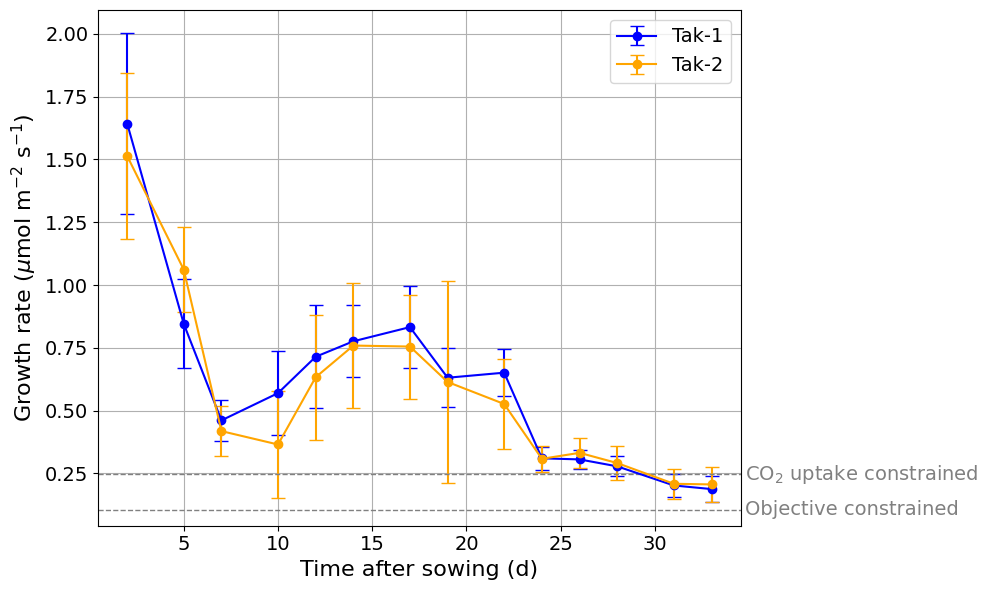

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Parse the data
data = """
0	2	5	7	10	12	14	17	19	22	24	26	28	31	33
Tak1_mean   1.64270581122561	0.845832101211359	0.461365108178001	0.569728340642363	0.714607193556238	0.776204994425197	0.832564108551956	0.631103867859891	0.651225109712699	0.310343709243696	0.305960828594325	0.278257183952688	0.202275390101609	0.18787648077047
Tak1_st_dev 0.358903676057392	0.176415097209988	0.081482137296796	0.168551979345416	0.204702216494379	0.142657872823849	0.16277705122891	0.117270629855951	0.092555659826504	0.045112956476315	0.036461090460164	0.039882469505897	0.04548189764406	0.052567305183044
Tak2_mean	1.51349624404346	1.06174120694449	0.418579549424335	0.3653377544958	0.633093776627656	0.759175972685399	0.755215157259327	0.614179378582565	0.52656499767294	0.308293836639311	0.332130637267556	0.29138888453072	0.208957005231778	0.206363654932162
Tak2_st_dev	0.329544630969276	0.17095774807276	0.098975415419776	0.211218718808711	0.249586740627244	0.247977247132121	0.207119628670344	0.402414683840739	0.177933523805847	0.052210408305	0.060306677193151	0.067314830315434	0.060432223187151	0.069565178372552
"""

data2 = """
Objective constrained	0.105
CO$_2$ uptake constrained	0.247
"""

# Split the data into lines and process
lines = data.strip().split("\n")
columns = lines[0].split()[1:]  # Extract the days (x-axis values)
days = list(map(int, columns))  # Convert to integers

# Extract the rows for means and standard deviations
tak1_mean = list(map(float, lines[1].split()[1:]))
tak1_stdev = list(map(float, lines[2].split()[1:]))
tak2_mean = list(map(float, lines[3].split()[1:]))
tak2_stdev = list(map(float, lines[4].split()[1:]))

# Parse data2 for horizontal lines
data2_lines = data2.strip().split("\n")
horizontal_lines = {line.split("\t")[0]: float(line.split("\t")[1]) for line in data2_lines}

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Tak1 mean with error bars
plt.errorbar(days, tak1_mean, yerr=tak1_stdev, fmt='-o', label='Tak-1', capsize=5, color='blue')

# Plot Tak2 mean with error bars
plt.errorbar(days, tak2_mean, yerr=tak2_stdev, fmt='-o', label='Tak-2', capsize=5, color='orange')

# Add horizontal lines with labels
for label, value in horizontal_lines.items():
    plt.axhline(y=value, color='grey', linestyle='--', linewidth=1)
    plt.text(days[-1] + 1.8, value, label, color='grey', fontsize=14, va='center')

# Add labels, title, and legend
plt.xlabel('Time after sowing (d)', fontsize=16)
plt.ylabel('Growth rate ($\mu$mol m$^{-2}$ s$^{-1}$)', fontsize=16)
plt.legend(fontsize=14)

# Increase font size of tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
gas_ex_data = """
specimen	-65	-60	-55	-50	-45	-40	-35	-30	-25	-20	-15	-10	-5	0	5	10	15	20	25	30	35	40	45	50	55	60	65	70	75	80	85	90	95	100	105			
Tak1 #2	-0.745	-0.721	-0.649	-0.575	-0.536	-0.664	-0.646	-0.632	-0.625	-0.621	-0.590	-0.606	-0.581	1.254	1.690	1.785	1.798	1.800	1.791	1.755	1.735	1.724	1.690	1.682	1.665	1.615	1.623	1.167	1.246	1.793	1.758	1.755						
Tak1 #1					-0.613	-0.718	-0.716	-0.738	-0.746	-0.742	-0.752	-0.761	-0.813	0.963	1.839	1.979	2.023	2.040	2.028	2.010	1.998	1.974	1.943	1.934	1.898	1.878	1.852	1.830	1.791	1.775	1.758	1.719	1.711	1.666	1.661	1.610	1.593	1.248
Tak2 #1		-1.342	-0.887	-0.659	-0.646	-0.621	-0.626	-0.648	-0.762	-0.879	-0.786	-0.790	-0.456	1.211	1.616	1.699	1.634	1.734	1.750	1.738	1.715	1.709	1.692	1.595	1.666	1.645	1.637	1.623	1.595	1.591	1.520	1.539	1.526	1.502	1.478			
no plant control														0.026	-0.022	-0.024	-0.031	-0.070	-0.017	-0.044	0.114																	
"""



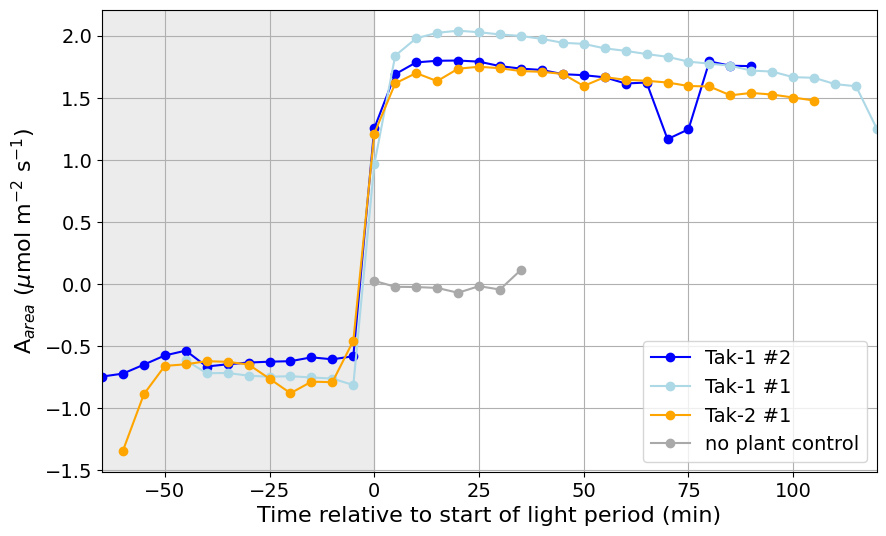

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the gas exchange data into a DataFrame
from io import StringIO

gas_ex_data = """
specimen	-65	-60	-55	-50	-45	-40	-35	-30	-25	-20	-15	-10	-5	0	5	10	15	20	25	30	35	40	45	50	55	60	65	70	75	80	85	90	95	100	105	110	115	120
Tak1 #2	-0.745	-0.721	-0.649	-0.575	-0.536	-0.664	-0.646	-0.632	-0.625	-0.621	-0.590	-0.606	-0.581	1.254	1.690	1.785	1.798	1.800	1.791	1.755	1.735	1.724	1.690	1.682	1.665	1.615	1.623	1.167	1.246	1.793	1.758	1.755						
Tak1 #1					-0.613	-0.718	-0.716	-0.738	-0.746	-0.742	-0.752	-0.761	-0.813	0.963	1.839	1.979	2.023	2.040	2.028	2.010	1.998	1.974	1.943	1.934	1.898	1.878	1.852	1.830	1.791	1.775	1.758	1.719	1.711	1.666	1.661	1.610	1.593	1.248
Tak2 #1		-1.342	-0.887	-0.659	-0.646	-0.621	-0.626	-0.648	-0.762	-0.879	-0.786	-0.790	-0.456	1.211	1.616	1.699	1.634	1.734	1.750	1.738	1.715	1.709	1.692	1.595	1.666	1.645	1.637	1.623	1.595	1.591	1.520	1.539	1.526	1.502	1.478			
no plant control														0.026	-0.022	-0.024	-0.031	-0.070	-0.017	-0.044	0.114																	
"""

# Convert the data into a pandas DataFrame
data = pd.read_csv(StringIO(gas_ex_data), sep="\t")
data = data.set_index("specimen")
# print(data.columns)

# Extract time values and transpose the DataFrame
time_values = data.columns.astype(float)
data = data.transpose()



# Plot the data
plt.figure(figsize=(10, 6))

# Adjust tick parameters to make axis numbers larger
plt.tick_params(axis='both', which='major', labelsize=14)

plt.plot(time_values, data["Tak1 #2"], label="Tak-1 #2", color="blue", marker='o')
plt.plot(time_values, data["Tak1 #1"], label="Tak-1 #1", color="lightblue", marker='o')
plt.plot(time_values, data["Tak2 #1"], label="Tak-2 #1", color="orange", marker='o')
plt.plot(time_values, data["no plant control"], label="no plant control", color="darkgrey", marker='o')

# Shade the region before time 0
plt.axvspan(min(time_values), 0, color='grey', alpha=0.15)
# Set the x-axis limits to start at -65
plt.xlim(-65, max(time_values))

# Add labels, legend, and title
plt.xlabel("Time relative to start of light period (min)", fontsize=16)
plt.ylabel("A$_{area}$ ($\mu$mol m$^{-2}$ s$^{-1}$)", fontsize=16)
# plt.title("Gas Exchange Data", fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

In [4]:
data = """
Category	Cumulative carboxylic acid accumulation rate norm. by estim. CO2 assim. Rate
Marchantia	0.037798927
Marchantia	0.054368769
Marchantia	0.079430444
non-CAM	0.579268338
non-CAM	0.051411312
non-CAM	0.069244722
non-CAM	 
non-CAM	0.008017587
non-CAM	0.00890843
non-CAM	0.072937773
non-CAM	0.04602689
non-CAM	0.006928779
facultative CAM-cycling	0.086332407
facultative CAM-cycling	0.287341578
facultative CAM-cycling	1.649935566
facultative CAM-cycling	0.075487611
facultative CAM-cycling	0.335387426
facultative CAM-cycling	1.447252224
facultative CAM-cycling	0.049810922
facultative CAM-cycling	0.352259447
CAM	2.873133922
CAM	3.538076042
CAM	2.486372878
CAM	2.972799374"""

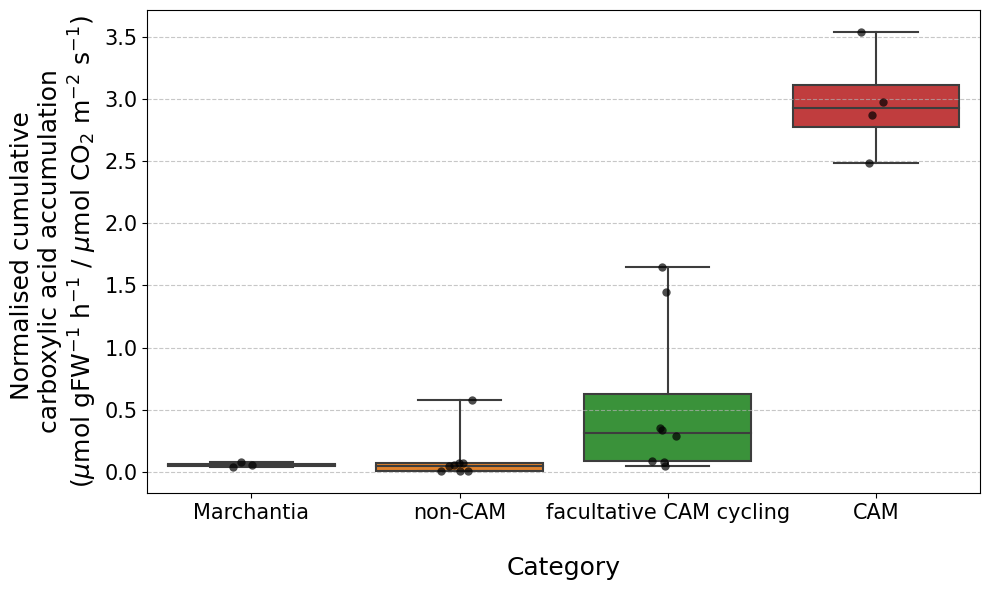

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a dataset with four categories and random values
data = {
    "Category": ["A"] * 10 + ["B"] * 10 + ["C"] * 10 + ["D"] * 10,
    "Values": np.random.rand(40) * 10  # Random values between 0 and 10
}

# Parse the data into a pandas DataFrame
data = """
Category	Values
Marchantia	0.037798927
Marchantia	0.054368769
Marchantia	0.079430444
non-CAM	0.579268338
non-CAM	0.051411312
non-CAM	0.069244722
non-CAM	0.008017587
non-CAM	0.00890843
non-CAM	0.072937773
non-CAM	0.04602689
non-CAM	0.006928779
facultative CAM-cycling	0.086332407
facultative CAM-cycling	0.287341578
facultative CAM-cycling	1.649935566
facultative CAM-cycling	0.075487611
facultative CAM-cycling	0.335387426
facultative CAM-cycling	1.447252224
facultative CAM-cycling	0.049810922
facultative CAM-cycling	0.352259447
CAM	2.873133922
CAM	3.538076042
CAM	2.486372878
CAM	2.972799374
"""

data = {
    "Category": ["Marchantia"] * 3 + ["non-CAM"] * 8+ ["facultative CAM cycling"] * 8 + ["CAM"] * 4,
    "Values": [0.037798927, 0.054368769, 0.079430444,
               0.579268338, 0.051411312, 0.069244722, 0.008017587, 0.00890843,
               0.072937773, 0.04602689, 0.006928779, 0.086332407, 0.287341578,
               1.649935566, 0.075487611, 0.335387426, 1.447252224, 0.049810922,
               0.352259447, 2.873133922, 3.538076042, 2.486372878, 2.972799374]
}

# # Load the data into a DataFrame
# df = pd.read_csv(StringIO(data), sep="\t")

# # Drop rows with missing values
# df = df.dropna()

# # Convert the numeric column to float
# df["Values"] = df[
#     "Values"
# ][:1].astype(float)

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Create the boxplot with adjusted whiskers
plt.figure(figsize=(10, 6))  # Increase figure width for better spacing
sns.boxplot(x="Category", y="Values", data=df, showmeans=False, 
            meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
            whis=np.inf)  # Extend whiskers to min and max values

# Overlay individual data points
sns.stripplot(x="Category", y="Values", data=df, color="black", size=6, jitter=True, alpha=0.7)

# Add labels and title
plt.xlabel("\nCategory", fontsize=18)
plt.ylabel("Normalised cumulative \ncarboxylic acid accumulation\n($\mu$mol gFW$^{-1}$ h$^{-1}$ / $\mu$mol CO$_2$ m$^{-2}$ s$^{-1}$)", fontsize=18)  # Add a line break
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to fit the y-axis label
plt.tight_layout()

# Show the plot
plt.show()